# ASSIGNMENT 3 - MACHINE LEARNING

> Kypritidis Stefanos 8170050 <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />

* We start by importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

* The [dataset](https://zenodo.org/record/2587904) is downloaded locally to our computer, then unzipped and moved to the same folder as this file.
* Let's load the dataset now

In [2]:
proceed = pd.read_csv('Greek_Parliament_Proceedings_1989_2019.csv')
proceed

member_name sitting_date  \
0        κρητικος νικολαου παναγιωτης   1989-07-03   
1        κρητικος νικολαου παναγιωτης   1989-07-03   
2        κρητικος νικολαου παναγιωτης   1989-07-03   
3                                 NaN   1989-07-03   
4        κρητικος νικολαου παναγιωτης   1989-07-03   
...                               ...          ...   
1194402   συντυχακης δανιηλ εμμανουηλ   2019-02-22   
1194403     κακλαμανης μιχαηλ νικητας   2019-02-22   
1194404     κακλαμανης μιχαηλ νικητας   2019-02-22   
1194405                           NaN   2019-02-22   
1194406     κακλαμανης μιχαηλ νικητας   2019-02-22   

                              parliamentary_period parliamentary_session  \
0                                         period 5             session 1   
1                                         period 5             session 1   
2                                         period 5             session 1   
3                                         period 5             session 1   
4                                         period 5             session 1   
...                                            ...                   ...   
1194402  period 17 presided parliamentary republic             session 4   
1194403  period 17 presided parliamentary republic             session 4   
1194404  period 17 presided parliamentary republic             session 4   
1194405  period 17 presided parliamentary republic             session 4   
1194406  period 17 presided parliamentary republic             session 4   

        parliamentary_sitting                 political_party  speaker_info  \
0                   sitting 1  πανελληνιο σοσιαλιστικο κινημα    προεδρευων   
1                   sitting 1  πανελληνιο σοσιαλιστικο κινημα    προεδρευων   
2                   sitting 1  πανελληνιο σοσιαλιστικο κινημα    προεδρευων   
3                   sitting 1                           βουλη  βουλευτης/ες   
4                   sitting 1  πανελληνιο σοσιαλιστικο κινημα    προεδρευων   
...                       ...                             ...           ...   
1194402            sitting 82     κομμουνιστικο κομμα ελλαδας           NaN   
1194403            sitting 82                  νεα δημοκρατια    προεδρευων   
1194404            sitting 82                  νεα δημοκρατια    προεδρευων   
1194405            sitting 82                           βουλη  βουλευτης/ες   
1194406            sitting 82                  νεα δημοκρατια    προεδρευων   

                                                    speech  
0         Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...  
1         Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...  
2         Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...  
3                                        Μάλιστα, μάλιστα.  
4         Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...  
...                                                    ...  
1194402   Κύριε Πρόεδρε, οι καταστροφές προφανώς δεν ήτ...  
1194403             Ορίστε, κύριε Υπουργέ, έχετε τον λόγο.  
1194404   Αρκεί και το κεντρικό κράτος, κύριε Υπουργέ, ...  
1194405                                  Μάλιστα, μάλιστα.  
1194406   Με τη συναίνεση του Σώματος και ώρα 11.25΄ λύ...  

[1194407 rows x 8 columns]

## <center> DATA PREPARATION  <center> 
* Now the column `sitting_date` is transformed into date type as it is type object right now.

In [3]:
proceed.sitting_date = pd.to_datetime(proceed.sitting_date)
proceed.sitting_date

0         1989-07-03
1         1989-07-03
2         1989-07-03
3         1989-07-03
4         1989-07-03
             ...    
1194402   2019-02-22
1194403   2019-02-22
1194404   2019-02-22
1194405   2019-02-22
1194406   2019-02-22
Name: sitting_date, Length: 1194407, dtype: datetime64[ns]

* It is visible that there are some proceedings that we do not know the `political_party`

In [4]:
proc_null_parties = proceed.loc[proceed['political_party'].isna()]
proc_null_parties.shape

(162, 8)

* Firstly, we drop all the rows with nan values for both `member_name` and `political_party`
* Instead of deleting all the other rows with null parties, we will try to figure out the political party through the speaker. In detail, for every proceeding that is null, we use it's speaker and we check if the speaker has had more speeches throughout the years. If the speaker has indeed had more speeches, we set the null `political_party` with the value of `political_party` that the particular speaker has represented the most times. If those proceeding have all null values for `political_party` or if the speaker had only one proceeding, the proceeding is cut.


In [5]:
proceed = proceed.loc[(proceed.member_name.notna()) | (proceed.political_party.notna())] #updating main dataframe
proc_null_parties = proc_null_parties.loc[proc_null_parties.member_name.notna()] #updating dataframe with null parties
for index in proc_null_parties.index:
        name = proc_null_parties.at[index, 'member_name']
        #checking that the particular name has more than one speech
        if len(proceed.loc[proceed.member_name == name].index) == 1:
            proceed = proceed.drop(index) 
        else:
            #getting the value counts of parties for the speeches of the particular member name
            value_counts = proceed.loc[proceed.member_name == name].political_party.value_counts()
            # if all the speeches had null parties then we drop the particular row
            if len(value_counts) == 0:
                proceed = proceed.drop(index) 

            else:
                #we set the party for the row with the party that the speaker represented the most times 
                proceed.at[index,'political_party'] = value_counts.index[0]

* As we can see, there are no proceeding with nan values for `political_party`

In [6]:
proceed.loc[proceed['political_party'].isna()].shape

(0, 8)

* Checking the proceedings for every different political party

In [7]:
print(proceed.political_party.value_counts())

νεα δημοκρατια                                                                     385641
πανελληνιο σοσιαλιστικο κινημα                                                     377685
συνασπισμος ριζοσπαστικης αριστερας                                                126575
κομμουνιστικο κομμα ελλαδας                                                         78634
βουλη                                                                               45876
συνασπισμος της αριστερας των κινηματων και της οικολογιας                          35893
ανεξαρτητοι (εκτος κομματος)                                                        29951
λαικος ορθοδοξος συναγερμος                                                         23686
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)     22991
λαικος συνδεσος - χρυση αυγη                                                        14172
ανεξαρτητοι ελληνες - πανος καμμενος                                                13785
ενωση κεντ

We decide to drop the parties that have less than $5001$ proceedings as they are considered rare and thus imbalanced
* We make a dataframe that contains all the political parties names with more than 5000 proceedings
* Next, we merge this dataframe with the proceedings dataframe, in order to keep the proceedings that correspond to the parties with more than 5000 proceedings

In [8]:
counts =proceed.political_party.value_counts()
political_parties_kept = counts.loc[counts > 5000].index
political_parties_kept = pd.DataFrame(political_parties_kept, columns=['political_party'])
proceed = pd.merge(proceed, political_parties_kept , on='political_party')
proceed

member_name sitting_date  \
0        κρητικος νικολαου παναγιωτης   1989-07-03   
1        κρητικος νικολαου παναγιωτης   1989-07-03   
2        κρητικος νικολαου παναγιωτης   1989-07-03   
3        κρητικος νικολαου παναγιωτης   1989-07-03   
4        κρητικος νικολαου παναγιωτης   1989-07-04   
...                               ...          ...   
1184022    γεωργιαδης νικολαου μαριος   2019-02-21   
1184023    γεωργιαδης νικολαου μαριος   2019-02-21   
1184024    γεωργιαδης νικολαου μαριος   2019-02-21   
1184025    γεωργιαδης νικολαου μαριος   2019-02-21   
1184026    γεωργιαδης νικολαου μαριος   2019-02-21   

                              parliamentary_period parliamentary_session  \
0                                         period 5             session 1   
1                                         period 5             session 1   
2                                         period 5             session 1   
3                                         period 5             session 1   
4                                         period 5             session 1   
...                                            ...                   ...   
1184022  period 17 presided parliamentary republic             session 4   
1184023  period 17 presided parliamentary republic             session 4   
1184024  period 17 presided parliamentary republic             session 4   
1184025  period 17 presided parliamentary republic             session 4   
1184026  period 17 presided parliamentary republic             session 4   

        parliamentary_sitting                 political_party speaker_info  \
0                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
1                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
2                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
3                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
4                   sitting 2  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
...                       ...                             ...          ...   
1184022            sitting 81                  ενωση κεντρωων   προεδρευων   
1184023            sitting 81                  ενωση κεντρωων   προεδρευων   
1184024            sitting 81                  ενωση κεντρωων   προεδρευων   
1184025            sitting 81                  ενωση κεντρωων   προεδρευων   
1184026            sitting 81                  ενωση κεντρωων   προεδρευων   

                                                    speech  
0         Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...  
1         Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...  
2         Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...  
3         Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...  
4         Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ...  
...                                                    ...  
1184022   Για μερικά δευτερόλεπτα θέλει να συμπληρώσει ...  
1184023             Ορίστε, έχετε τον λόγο, κύριε Υπουργέ.  
1184024   Ευχαριστούμε, κύριε Υπουργέ.\tΟ κ. Καββαδάς έ...  
1184025   Ευχαριστούμε τον κ. Καββαδά.\tΤον λόγο έχει ο...  
1184026   Ευχαριστώ και εγώ τον κ. Συντυχάκη. Τον λόγο ...  

[1184027 rows x 8 columns]

* Furthermore,  we observe that there is a political party called `βουλη` with quite an amount of proceedings

In [9]:
proceed.political_party.value_counts()

νεα δημοκρατια                                                                     385641
πανελληνιο σοσιαλιστικο κινημα                                                     377685
συνασπισμος ριζοσπαστικης αριστερας                                                126575
κομμουνιστικο κομμα ελλαδας                                                         78634
βουλη                                                                               45876
συνασπισμος της αριστερας των κινηματων και της οικολογιας                          35893
ανεξαρτητοι (εκτος κομματος)                                                        29951
λαικος ορθοδοξος συναγερμος                                                         23686
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)     22991
λαικος συνδεσος - χρυση αυγη                                                        14172
ανεξαρτητοι ελληνες - πανος καμμενος                                                13785
ενωση κεντ

* Let's examine the different speeches and member names of the `'βουλη'` `political_party` 

In [10]:
proceed.loc[proceed.political_party == 'βουλη'].speech.value_counts()[:20]

 Δεκτό, δεκτό.                 25557
 Μάλιστα, μάλιστα.             11838
 Δεκτή, δεκτή.                  2517
 Μάλιστα, μάλιστα.              1924
 Κρατείται.                      959
Δεκτό, δεκτό.                    473
Μάλιστα, μάλιστα.                240
 Μάλιστα, μάλιστα.\t              93
 Ναι.                             79
Δεκτή, δεκτή.                     78
 Κατά πλειοψηφία.                 77
 Δεκτό, δεκτό. ΔΗΜΗΤΡΙΟΣ Β.       70
Μάλιστα, μάλιστα.                 66
 Δεκτό, δεκτό.ΔΗΜΗΤΡΙΟΣ Ν.        64
 Δεκτό, δεκτό                     51
 Δεκτό, Δεκτό.                    48
 ∆εκτό, δεκτό.ΑΘΑΝΑΣΙΟΣ ∆         47
 Μάλιστα, μάλιστα                 46
 Δεκτός, δεκτός.                  44
 Δεκτό, δεκτό.ΔΗΜΗΤΡΙΟΣ Β.        38
Name: speech, dtype: int64

In [11]:
proceed.loc[proceed.political_party == 'βουλη'].member_name.value_counts()

Series([], Name: member_name, dtype: int64)

It is quickly understood that the particular party does not include valuable information. First of all, there is no party actually called `βουλη`. Secondly, we only see some brief ordinary statements of approval and agreement which would most definitely not help in the prediction models afterwards. Thirdly, there are no member names for any proceeding. As a result, is assumed that those statements include brief answers from members of the parliament and do not include any useful information. Those are the reasons, we decide to delete the proceedings with the `political_party` called `'βουλη'`

In [12]:
proceed = proceed.loc[proceed.political_party != 'βουλη'].copy()

* Moreover, there are quite some proceeding where `member_name` is a NaN value
* We change those member names to 'unknown'

In [13]:
proceed['member_name'] = proceed['member_name'].fillna('unknown')

* Also, some proceeding have NaN values for the column `speech`
* We drop those proceeding as they can not help us make predictions

In [14]:
proceed.loc[proceed.speech.isna()]

member_name sitting_date  \
48240             μελιδης αναστασιου ιωαννης   1992-11-30   
62073          γικονογλου χαραλαμπους μοσχος   1993-09-06   
314000            νιωτης δημητριου γρηγοριος   2010-03-19   
334664              αργυρης ιωαννη ευαγγελος   2011-04-14   
457350               σουρλας ιωαννη γεωργιος   1991-08-20   
475972               σουρλας ιωαννη γεωργιος   1992-05-18   
482544               σουρλας ιωαννη γεωργιος   1992-08-25   
563951  κεφαλογιαννης κωνσταντινου εμμανουηλ   2001-11-02   
677113       πετραλια-παλλη επαμεινωνδα φανη   2008-02-15   
755955         βαρβιτσιωτης ιωαννη μιλτιαδης   2014-04-01   

                             parliamentary_period  \
48240                                    period 7   
62073                                    period 7   
314000  period 13 presided parliamentary republic   
334664  period 13 presided parliamentary republic   
457350                                   period 7   
475972                                   period 7   
482544                                   period 7   
563951  period 10 presided parliamentary republic   
677113  period 12 presided parliamentary republic   
755955  period 15 presided parliamentary republic   

                    parliamentary_session parliamentary_sitting  \
48240                           session 3            sitting 36   
62073                          summer '93            sitting 44   
314000                          session 1            sitting 89   
334664                          session 2           sitting 121   
457350  continuation of summer recess '91            sitting 11   
475972                          session 2           sitting 129   
482544  continuation of summer recess '92            sitting 10   
563951                          session 2            sitting 23   
677113                          session 1            sitting 87   
755955                          session 2           sitting 118   

                       political_party  \
48240   πανελληνιο σοσιαλιστικο κινημα   
62073   πανελληνιο σοσιαλιστικο κινημα   
314000  πανελληνιο σοσιαλιστικο κινημα   
334664  πανελληνιο σοσιαλιστικο κινημα   
457350                  νεα δημοκρατια   
475972                  νεα δημοκρατια   
482544                  νεα δημοκρατια   
563951                  νεα δημοκρατια   
677113                  νεα δημοκρατια   
755955                  νεα δημοκρατια   

                                             speaker_info speech  
48240                                                 NaN    NaN  
62073                                                 NaN    NaN  
314000                                                NaN    NaN  
334664                                         προεδρευων    NaN  
457350  υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...    NaN  
475972  υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...    NaN  
482544  υπουργος υγειας, προνοιας και κοινωνικων ασφαλ...    NaN  
563951                                                NaN    NaN  
677113     υπουργος απασχολησης και κοινωνικης προστασιας    NaN  
755955                     υπουργος ναυτιλιας και αιγαιου    NaN

In [15]:
proceed = proceed.loc[proceed.speech.notna()]

* Furthermore, we change the name of the party `δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)` to `δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)` because it is too long

In [16]:
long_name_indexes = proceed.loc[proceed.political_party == 
                                'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)']\
                                .index
proceed.loc[long_name_indexes,'political_party']= 'δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)'

## <center>DATA EXPLORATION<center>
The dataset will be explored here to get a better understanding of the speeches and the parties involved
* The grids are set first of all
* We also create a palette that for each political party includes its specific color.

In [45]:
sns.set_style("darkgrid") #setting the grids
colors_parties={'νεα δημοκρατια':'royalblue', 
                'κομμουνιστικο κομμα ελλαδας':'red',
                'πανελληνιο σοσιαλιστικο κινημα':'forestgreen', 
                'συνασπισμος της αριστερας των κινηματων και της οικολογιας': 'lime',
                'λαικος ορθοδοξος συναγερμος':'blue',
                'ανεξαρτητοι (εκτος κομματος)':'grey',
                'συνασπισμος ριζοσπαστικης αριστερας':'firebrick',
                'λαικος συνδεσος - χρυση αυγη':'gold',
                'ανεξαρτητοι ελληνες - πανος καμμενος':'aqua',
                'το ποταμι':'lightblue',
                'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια':'dodgerblue',
                'δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)':'darkolivegreen',
                'δημοκρατικο κοινωνικο κινημα':'wheat',
                'ενωση κεντρωων':'orange',
               }

* Let's examine the amount of speeches per party

Text(0.5, 0, 'Speeches amount')

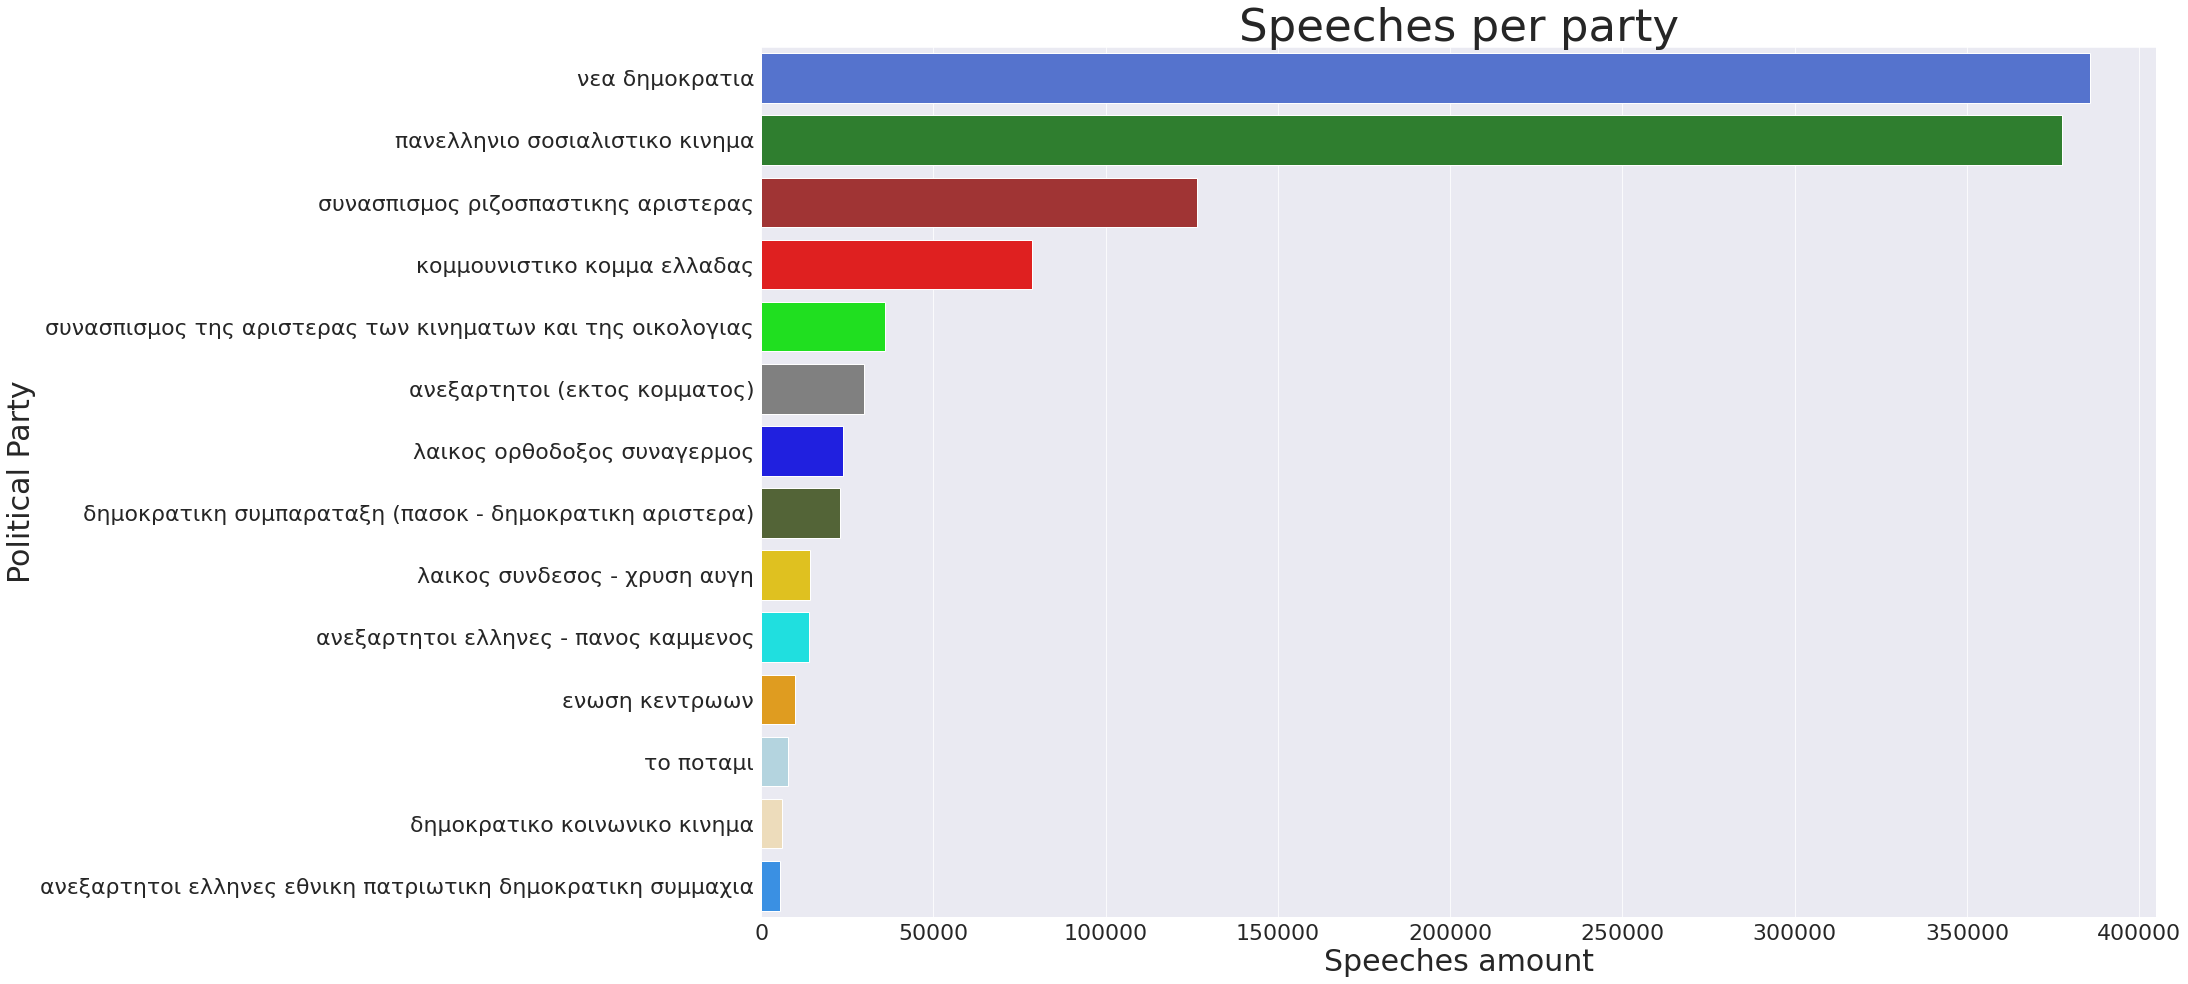

In [46]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= proceed.political_party.value_counts().index , 
            x =proceed.political_party.value_counts().values, palette=colors_parties, )
plt.title('Speeches per party', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Political Party', fontdict ={'size': 30})
plt.xlabel('Speeches amount',fontdict ={'size': 30})

##### Observations
Seeing the bars, there is a huge difference between the parties with the most and the parties with the least proceedings. That could make our dataset quite imbalanced. For now we won't change anything
* The parties νεα δημοκρατία and πανελληνιο σοσιαλιστικο κινημα have the most proceedings by far (more than 370 thousands)
* Then we can see the parties συνασπισμος ριζοσπαστικης αριστερας and κομμουνιστικο κομμα ελλαδας following up with more than 75 thousand proceedings each.
* Lastly, some other relatively important ones are συνασπισμος της αριστερας των κινηματων και της οικολογιας, ανεξαρτητοι, λαικος ορθοδοξος συναγερμος and δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα) with more than 20 thousand proceedings in total

Now we will be identify the percentage of the sum amount of speeches that each party has
* A new dataframe is created that contains the counted values of speeches per party
* From the counted values per party, we calculated the percentages as a new column `percentage`

In [47]:
counts_party = pd.DataFrame(data=proceed.political_party.value_counts()).reset_index()
counts_party = counts_party.rename(columns={'index':'party', 'political_party':'count'}) 
counts_party['percentage']= (counts_party['count'] / counts_party['count'].sum()) * 100 #calculating the percentages
counts_party

party   count  percentage
0                                      νεα δημοκρατια  385635   33.882884
1                      πανελληνιο σοσιαλιστικο κινημα  377681   33.184026
2                 συνασπισμος ριζοσπαστικης αριστερας  126575   11.121206
3                         κομμουνιστικο κομμα ελλαδας   78634    6.908986
4   συνασπισμος της αριστερας των κινηματων και τη...   35893    3.153651
5                        ανεξαρτητοι (εκτος κομματος)   29951    2.631572
6                         λαικος ορθοδοξος συναγερμος   23686    2.081113
7   δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη α...   22991    2.020048
8                        λαικος συνδεσος - χρυση αυγη   14172    1.245188
9                ανεξαρτητοι ελληνες - πανος καμμενος   13785    1.211186
10                                     ενωση κεντρωων    9889    0.868873
11                                          το ποταμι    7672    0.674082
12                       δημοκρατικο κοινωνικο κινημα    6056    0.532096
13  ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...    5521    0.485089

* Now the percentages will be showcased

(0.0, 100.0)

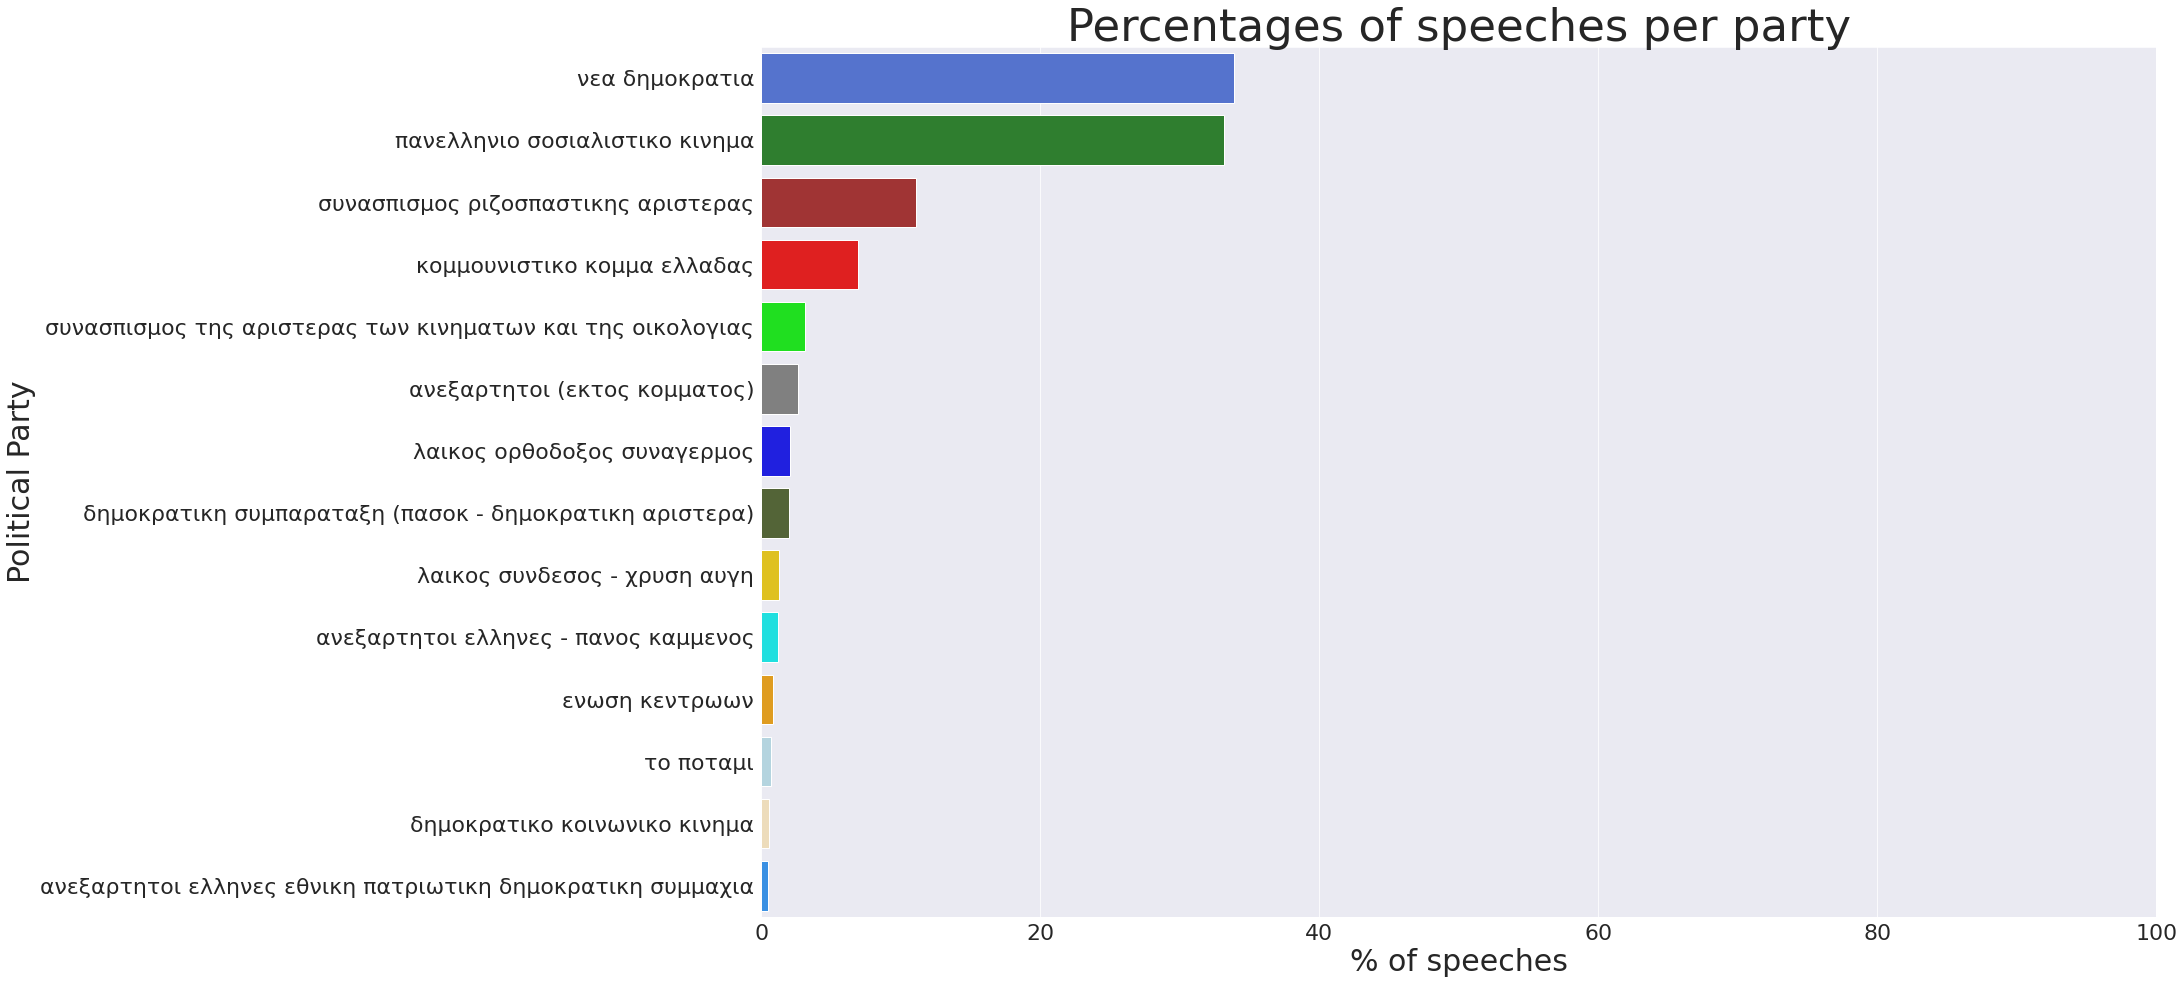

In [48]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= counts_party.party , 
            x =counts_party.percentage, palette=colors_parties, )
plt.title('Percentages of speeches per party', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Political Party', fontdict ={'size': 30})
plt.xlabel('% of speeches',fontdict ={'size': 30})
ax.set_xlim(0,100)

#### Observations
It is obvious that ΝΔ and ΠΑΣΟΚ have the majority of speeches throught the years with each of them having had around $1/3$ of the total speeches from $1989$ to $2019$

* It is time to check the speeches distribution over the years
* For each year the amount of given speeches is found and we save it in a new Dataframe `speeches_year`

In [49]:
speeches_year = proceed.sitting_date.dt.year.value_counts()
speeches_year = speeches_year.sort_index()
speeches_year

1989    10050
1990    34544
1991    46416
1992    51958
1993    42026
1994    26863
1996    10444
1997    51426
1998    23662
1999    39430
2000    28812
2001    46779
2002    27961
2003    30369
2004    25577
2005    49615
2006    37823
2007    35844
2008    50959
2009    29400
2010    43126
2011    51752
2012    38455
2013    47141
2014    53817
2015    35640
2016    70836
2017    51484
2018    38051
2019     7881
Name: sitting_date, dtype: int64

* Now we can plot the evolution of speeches over time

Text(0.5, 0, 'Year')

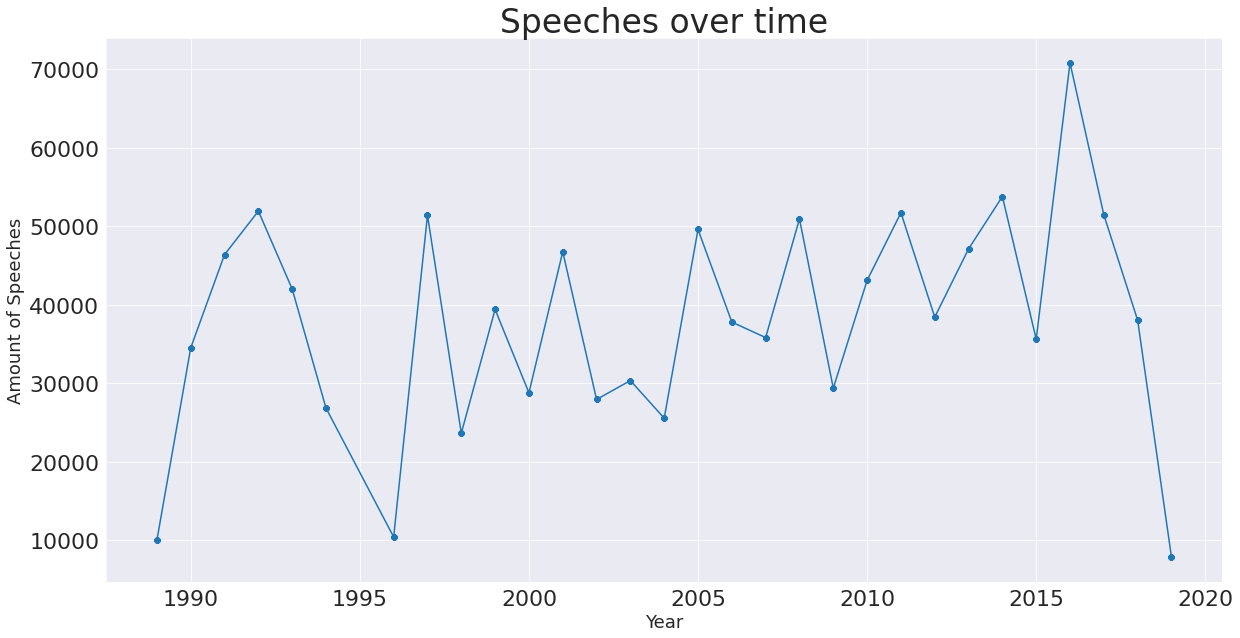

In [50]:
fig, ax = plt.subplots(figsize=(20,10))
speeches_year.plot(ax=ax, marker="8", grid=True, )
plt.title('Speeches over time', fontdict ={'size': 33}, loc='center')
plt.ylabel('Amount of Speeches', fontdict ={'size': 18})
plt.xlabel('Year',fontdict ={'size': 18})

##### Observations
It is clearly visible that the amount of speeches over years are divergent. One conclusion is that the amount of speeches does not increase or decrease for more than 3 years continiously. That means, the amount of speeches per year may only increase or decrease for maximum 3 years in a row. However, we do not have any information for the year of $1995$ as we can see no point for that particular year. Having had the information about the particular year, we could know if the conclusion-rule is also valid for the span $1992$-$1996$

Now we will scrutinize the evolution of speeches for the different parties
* Firstly, a dataframe is created from all the proceedings which contains only the columns of the date and the political party
* Then the date is transformed only to contain the year
* After, we get the counts of the rows by different year and party. Those are saved in the dataframe
* The counts are sorted by ascending year afterwards


In [51]:
proceed_year_party = proceed[['sitting_date','political_party']].copy()
proceed_year_party.sitting_date = proceed_year_party.sitting_date.dt.year
speeches_year_party = proceed_year_party.value_counts()
speeches_year_party = speeches_year_party.reset_index()
speeches_year_party = speeches_year_party.rename(columns={0:'count'})
speeches_year_party= speeches_year_party.sort_values(by='sitting_date')
speeches_year_party

sitting_date                                    political_party  count
75           1989                                     νεα δημοκρατια   4741
190          1989                        λαικος ορθοδοξος συναγερμος      5
81           1989                     πανελληνιο σοσιαλιστικο κινημα   3959
175          1989                        κομμουνιστικο κομμα ελλαδας     93
134          1989  συνασπισμος της αριστερας των κινηματων και τη...   1252
..            ...                                                ...    ...
169          2019  ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...    188
168          2019                       λαικος συνδεσος - χρυση αυγη    231
94           2019                συνασπισμος ριζοσπαστικης αριστερας   3152
147          2019  δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη α...    781
163          2019                       ανεξαρτητοι (εκτος κομματος)    341

[209 rows x 3 columns]

* Now it is possible to see the evolution of speeches for each party

Text(0.5, 0, 'Year')

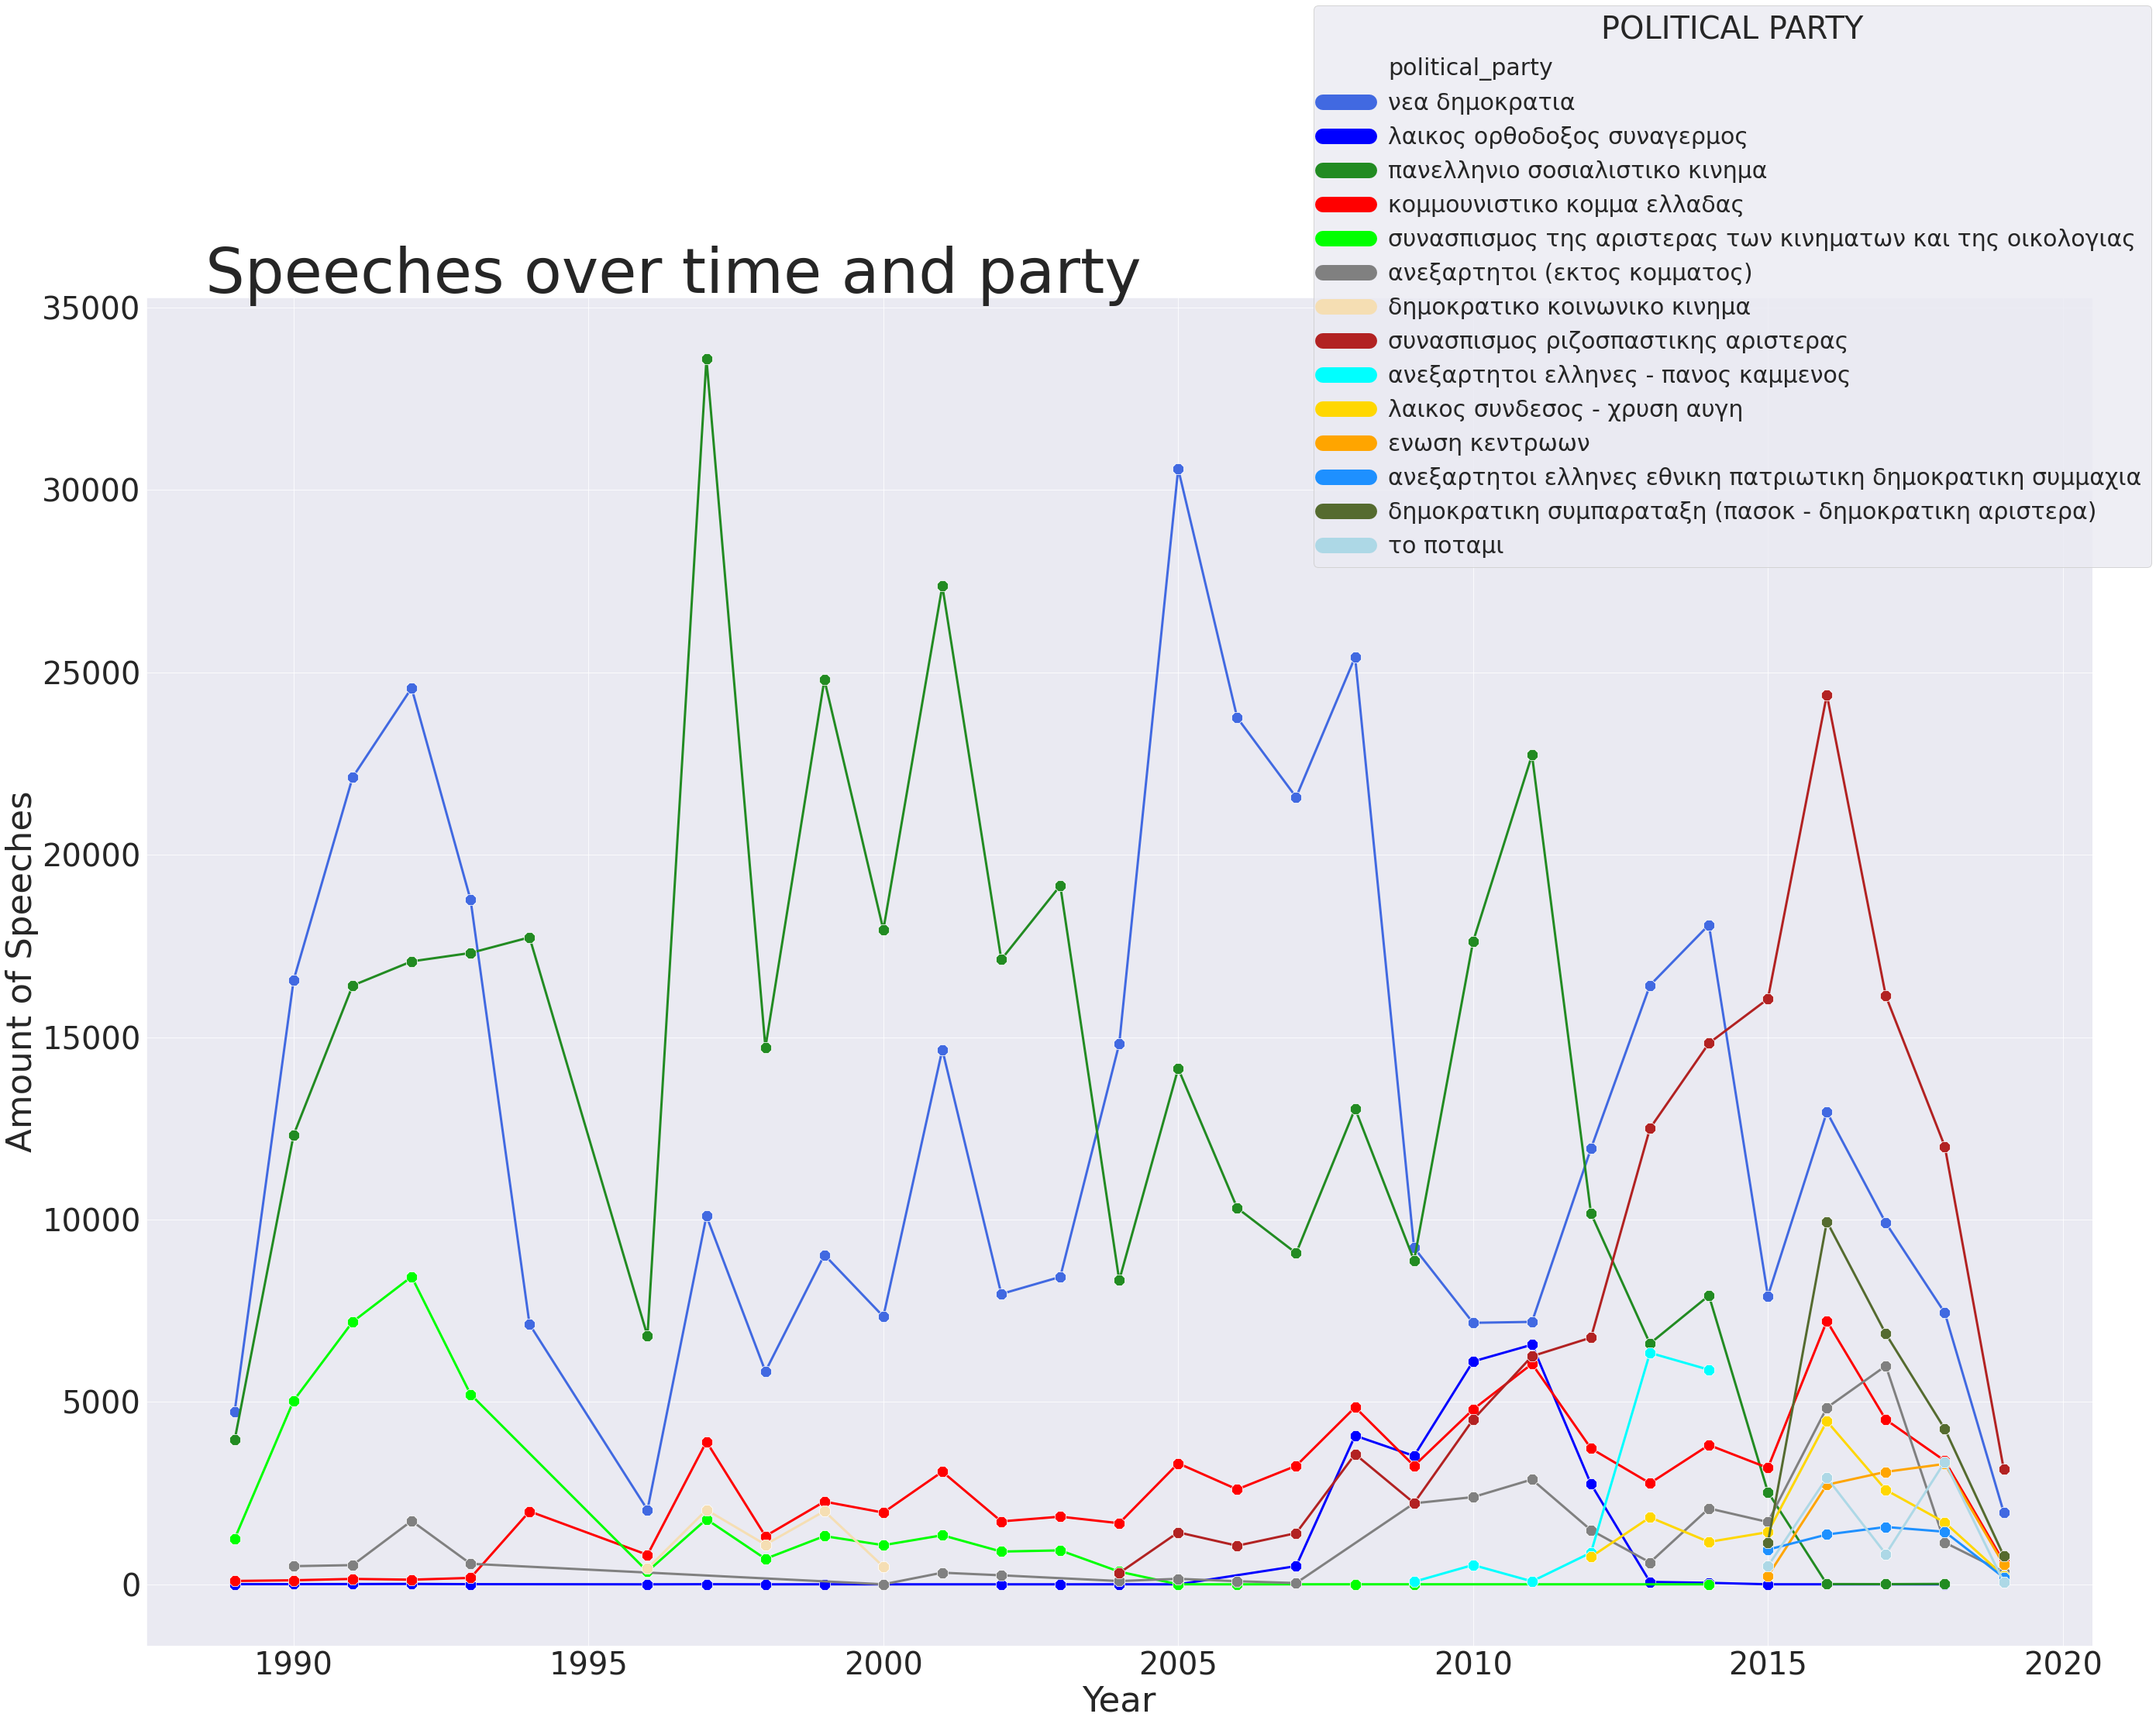

In [52]:
font = {'size': 40, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(45,32))
sns.lineplot(x = "sitting_date", y = "count", data=speeches_year_party, hue="political_party", palette=colors_parties,
             marker="8", markersize=15, linewidth=3)
leg = plt.legend(bbox_to_anchor=(0.6, 0.8),borderaxespad=0, prop={'size': 30}, title  ="POLITICAL PARTY",)
plt.title('   Speeches over time and party', fontdict ={'size': 80}, loc='left')
for i in range(1,15): #increasing the width of the line inside the legend
    leg.get_lines()[i].set_linewidth(20)
plt.ylabel('Amount of Speeches', fontdict ={'size': 45})
plt.xlabel('Year',fontdict ={'size': 45})


### Observations
Each different color showcases the evolution of speeches for a different political party. Also, each different color corresponds to a single political party with the matching color in its symbol. Because of the fact that some parties have similar colors or the same, variations of the color were used.
* The party πανελληνιο σοσιαλιστικο κινημα (ΠΑΣΟΚ) has had its ups and dows. Μoreover, it has also had the maximum amount of speeches for one year ($1997$) among all other parties and years. Noticable local maximums are seen in the years $1999$, $2001$, $2011$. Lastly, it is noticed that after $2015$ the speeches have dropped to tiny amounts (close to $0$). However, it is also perceived that a different party called δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα) has a small amount of proceedings from 5 to 10 thousands the years 2016-2018 which is probably a cooperation of two parties one of which is ΠΑΣΟΚ.
* Another important party is νεα δημοκρατια. That party has also had ups and downs throughout the years. The maximum amount of speeches for a year for this party happened in $2005$. Some noticable local maximums for the party took place in $1992$ and $2008$. Finally, we can see that in the last year we have information ($2019$), the speeches for that party are the minimum among all years for that particular party.
* Another observation we can make is that the party συνασπισμος ριζοσπαστικης αριστερας started having speeches in the parliament in $2004$. There are no recorded speeches before that. Since then, the speeches for that party have been continiuosly increasing till $2016$ where the maximum amount of speeches for that party is found. After $2016$ the speeches for that party have been decreasing every year.
* The party συνασπισμος της αριστερας των κινηματων και της οικολογιας held its maximum amount of speeches for a year in $1992$ and after that its presence has not been significant.
* The party κομμουνιστικο κομμα ελλαδας has had a rather stable presence (compared to the above parties) in the parliament with speeches from the year $1994$, presenting its maximum amount for a year in $2016$
* Laslty, it is identified that the party λαικος συνδεσος - χρυση αυγη started having speeches in parliament in $2012$ and its maximum speeches for a year appear in $2016$

Now let's discover the speakers per party. Firstly, we will check the speakers with the most speeches among all years.
* We create a new dataframe that contains the counted values for each speaker and party (we keep the party in order to showcase the right colors per speaker's party as we have set in the dictionary `colors_parties`)
* Next we rename the column for the counts

In [53]:
speeches_member_party = proceed[['member_name','political_party']].value_counts()
speeches_member_party = speeches_member_party.reset_index()
speeches_member_party = speeches_member_party.rename(columns={0:'count'})
speeches_member_party

member_name  \
0              κακλαμανης χρηστου αποστολος   
1               σγουριδης σγουρη παναγιωτης   
2                   σουρλας ιωαννη γεωργιος   
3              κρητικος νικολαου παναγιωτης   
4              γειτονας ιωαννη κωνσταντινος   
...                                     ...   
1453           μακαρονας γεωργιου γρηγοριος   
1454  τεκτονιδου αναστασιου κυριακη (βουλα)   
1455       ταλιαδουρος σπυριδωνος αθανασιος   
1456               μαντατζη μουχαμερ τσετιν   
1457        παπασιωζος χρηστος κωνσταντινος   

                                        political_party  count  
0                        πανελληνιο σοσιαλιστικο κινημα  35338  
1                        πανελληνιο σοσιαλιστικο κινημα  31656  
2                                        νεα δημοκρατια  28391  
3                        πανελληνιο σοσιαλιστικο κινημα  24529  
4                        πανελληνιο σοσιαλιστικο κινημα  18673  
...                                                 ...    ...  
1453  ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...      1  
1454                     πανελληνιο σοσιαλιστικο κινημα      1  
1455                                     νεα δημοκρατια      1  
1456                       ανεξαρτητοι (εκτος κομματος)      1  
1457                       ανεξαρτητοι (εκτος κομματος)      1  

[1458 rows x 3 columns]

* Now we can create the plot:

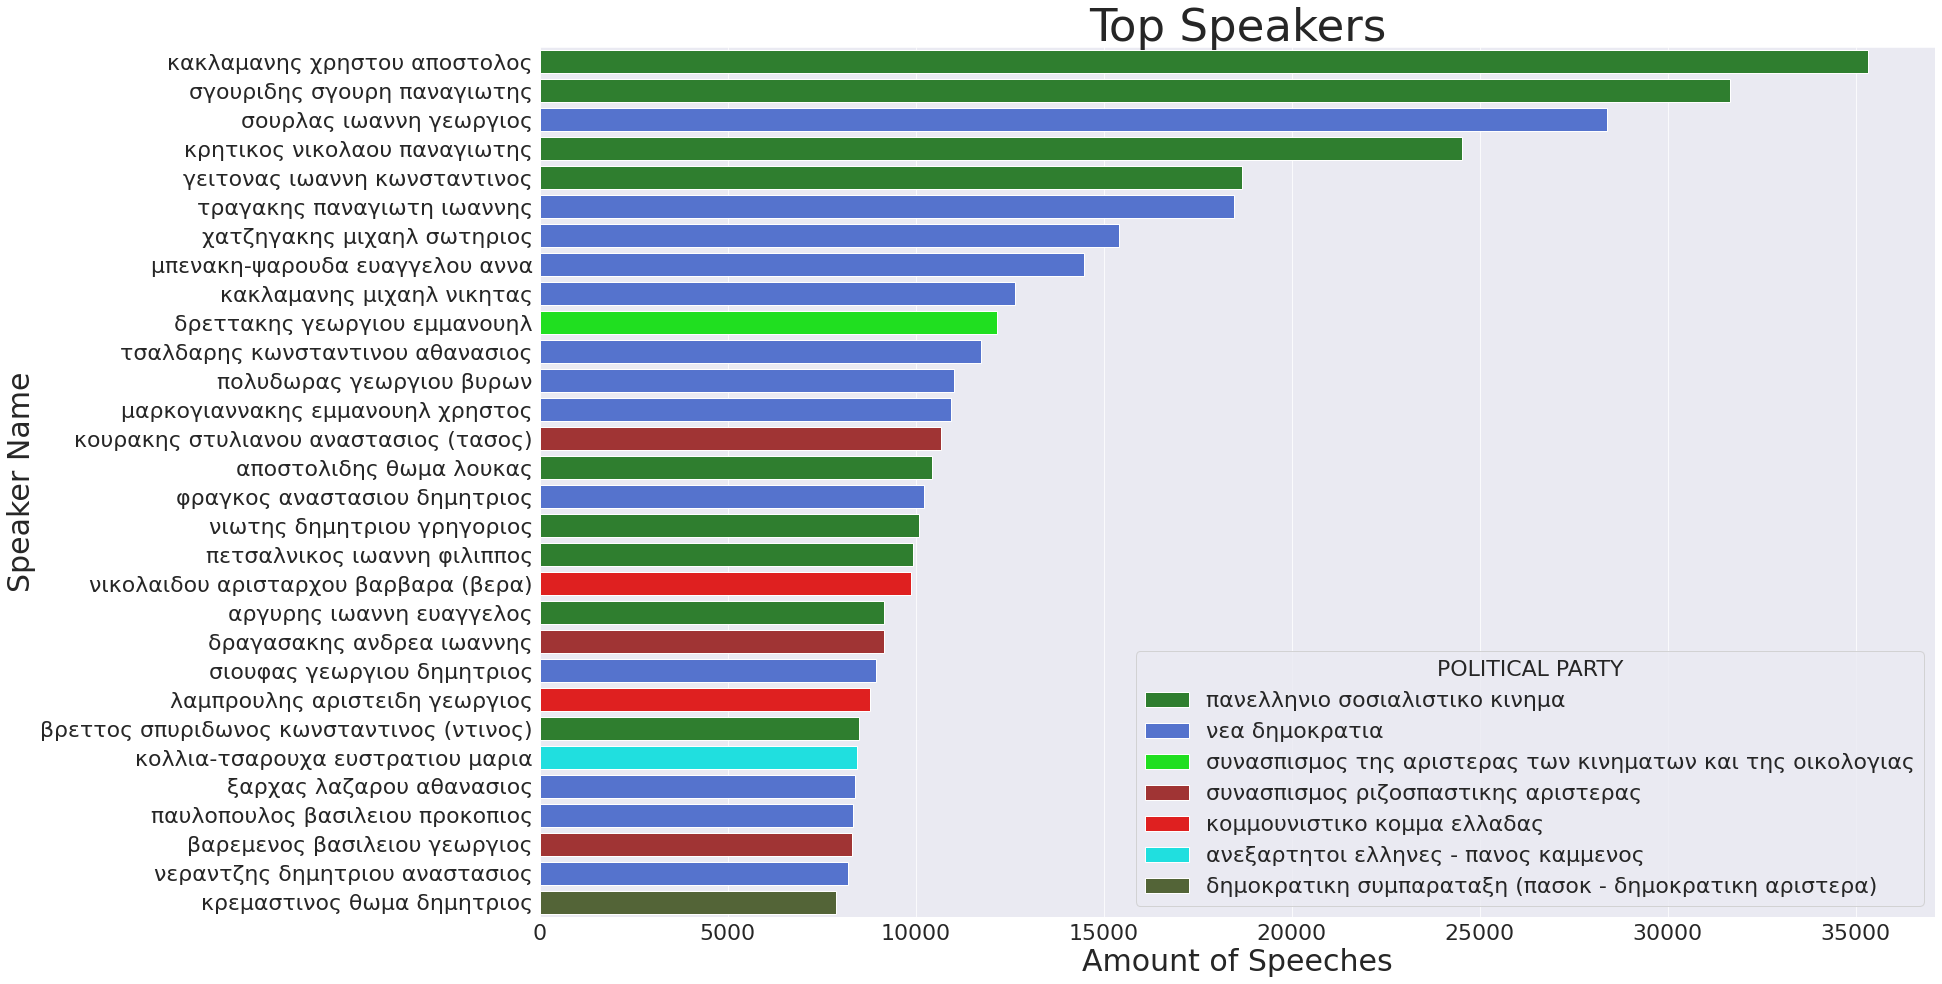

In [54]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(data=speeches_member_party[:30], y='member_name' , hue='political_party', 
            x='count', palette=colors_parties, dodge=False)
plt.title('Top Speakers', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})
plt.legend(title  ="POLITICAL PARTY", loc='best')

#### Observations
It is clearly visible that the top speakers for all the years belong to πανελληνιο σοσιαλιστικο κινημα or νεα δημοκρατια.

Next up, we will detect the top 2 speakers for each different party and plot their total amount of speeches. In other words we will find the two speakers with the most speeches in each party.
* We use the dataframe `speeches_member_party` and groupby to get the top 2 speakers for each party

In [55]:
top_speeches_member_party = speeches_member_party.sort_values('count',ascending = False)\
                                .groupby('political_party').head(2)
top_speeches_member_party

member_name  \
0              κακλαμανης χρηστου αποστολος   
1               σγουριδης σγουρη παναγιωτης   
2                   σουρλας ιωαννη γεωργιος   
5                τραγακης παναγιωτη ιωαννης   
9              δρεττακης γεωργιου εμμανουηλ   
13    κουρακης στυλιανου αναστασιος (τασος)   
18     νικολαιδου αρισταρχου βαρβαρα (βερα)   
20                δραγασακης ανδρεα ιωαννης   
22            λαμπρουλης αριστειδη γεωργιος   
24         κολλια-τσαρουχα ευστρατιου μαρια   
29               κρεμαστινος θωμα δημητριος   
33            αποστολατος σπυριδωνα βαιτσης   
39              ροντουλης γεωργιου αστεριος   
44              λυκουδης διονυσιου σπυριδων   
47               γεωργιαδης νικολαου μαριος   
70                λοβερδος νικολαου ανδρεας   
72               κορακας χρηστου ευστρατιος   
84          καμμενος κωνσταντινου δημητριος   
89                αμυρας στυλιανου γεωργιος   
91                 σαριδης γεωργιου ιωαννης   
117               λαζαριδης ιωαννη γεωργιος   
128             λυκουδης διονυσιου σπυριδων   
132         τσοβολας κωνσταντινου δημητριος   
133                     παππας ηλια χρηστος   
162           καρακωστας θεοδωρου ευαγγελος   
200  παπαχριστοπουλος θεμιστοκλη αθανασιος    
245              τσαφουλιας ανδρεα γεωργιος   
260     γιοβανοπουλος γεωργιου κωνσταντινος   

                                       political_party  count  
0                       πανελληνιο σοσιαλιστικο κινημα  35338  
1                       πανελληνιο σοσιαλιστικο κινημα  31656  
2                                       νεα δημοκρατια  28391  
5                                       νεα δημοκρατια  18471  
9    συνασπισμος της αριστερας των κινηματων και τη...  12160  
13                 συνασπισμος ριζοσπαστικης αριστερας  10666  
18                         κομμουνιστικο κομμα ελλαδας   9874  
20                 συνασπισμος ριζοσπαστικης αριστερας   9151  
22                         κομμουνιστικο κομμα ελλαδας   8778  
24                ανεξαρτητοι ελληνες - πανος καμμενος   8445  
29   δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη α...   7882  
33                         λαικος ορθοδοξος συναγερμος   6602  
39                         λαικος ορθοδοξος συναγερμος   5988  
44                        ανεξαρτητοι (εκτος κομματος)   4746  
47                                      ενωση κεντρωων   4448  
70   δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη α...   3116  
72   συνασπισμος της αριστερας των κινηματων και τη...   2964  
84   ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...   2528  
89                                           το ποταμι   2405  
91                                      ενωση κεντρωων   2346  
117                       ανεξαρτητοι (εκτος κομματος)   1853  
128                                          το ποταμι   1750  
132                       δημοκρατικο κοινωνικο κινημα   1684  
133                       λαικος συνδεσος - χρυση αυγη   1655  
162                       λαικος συνδεσος - χρυση αυγη   1391  
200  ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...   1161  
245                       δημοκρατικο κοινωνικο κινημα    983  
260               ανεξαρτητοι ελληνες - πανος καμμενος    937

* Now the results will be visualized

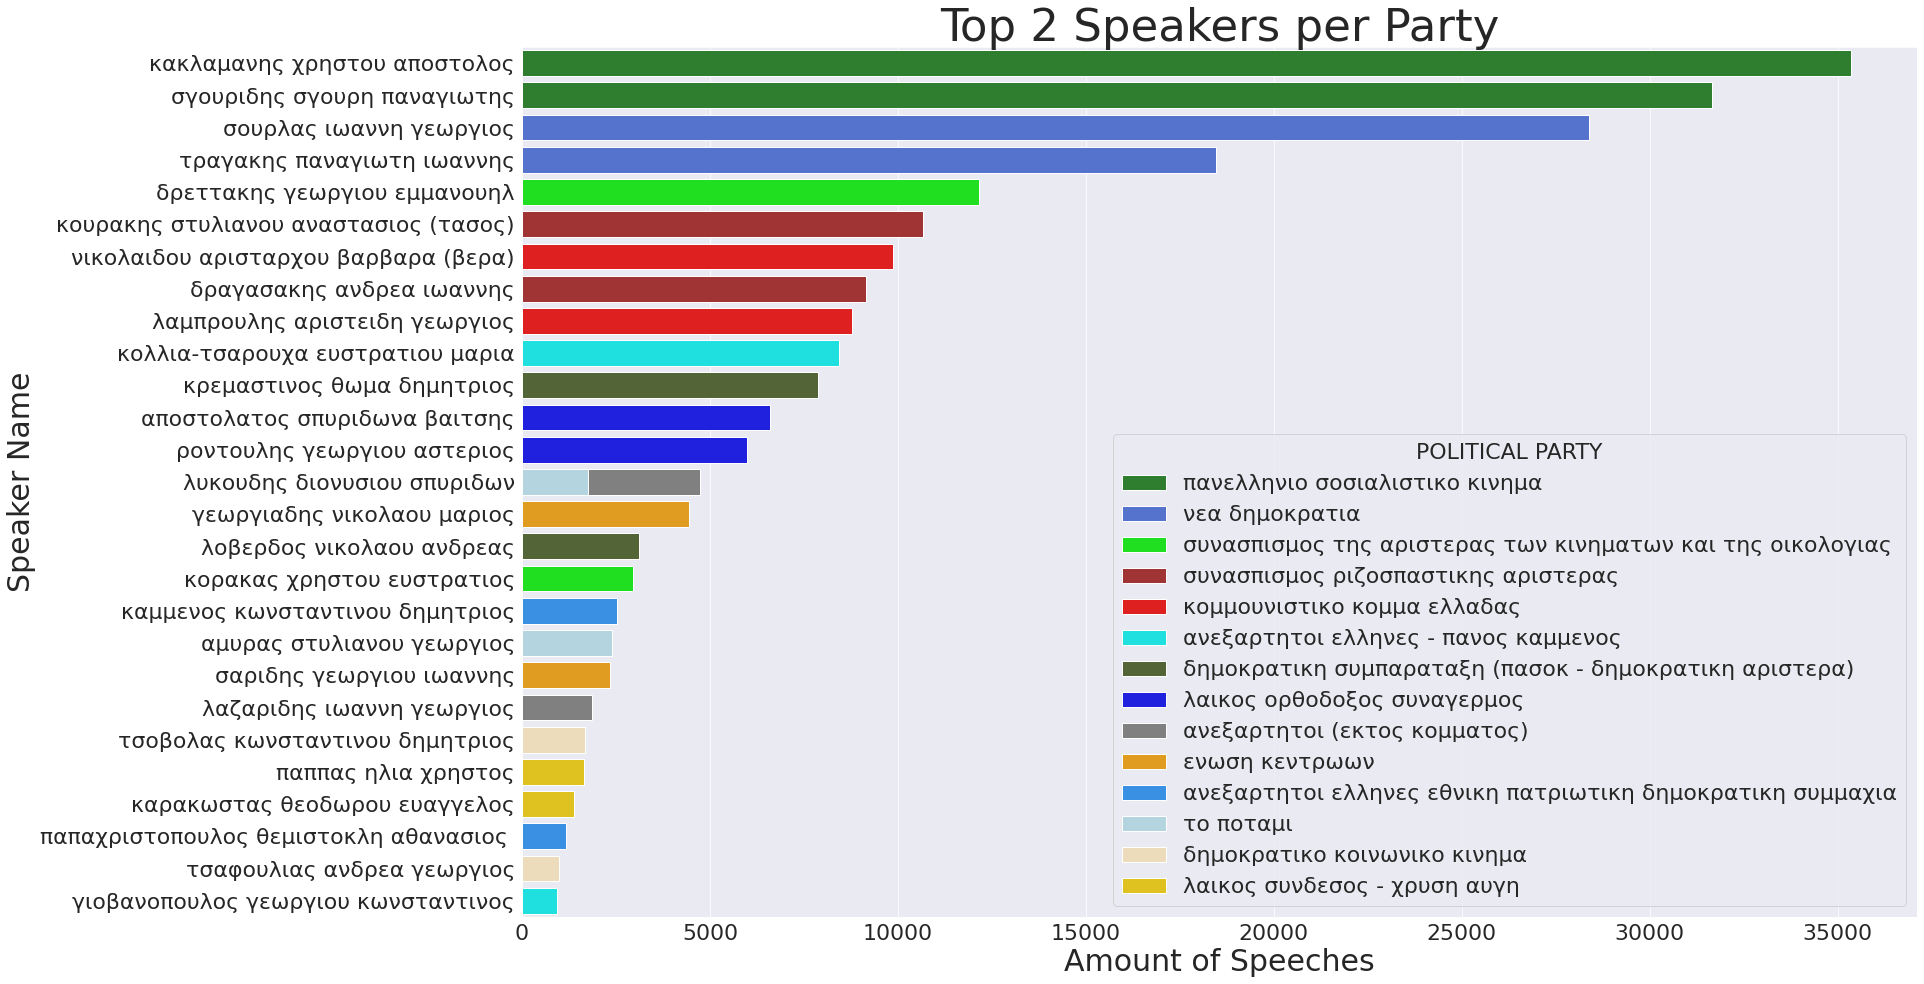

In [56]:
font = {'size': 22, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(data=top_speeches_member_party, y='member_name' , hue='political_party', 
            x='count', palette=colors_parties, dodge=False)
plt.title('Top 2 Speakers per Party', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})
plt.legend(title  ="POLITICAL PARTY", loc='best')

#### Observations 
Those are assumed to be the big names for each political party over the years. Something interesting is that the member λυκουδης διονυσιου σπυριδων has had speeches for two different parties (το ποταμι and ανεξαρτητοι (εκτος κομματος)) and in fact is one of the top 2 speakers (speakers with most speeches) for both parties 

Now we will investigate the top 15 speakers (speakers with most speeches) for the most significant parties
* We start of with πανελληνιο σοσιαλιστικο κινημα

Text(0.5, 0, 'Amount of Speeches')

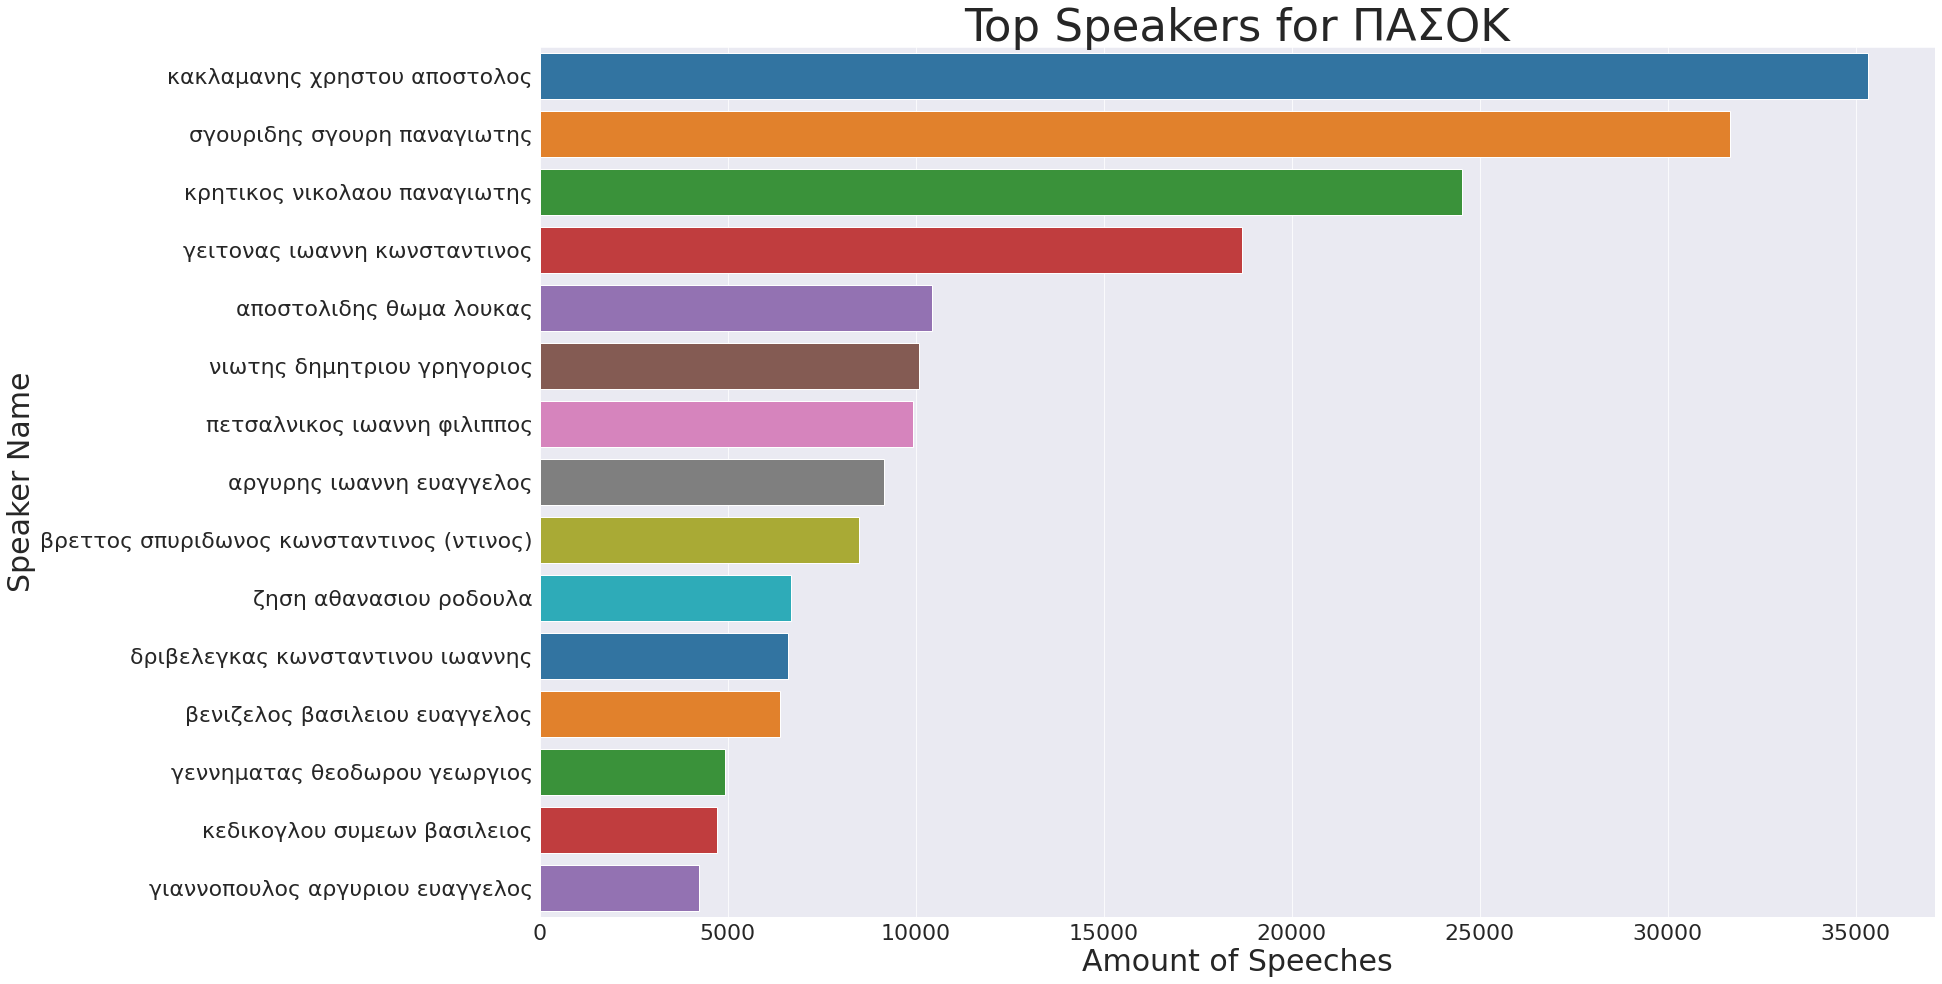

In [57]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(data=speeches_member_party.loc[speeches_member_party.political_party=='πανελληνιο σοσιαλιστικο κινημα'][:15],
            y='member_name' , x='count', palette='tab10', dodge=False)
plt.title('Top Speakers for ΠΑΣΟΚ', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation
The top 2 speakers are quite ahead from the rest. Also, the speakers 5 to 9, 10 to 12 and 13 to 15 are very close to each other when it comes to the amount of speeches they have given. There is also a huge gap of more than 8 thousand speeches between the 4th speaker (γειτονας ιωαννη κωνσταντινος) and the 5th one (αποστολιδης θωμα λουκας).

* Next up is νεα δημοκρατια

Text(0.5, 0, 'Amount of Speeches')

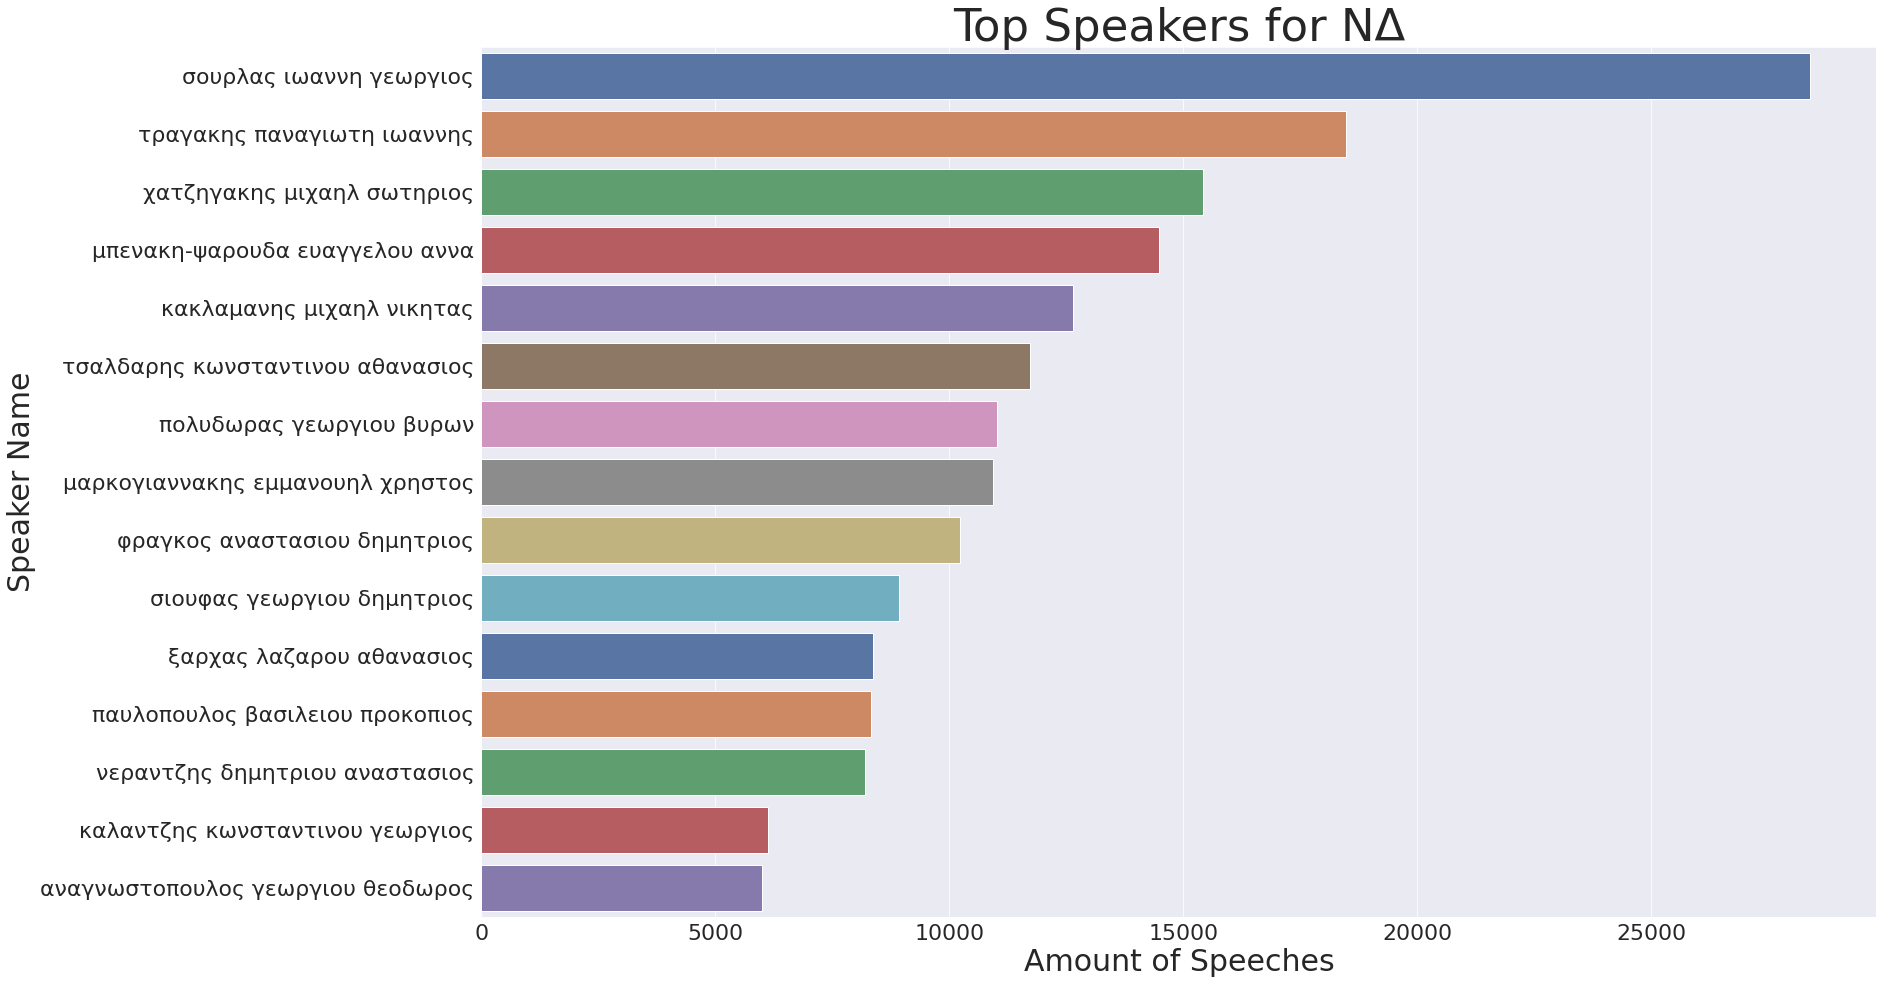

In [58]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(data=speeches_member_party.loc[speeches_member_party.political_party=='νεα δημοκρατια'][:15],
            y='member_name' , x='count', palette='deep', dodge=False)
plt.title('Top Speakers for ΝΔ', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation
The first speaker (σουρλας ιωαννη γεωργιος) has almost 10 thousand speeches more than the second one (τραγακης παναγιωτη ιωαννης). Moreover, it looks like there are little gaps between the rest speakers when they are compared to neighbor speakers

* Συνασπισμος ριζοσπαστικης αριστερας will follow

Text(0.5, 0, 'Amount of Speeches')

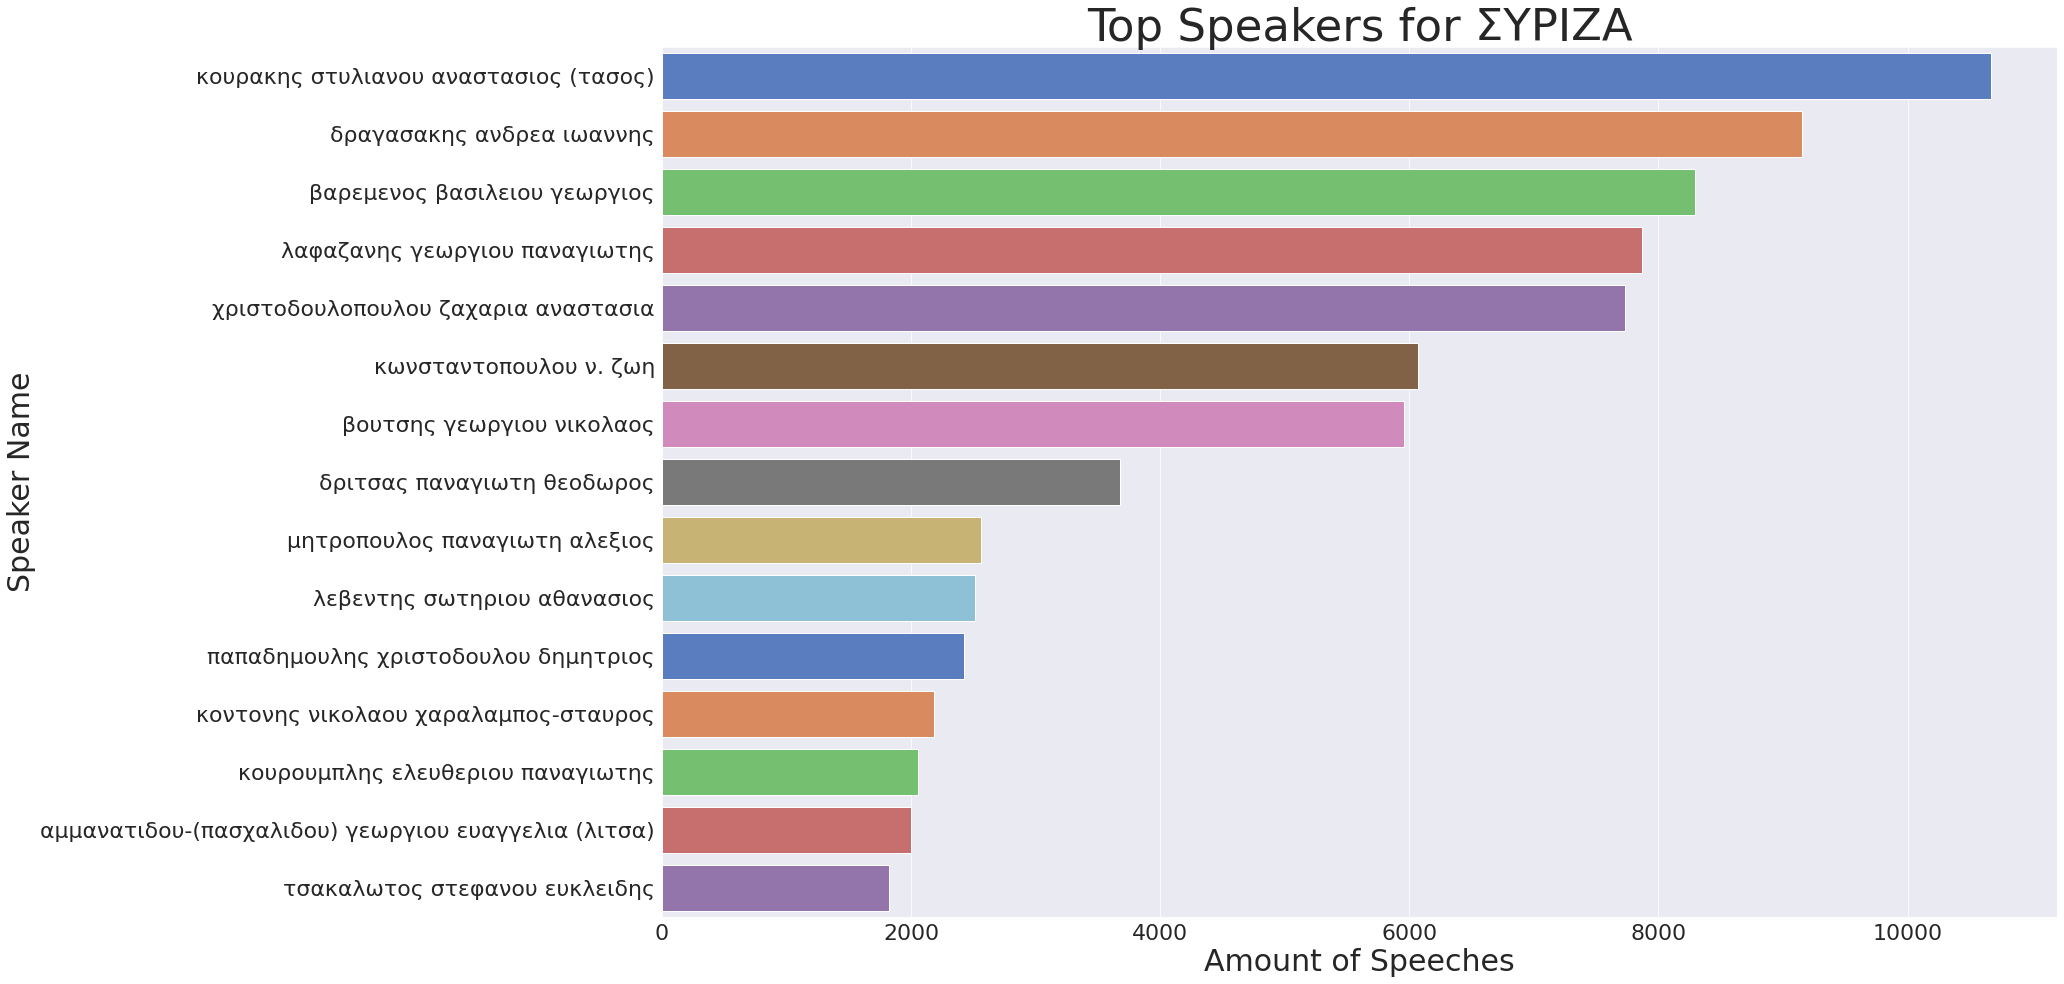

In [59]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='συνασπισμος ριζοσπαστικης αριστερας'][:15],
            y='member_name' , x='count', palette='muted', dodge=False)
plt.title('Top Speakers for ΣΥΡΙΖΑ', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation
The 2nd to 5th speakers are not that far apart. However, the last 7 are well isolated

* Now let's see κομμουνιστικο κομμα ελλαδας

Text(0.5, 0, 'Amount of Speeches')

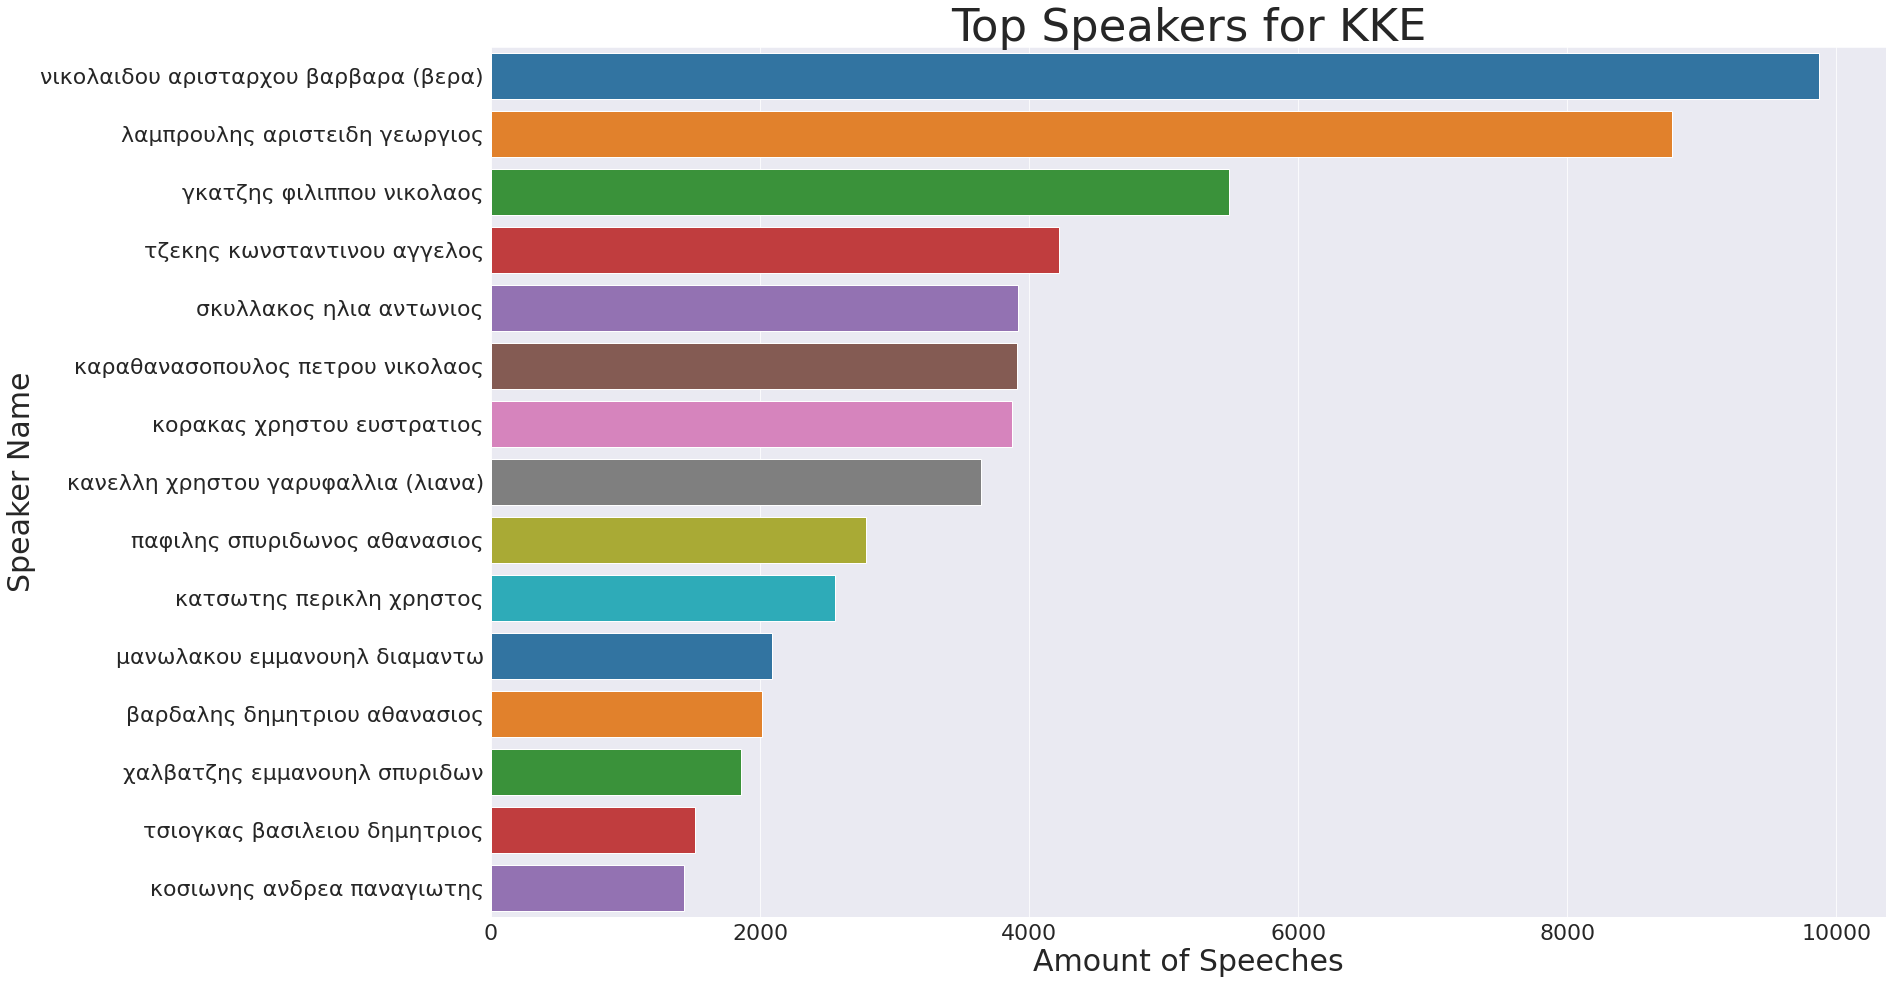

In [60]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='κομμουνιστικο κομμα ελλαδας'][:15],
            y='member_name' , x='count', palette='tab10', dodge=False)
plt.title('Top Speakers for ΚΚΕ', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation 
The top 2 speakers are separated from the rest by more than 3 thousands speeches

* Furthermore συνασπισμος της αριστερας των κινηματων και της οικολογιας is next

Text(0.5, 0, 'Amount of Speeches')

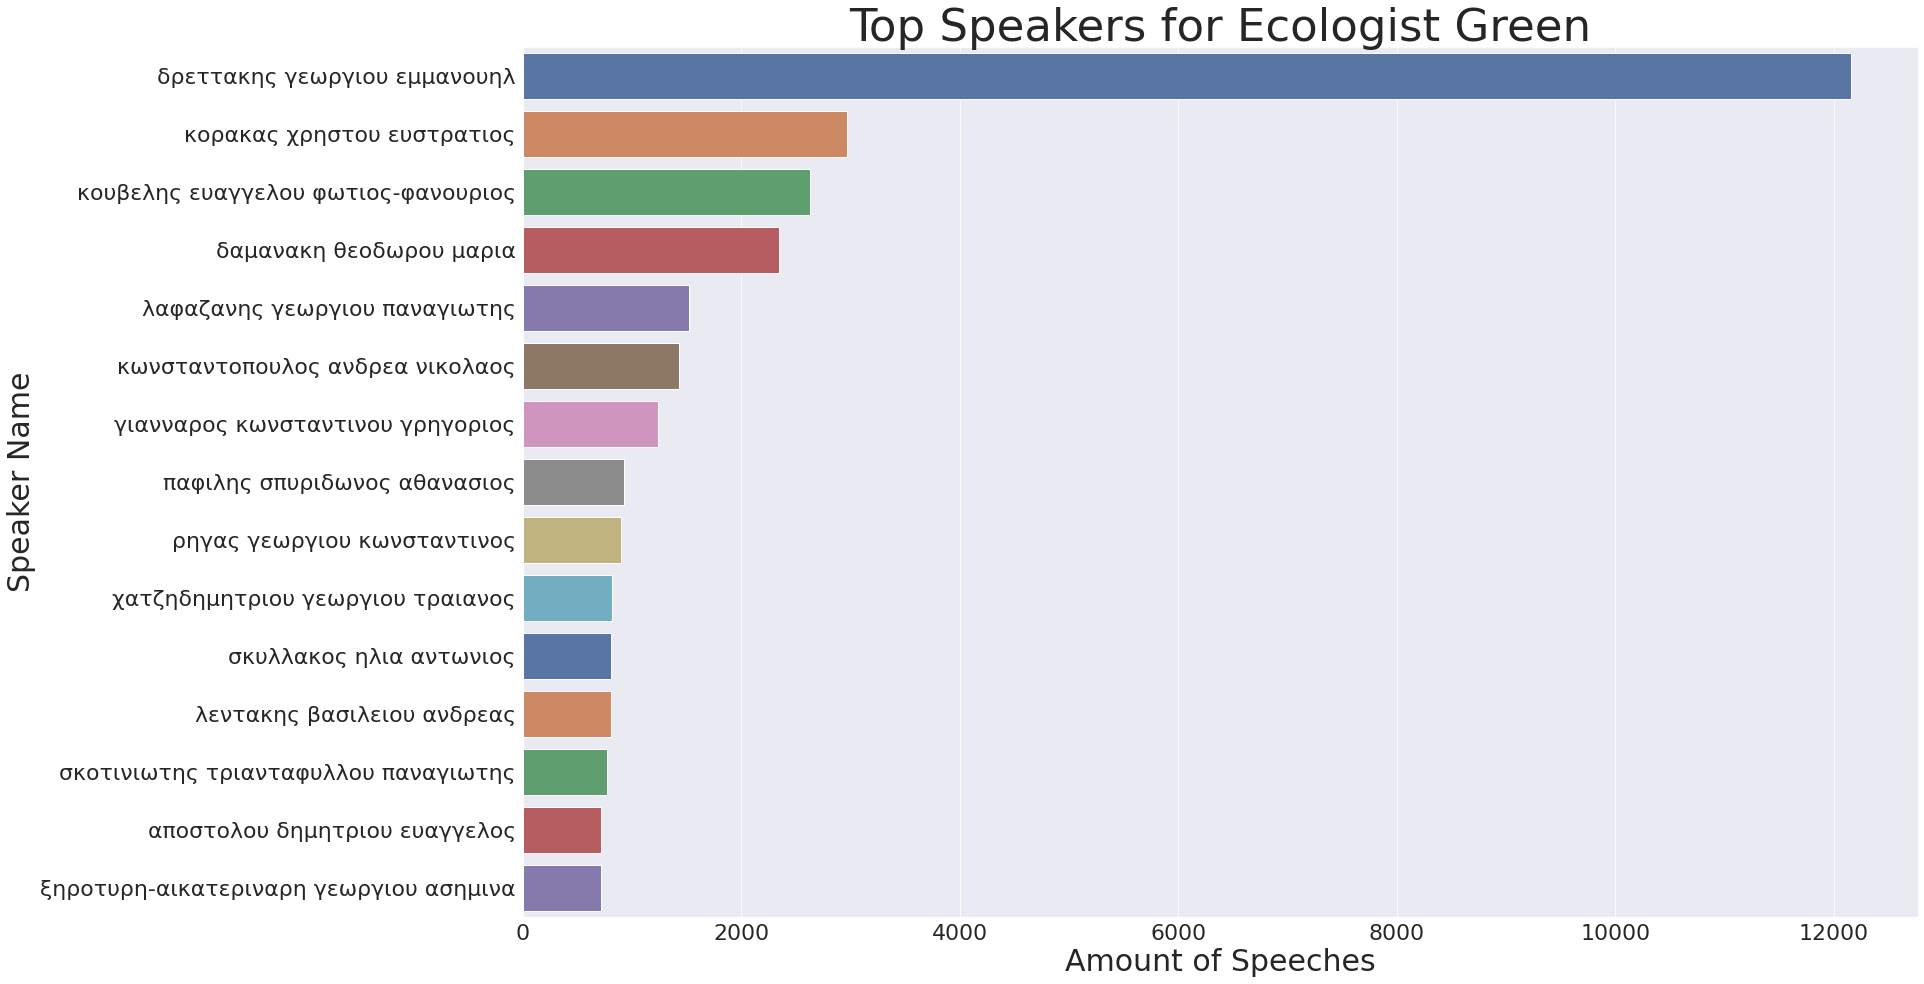

In [61]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='συνασπισμος της αριστερας των κινηματων και της οικολογιας'][:15],
            y='member_name' , x='count', palette='deep', dodge=False)
plt.title('Top Speakers for Ecologist Green', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation 
There is a huge difference in the amount of speeches between the first member and the rest ones. In detail, the gap is more than 10 thousand speeches in most cases 

* Let's examine the top speakers for ανεξαρτητοι (εκτος κομματος)

Text(0.5, 0, 'Amount of Speeches')

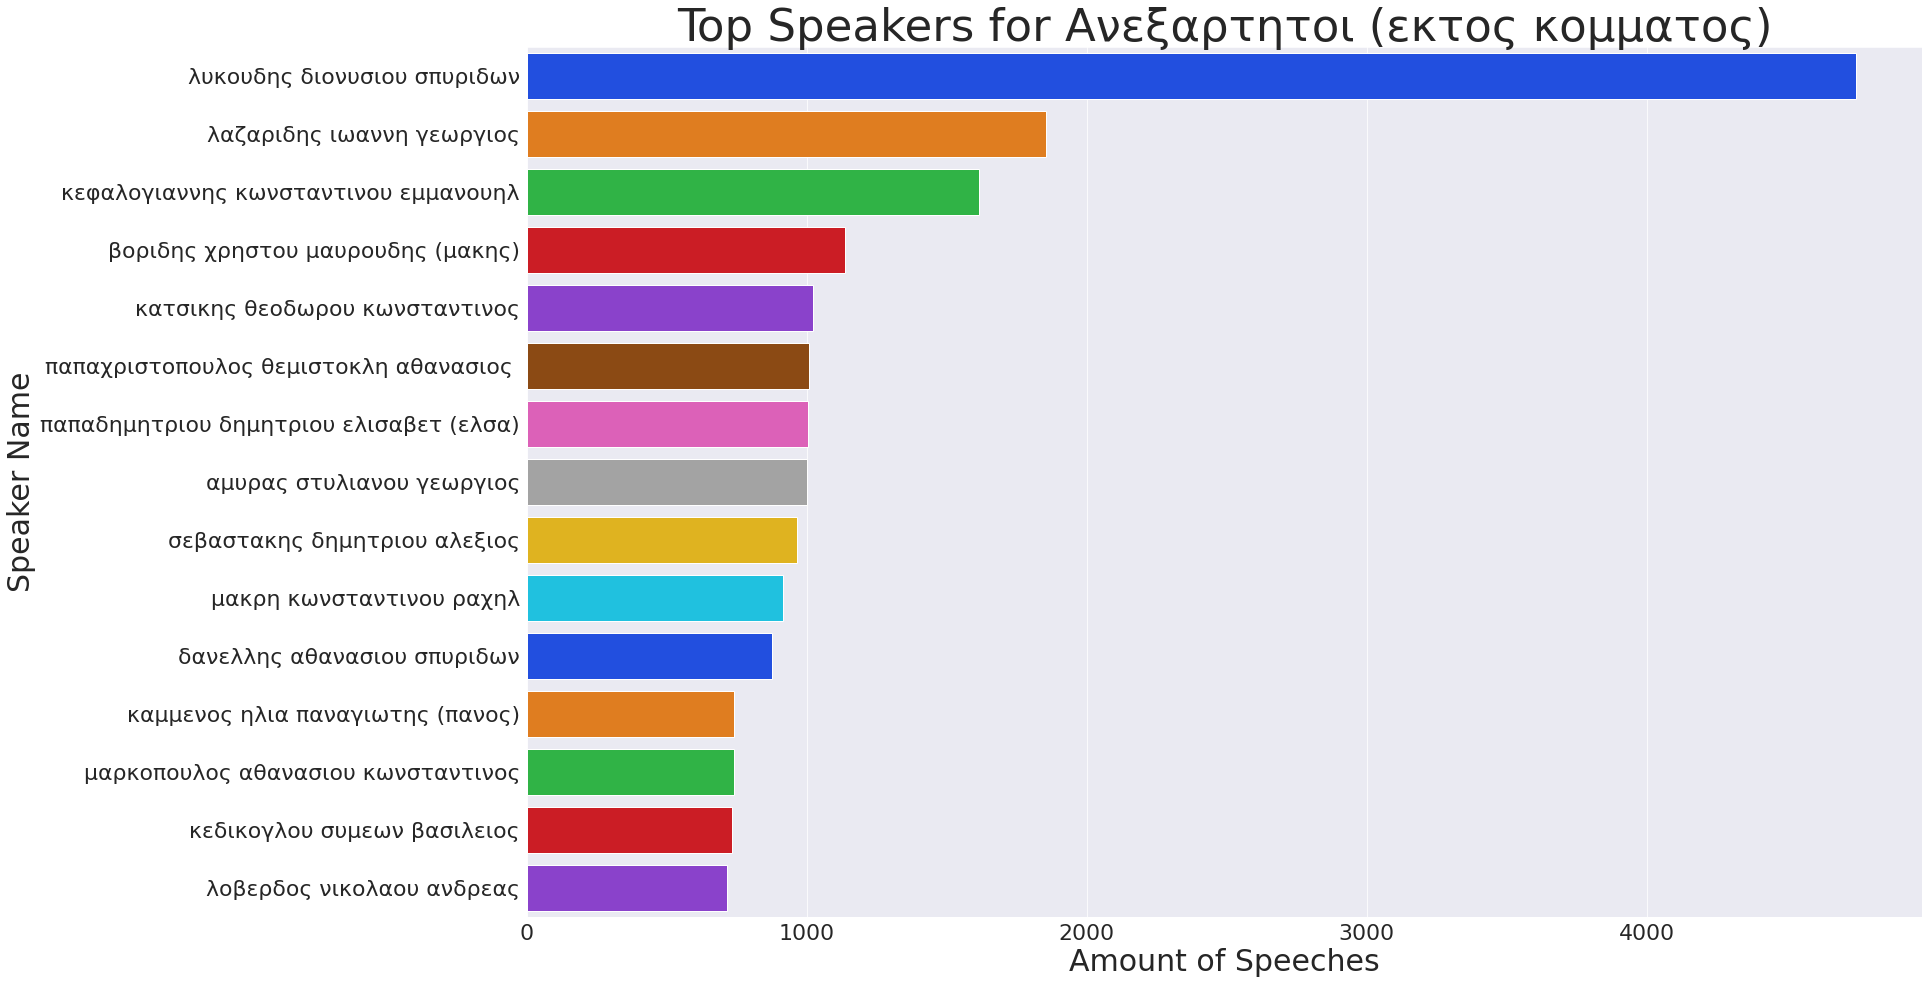

In [62]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='ανεξαρτητοι (εκτος κομματος)'][:15],
            y='member_name' , x='count', palette='bright', dodge=False)
plt.title('Top Speakers for Aνεξαρτητοι (εκτος κομματος)', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observations
The first speaker (λυκουδης διονυσιου σπυριδων) has by far the most speeches for this party (which actually describes the independent members). In detail, he has almost 3 thousand more speeches compared to the second speaker. Also, from the 4th speaker and on, the differences in the amount of speeches are slight

* The party λαικος ορθοδοξος συναγερμος will be examined now

Text(0.5, 0, 'Amount of Speeches')

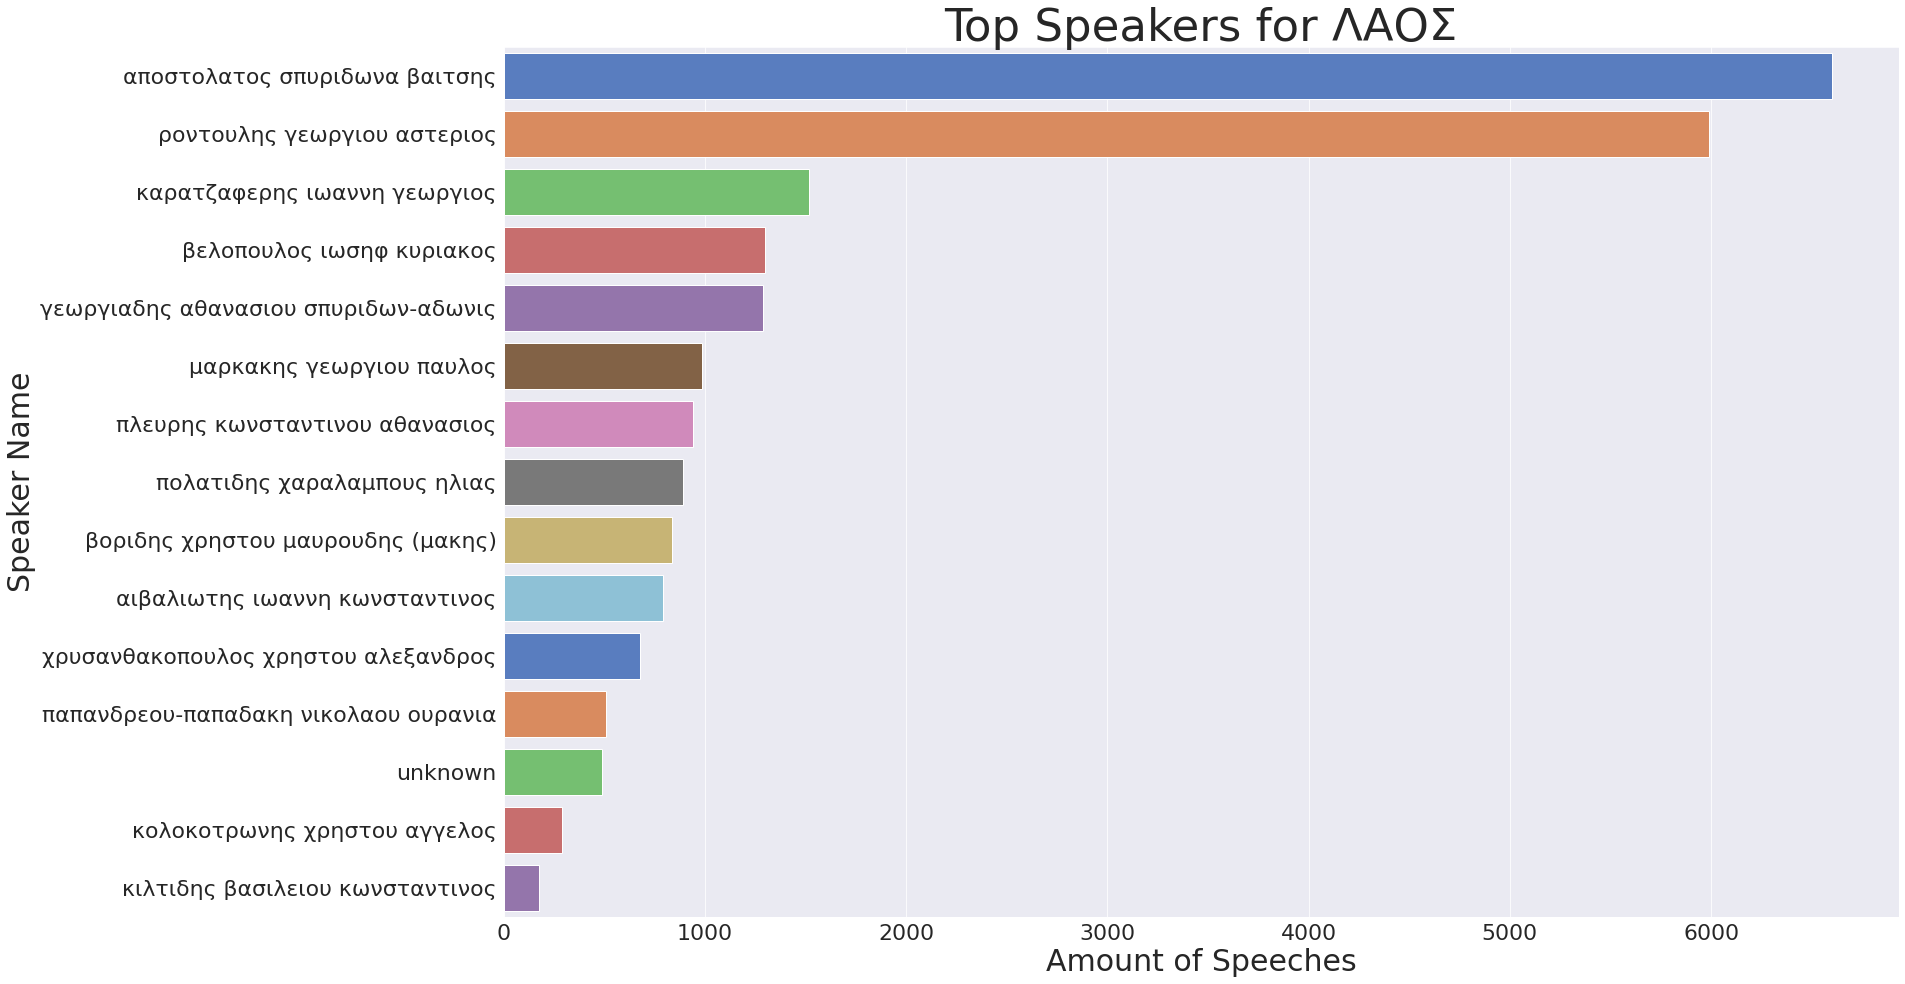

In [63]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='λαικος ορθοδοξος συναγερμος'][:15],
            y='member_name' ,x='count', palette='muted', dodge=False)
plt.title('Top Speakers for ΛΑΟΣ', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation 
The top two speakers have by far the most given speeches. The difference from the third is more than 4 thousand speeches

* Now the party δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα) will be checked

Text(0.5, 0, 'Amount of Speeches')

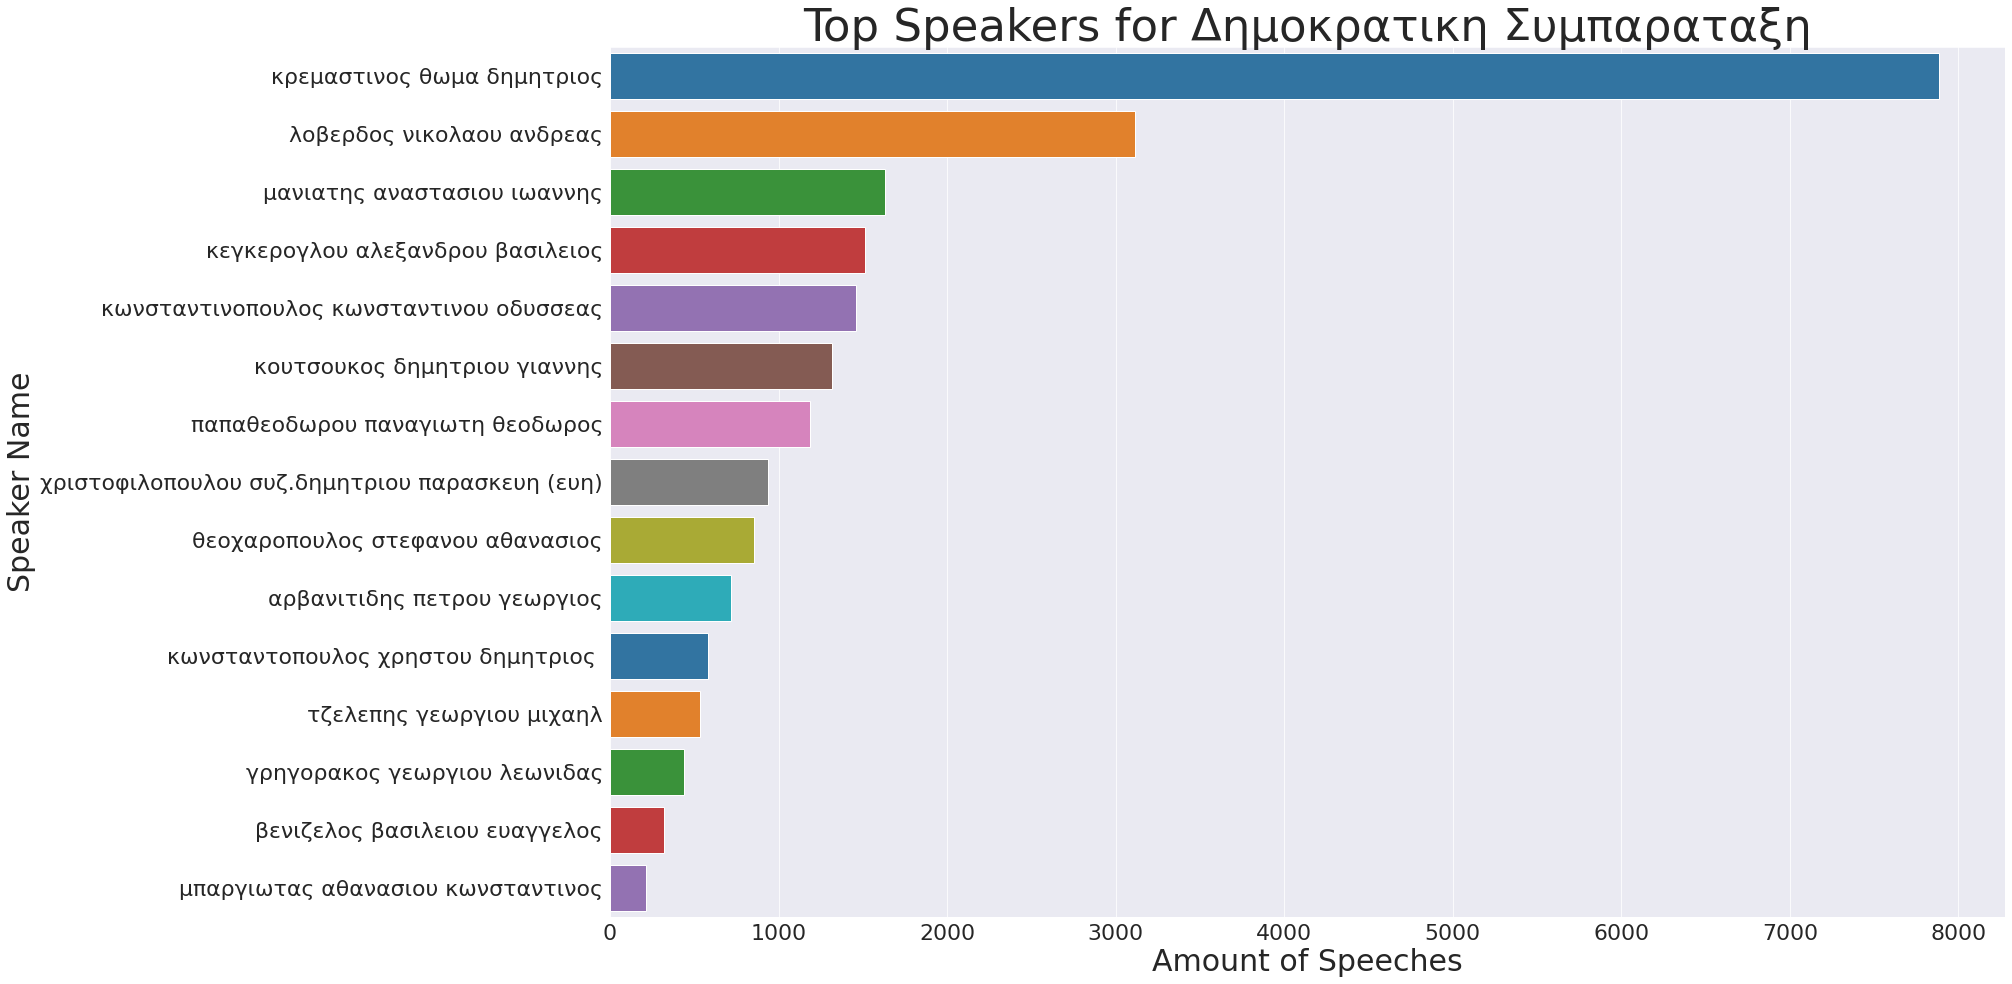

In [64]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)'][:15],
            y='member_name' , x='count', palette='tab10', dodge=False)
plt.title('Top Speakers for Δημοκρατικη Συμπαραταξη', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation
Again the first speaker (κρεμαστινος θωμα δημητριος) has the most speeches by far. A difference of more than 4 thousand speeches is noticed between the first and second speaker

* Next up is λαικος συνδεσος - χρυση αυγη

Text(0.5, 0, 'Amount of Speeches')

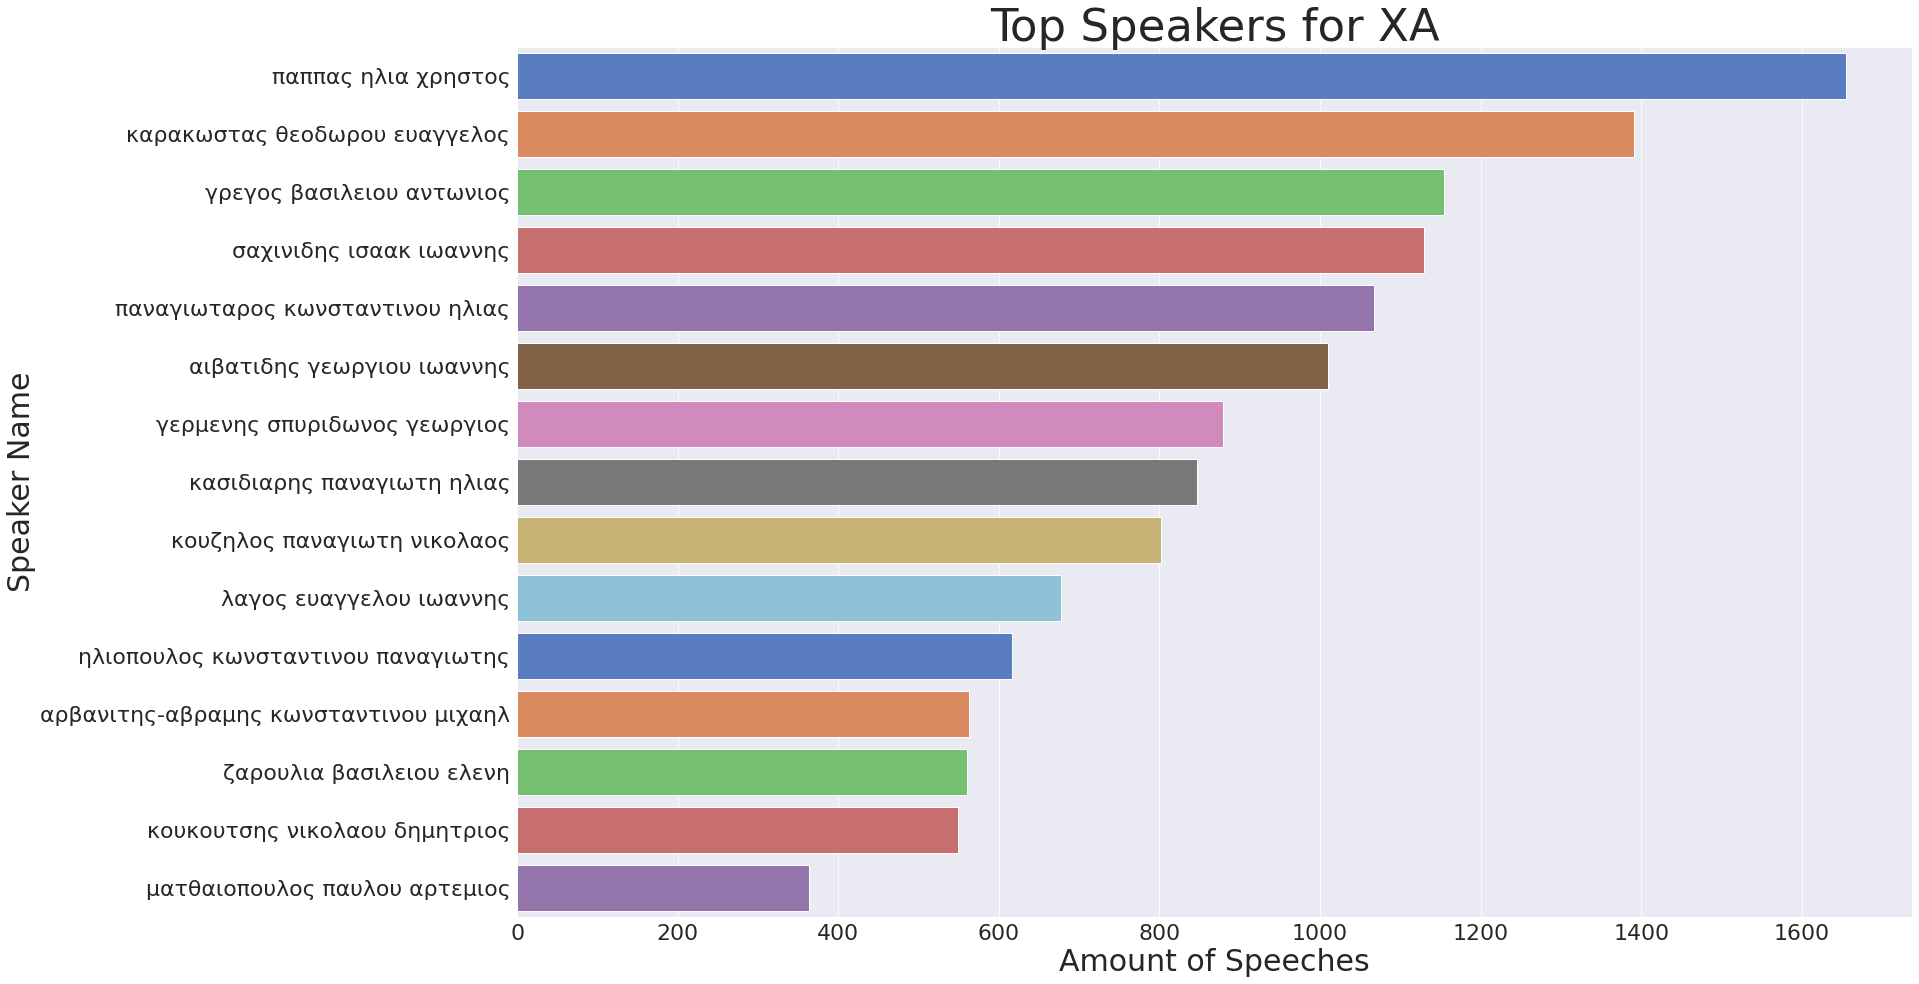

In [65]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='λαικος συνδεσος - χρυση αυγη'][:15],
            y='member_name' , x='count', palette='muted', dodge=False)
plt.title('Top Speakers for ΧΑ', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation
It is noticable that the gaps between neighbor speakers (except for the top 2 speakers) in the plot are not that great

* Lastly, let's see the top speakers for ανεξαρτητοι ελληνες - πανος καμμενος

Text(0.5, 0, 'Amount of Speeches')

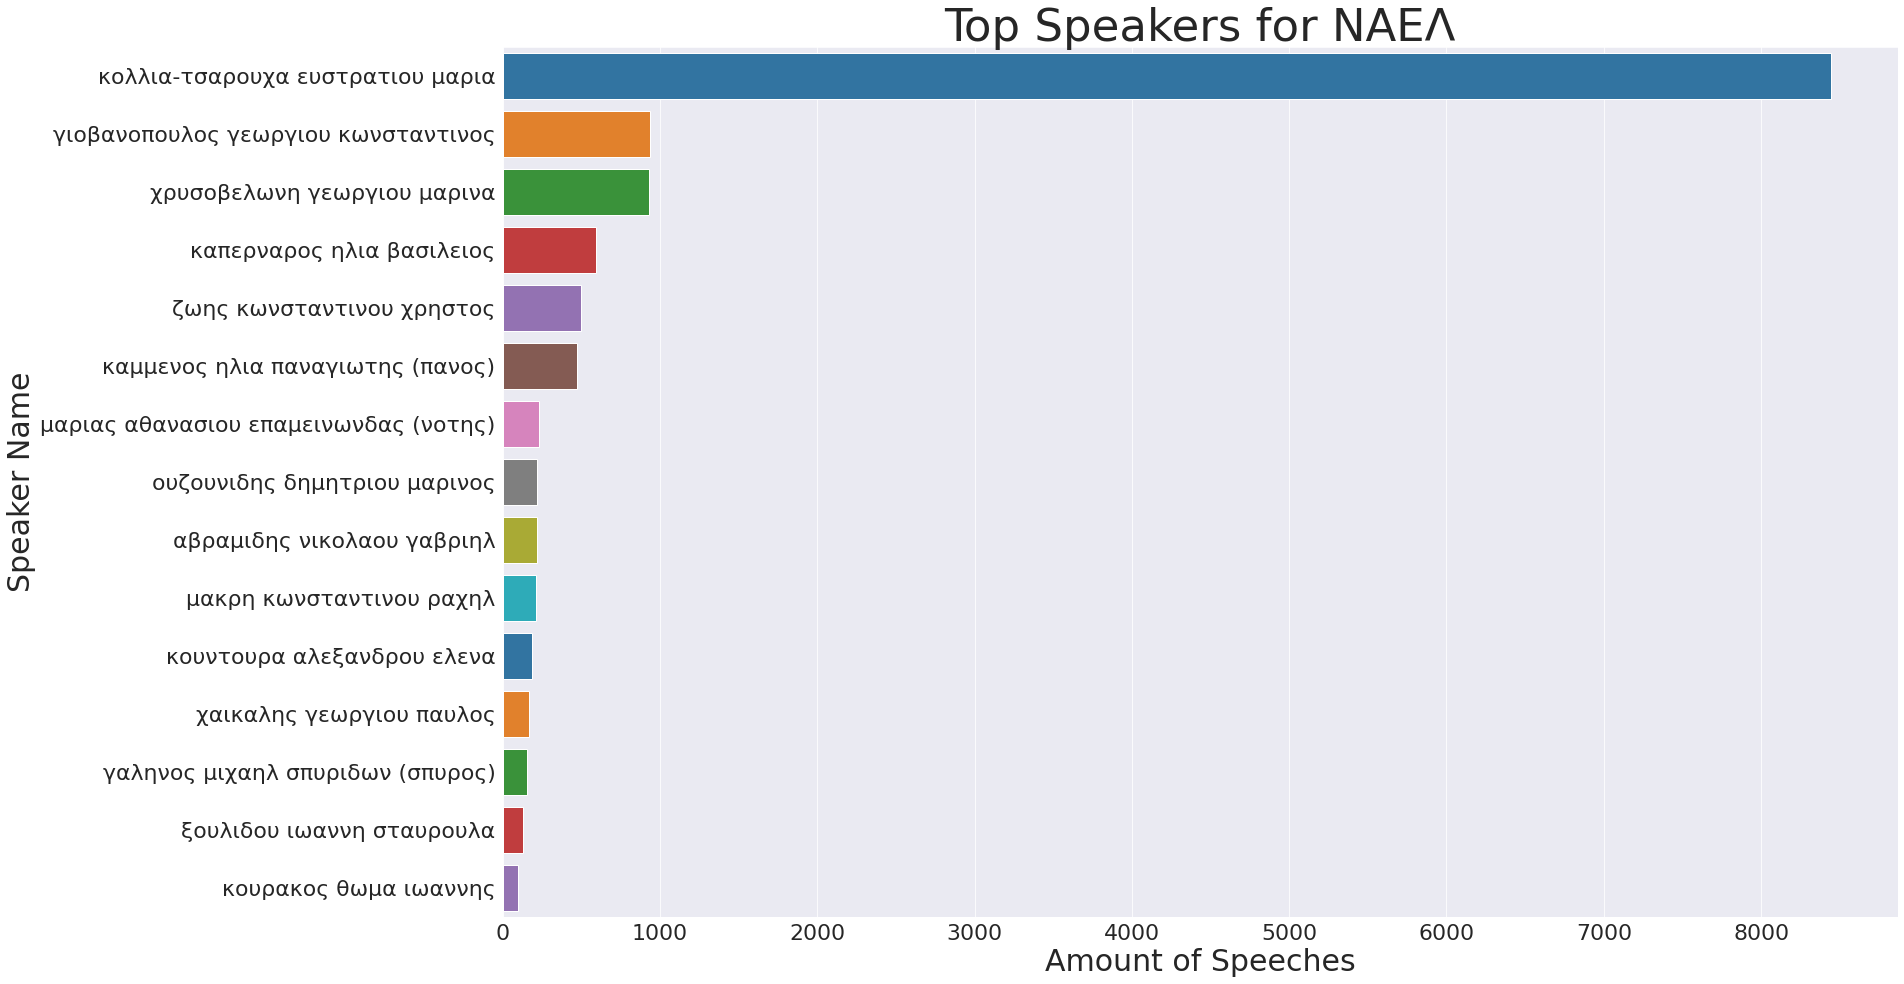

In [66]:
fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(
            data=speeches_member_party.loc[speeches_member_party.political_party=='ανεξαρτητοι ελληνες - πανος καμμενος'][:15],
            y='member_name', x='count', palette='tab10', dodge=False)
plt.title('Top Speakers for ΝAEΛ', fontdict ={'size': 45}, loc='center') 
plt.ylabel('Speaker Name', fontdict ={'size': 30})
plt.xlabel('Amount of Speeches',fontdict ={'size': 30})

#### Observation
The first speaker (κολλια-τσαρουχα ευστρατιου μαρια	) has the most speeches by far. Particularly, she has more than 8 thousand speeches than the second speaker

Now we will look into the amount of different speakers per party in all the years
* We will use the dataframe `speeches_member_party` that contains the member name, his/her party and the amount of speeches given by that person
* Only members with more than 10 speeches are taken into account because that amount is assumed to be significant
* Then we group by political party to get the count of different speakers per party
* Lastly, the values are sorted descendingly

In [67]:
speeches_member_significant = speeches_member_party.loc[speeches_member_party['count'] > 10]
speeches_sum_members = speeches_member_significant[['political_party','member_name']]\
                                .groupby('political_party').agg(['count']).reset_index()
speeches_sum_members.columns = speeches_sum_members.columns.map(''.join) #getting rid of multiindex dataframe
speeches_sum_members = speeches_sum_members.sort_values(by='member_namecount', ascending=False) #sorting values
speeches_sum_members

political_party  member_namecount
9                                      νεα δημοκρατια               408
10                     πανελληνιο σοσιαλιστικο κινημα               395
11                συνασπισμος ριζοσπαστικης αριστερας               193
0                        ανεξαρτητοι (εκτος κομματος)               101
6                         κομμουνιστικο κομμα ελλαδας                57
12  συνασπισμος της αριστερας των κινηματων και τη...                37
8                        λαικος συνδεσος - χρυση αυγη                25
1                ανεξαρτητοι ελληνες - πανος καμμενος                22
3   δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη α...                19
7                         λαικος ορθοδοξος συναγερμος                19
13                                          το ποταμι                16
2   ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατ...                12
4                        δημοκρατικο κοινωνικο κινημα                 9
5                                      ενωση κεντρωων                 8

* Now we can visualize the results

Text(0.5, 0, 'Speakers amount')

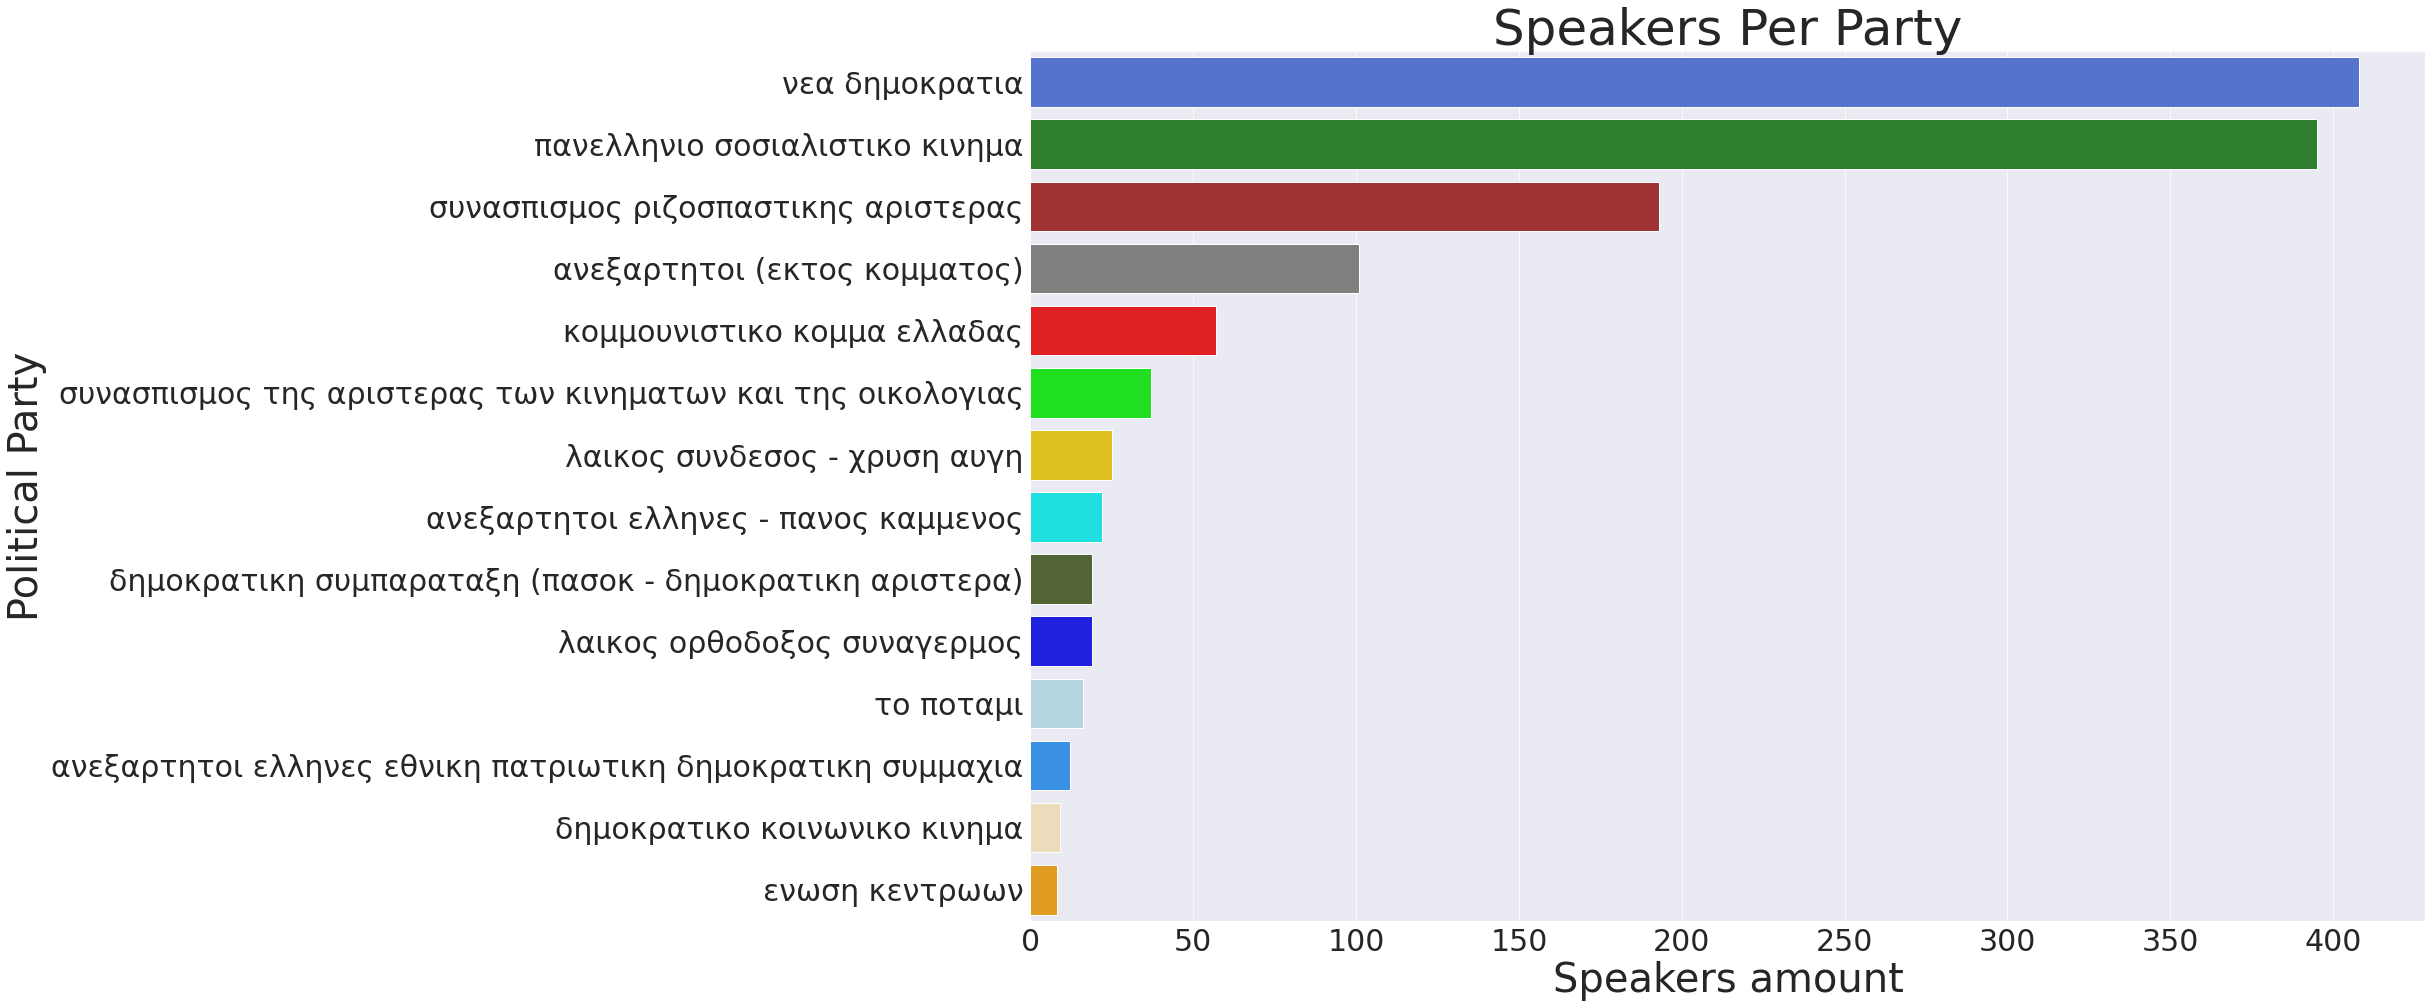

In [68]:
font = {'size': 30, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig_dims = (25, 16)
fig, ax = plt.subplots(figsize=fig_dims,)
ax = sns.barplot(y= speeches_sum_members.political_party , 
            x =speeches_sum_members.member_namecount, palette=colors_parties, )
plt.title('Speakers Per Party', fontdict ={'size': 50}, loc='center') 
plt.ylabel('Political Party', fontdict ={'size': 40})
plt.xlabel('Speakers amount',fontdict ={'size': 40})

#### Conclusions
Again νεα δημοκρατια and πανελληνιο σοσιαλιστικο κινημα	are on the top. That can be explained from the fact that those parties have won most previous elections for the years being investigated. As a result those parties have the most seats in the parliament for the elections won and thus they will have more different speakers to fill those seats.

Next up we will inspect the evolution of the speeches of the speakers with the most speeches over the years
* We create a new dataframe `proceed_top_speakers` that contains the names, dates and party of the top 10 speakers (with the most speeches). We do that by merging the dataframe of the proceedings `proceed` with the dataframe `speeches_member_party` that contains the sum amount of proceedings per speaker
* Next up, the date is transformed only to keep the year

In [69]:
proceed_top_speakers = pd.merge(proceed[['member_name','sitting_date','political_party']],
                        speeches_member_party.member_name[:10],
                        on='member_name', how='inner')
proceed_top_speakers.sitting_date = proceed_top_speakers.sitting_date.dt.year
proceed_top_speakers

member_name  sitting_date  \
0       κρητικος νικολαου παναγιωτης          1989   
1       κρητικος νικολαου παναγιωτης          1989   
2       κρητικος νικολαου παναγιωτης          1989   
3       κρητικος νικολαου παναγιωτης          1989   
4       κρητικος νικολαου παναγιωτης          1989   
...                              ...           ...   
211918  δρεττακης γεωργιου εμμανουηλ          1993   
211919  δρεττακης γεωργιου εμμανουηλ          1993   
211920  δρεττακης γεωργιου εμμανουηλ          1993   
211921  δρεττακης γεωργιου εμμανουηλ          1993   
211922  δρεττακης γεωργιου εμμανουηλ          1993   

                                          political_party  
0                          πανελληνιο σοσιαλιστικο κινημα  
1                          πανελληνιο σοσιαλιστικο κινημα  
2                          πανελληνιο σοσιαλιστικο κινημα  
3                          πανελληνιο σοσιαλιστικο κινημα  
4                          πανελληνιο σοσιαλιστικο κινημα  
...                                                   ...  
211918  συνασπισμος της αριστερας των κινηματων και τη...  
211919  συνασπισμος της αριστερας των κινηματων και τη...  
211920  συνασπισμος της αριστερας των κινηματων και τη...  
211921  συνασπισμος της αριστερας των κινηματων και τη...  
211922  συνασπισμος της αριστερας των κινηματων και τη...  

[211923 rows x 3 columns]

* Now, we get the counts of the speakers by different year.
* The counts are sorted by ascending year afterwards

In [70]:
proceed_top_speakers_counts = proceed_top_speakers.value_counts()
proceed_top_speakers_counts = proceed_top_speakers_counts.reset_index()
proceed_top_speakers_counts = proceed_top_speakers_counts.rename(columns={0:'count'})
proceed_top_speakers_counts= proceed_top_speakers_counts.sort_values(by='sitting_date')
proceed_top_speakers_counts

member_name  sitting_date  \
136  μπενακη-ψαρουδα ευαγγελου αννα          1989   
155      χατζηγακης μιχαηλ σωτηριος          1989   
163         σουρλας ιωαννη γεωργιος          1989   
86     κρητικος νικολαου παναγιωτης          1989   
123    δρεττακης γεωργιου εμμανουηλ          1989   
..                              ...           ...   
128      τραγακης παναγιωτη ιωαννης          2017   
52        κακλαμανης μιχαηλ νικητας          2018   
145      τραγακης παναγιωτη ιωαννης          2018   
164      τραγακης παναγιωτη ιωαννης          2019   
91        κακλαμανης μιχαηλ νικητας          2019   

                                       political_party  count  
136                                     νεα δημοκρατια    101  
155                                     νεα δημοκρατια     35  
163                                     νεα δημοκρατια     19  
86                      πανελληνιο σοσιαλιστικο κινημα    449  
123  συνασπισμος της αριστερας των κινηματων και τη...    160  
..                                                 ...    ...  
128                                     νεα δημοκρατια    123  
52                                      νεα δημοκρατια   1660  
145                                     νεα δημοκρατια     53  
164                                     νεα δημοκρατια     18  
91                                      νεα δημοκρατια    410  

[182 rows x 4 columns]

* We specify the colors for the speakers so that all the speakers of πανελληνιο σοσιαλιστικο κινημα have variations of green, all speakers of νεα δημοκρατια have variations of blue and the speaker of συνασπισμος της αριστερας των κινηματων και της οικολογιας has yellow

In [71]:
colors_speakers={
    'κακλαμανης χρηστου αποστολος':'green',
    'σγουριδης σγουρη παναγιωτης':'lime',
    'σουρλας ιωαννη γεωργιος':'navy',
    'κρητικος νικολαου παναγιωτης':'darkolivegreen',
    'γειτονας ιωαννη κωνσταντινος':'palegreen',
    'τραγακης παναγιωτη ιωαννης':'blue',
    'χατζηγακης μιχαηλ σωτηριος':'slateblue',
    'μπενακη-ψαρουδα ευαγγελου αννα':'lightblue',
    'κακλαμανης μιχαηλ νικητας':'cyan',
    'δρεττακης γεωργιου εμμανουηλ':'yellow',   
}

* Let's see the plot

Text(0.5, 0, 'Year')

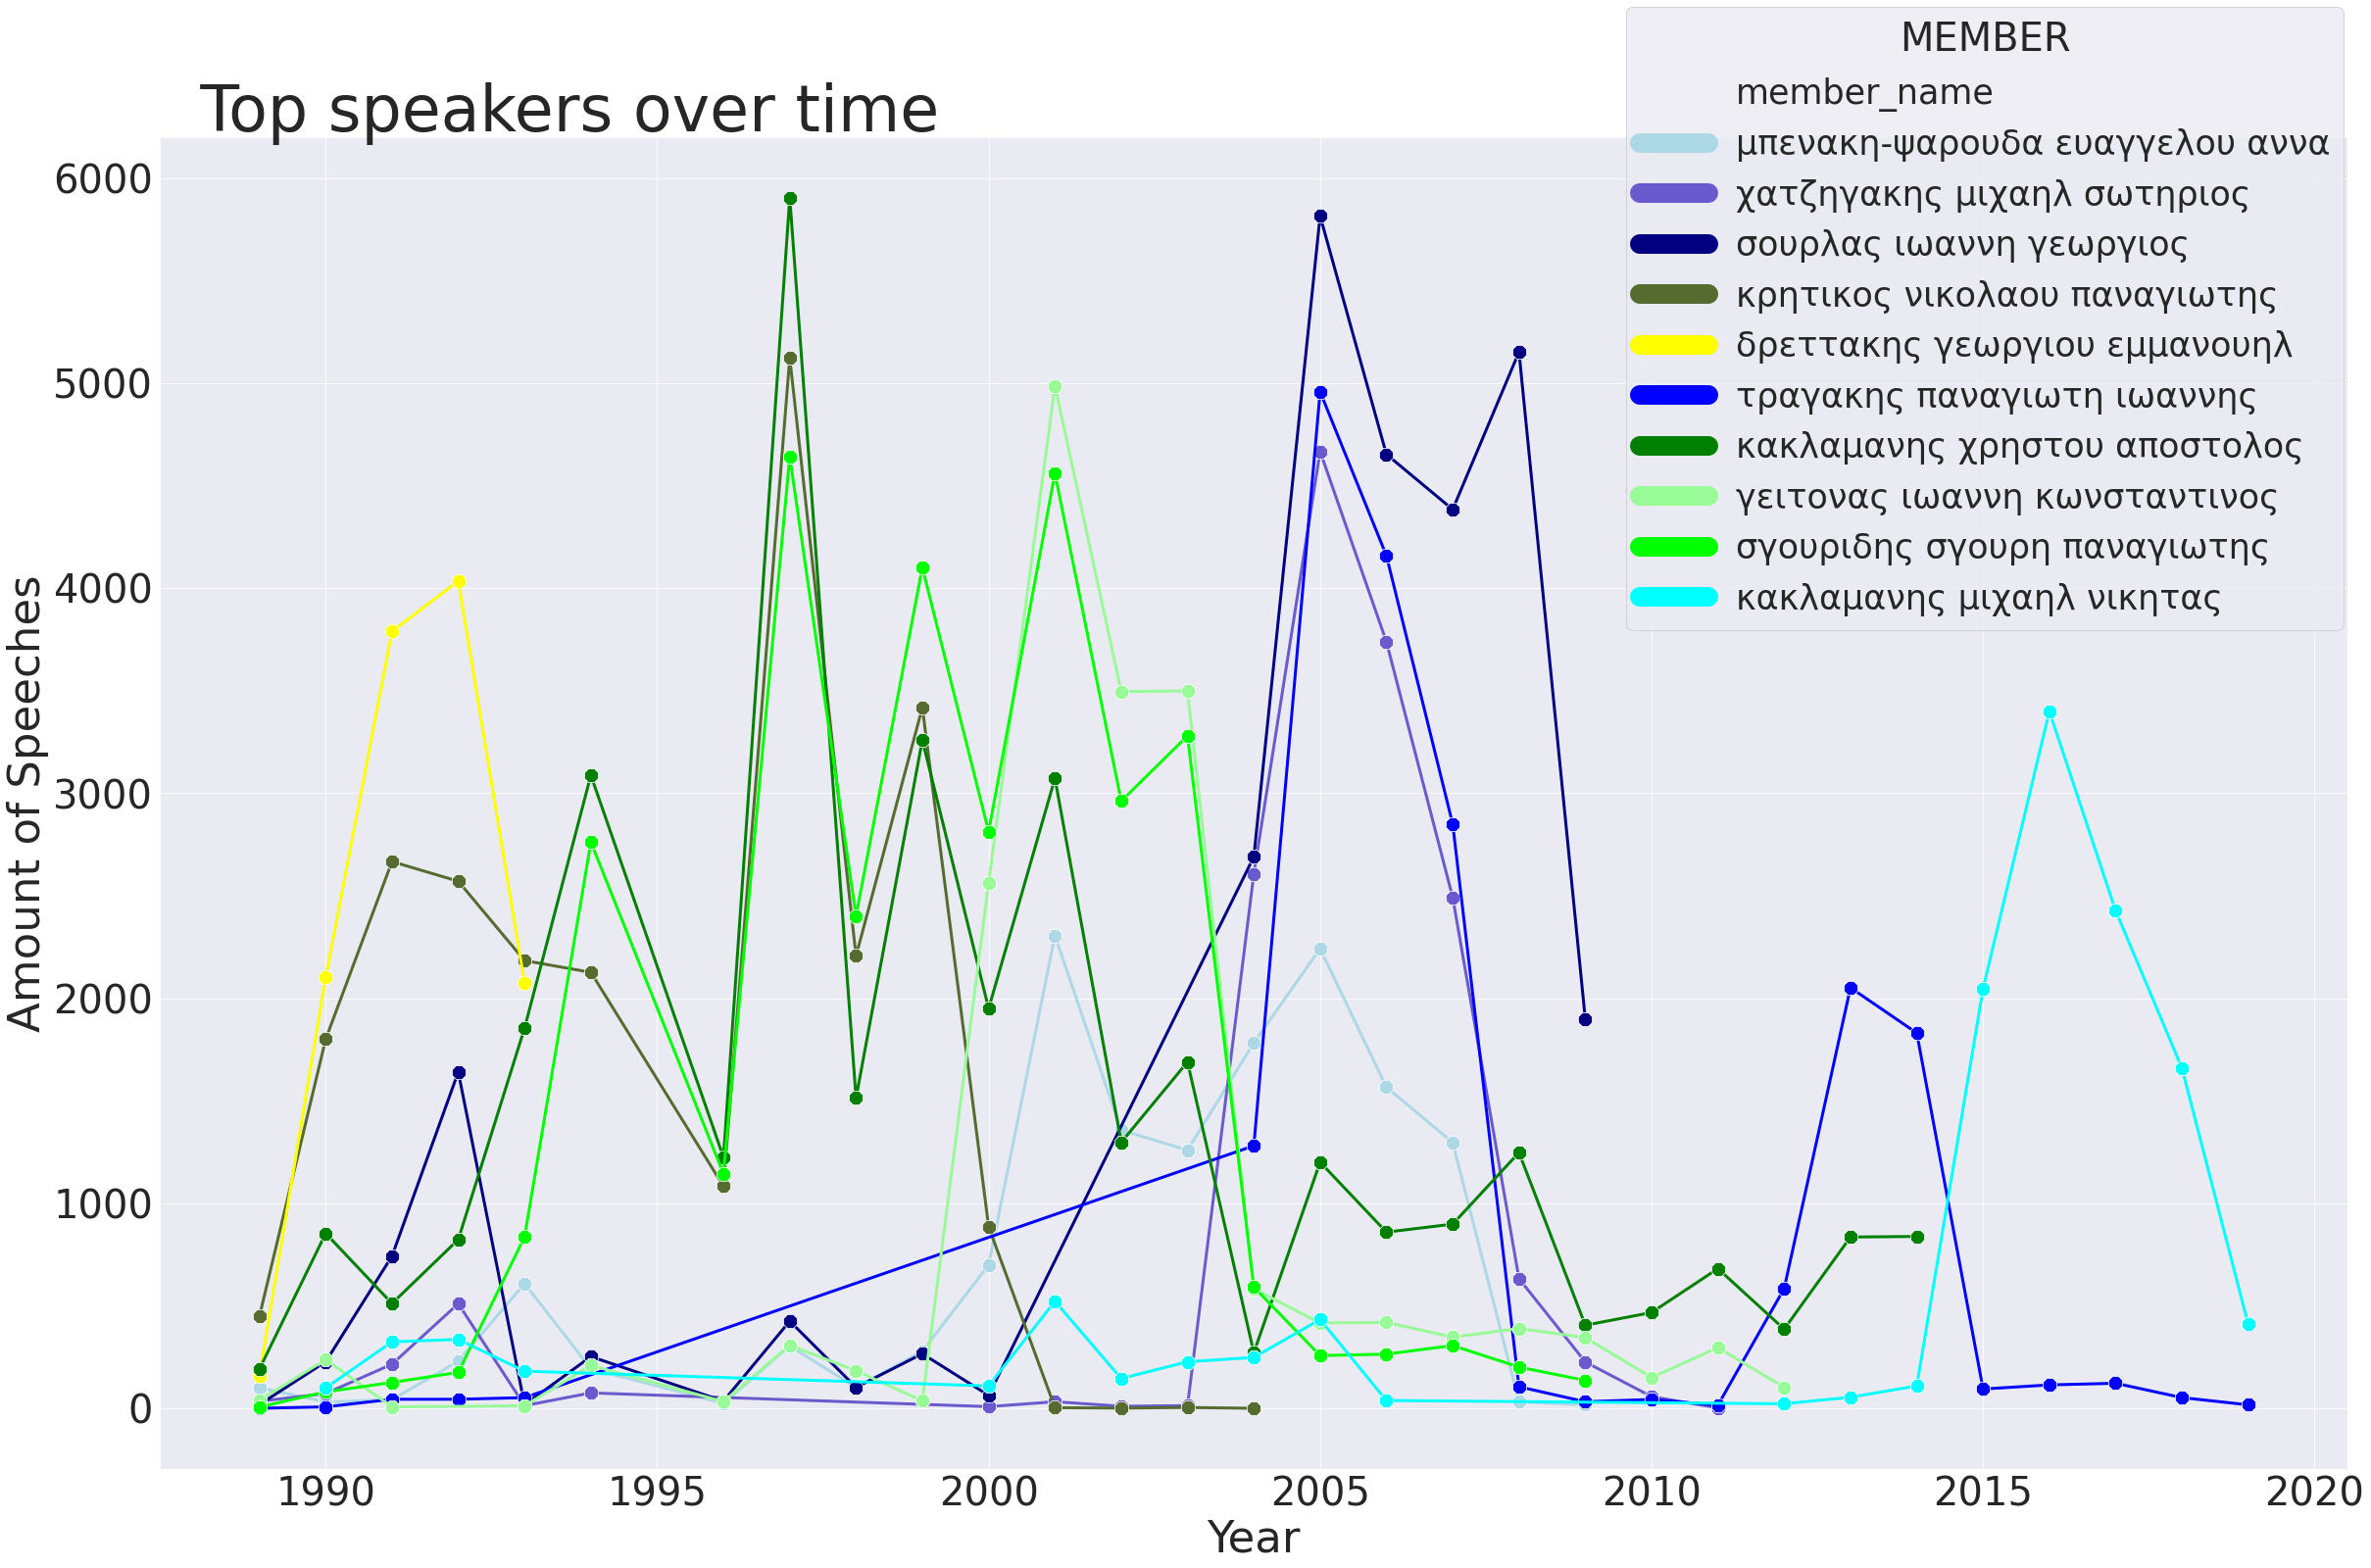

In [72]:
font = {'size': 40, 'family':'DejaVu Sans'} #increasing the size of the different political parties text
matplotlib.rc('font', **font)

fig, ax = plt.subplots(figsize=(40,25))
sns.lineplot(x = "sitting_date", y = "count", data=proceed_top_speakers_counts, hue="member_name", 
             palette=colors_speakers, marker="8", markersize=15, linewidth=3)
leg = plt.legend(bbox_to_anchor=(0.67, 0.63),borderaxespad=0, prop={'size': 35}, title  ="MEMBER", )
for i in range(1,11): #increasing the width of the line inside the legend
    leg.get_lines()[i].set_linewidth(20)
plt.title('  Top speakers over time', fontdict ={'size': 65}, loc='left')
plt.ylabel('Amount of Speeches', fontdict ={'size': 45})
plt.xlabel('Year',fontdict ={'size': 45})

#### Observations
As explained above the green variations correspond to ΠΑΣΟΚ, the blue to ΝΔ and the yellow to Πρασινοι Οικολογοι.
* Most of those speakers look like they stop giving speeches after some time. Only two of those 10 seem to continue till $2019$
* Also 9 out of the 10 speakers started giving speeches in the parliament in $1989$ (except for κακλαμανης μιχαηλ νικητας who started the next year)
* Many of those speakers keep having speeches in the parliament for many years in a row. One exception is δρεττακης γεωργιου εμμανουηλ from πρασινοι οικολογοι that gives speeches the first 5 years that we have data of. Another exception is τραγακης παναγιωτη ιωαννης who seem he had a break from giving speeches from $1993$ till $2004$
* Something else we can notice is for the parties of ΠΑΣΟΚ and ΝΔ. In detail, it is very likely that when one member increases (or decreases) his/her speeches for a year (compared to the previous) then most of the other top speakers of the party also increase (or decrease) their speeches in the same year. For example in $1997$ and $1999$ all the members of ΠΑΣΟΚ increaase their speeches compared to the previous year. Same for the members of ΝΔ in year $2005$

Let's examine if there is any connection between the month and the speeches of parties.
* Firstly, a dataframe is created from all the proceedings which contains only the columns of the date and the political party
* Then the date is transformed only to contain the month
* After, we get the counts of the rows by different month and party. Those are saved in the dataframe
* The counts are sorted by ascending year afterwards

In [45]:
proceed_month_party = proceed[['sitting_date','political_party']].copy()
proceed_month_party.sitting_date = proceed_month_party.sitting_date.dt.month
proceed_month_party = proceed_month_party.value_counts()
proceed_month_party = proceed_month_party.reset_index()
proceed_month_party = proceed_month_party.rename(columns={0:'count'})
proceed_month_party= proceed_month_party.sort_values(by='sitting_date')
proceed_month_party

sitting_date                                    political_party  count
64              1                       ανεξαρτητοι (εκτος κομματος)   2682
79              1  δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη α...   1946
74              1                        λαικος ορθοδοξος συναγερμος   2183
92              1                       λαικος συνδεσος - χρυση αυγη   1555
147             1                       δημοκρατικο κοινωνικο κινημα    565
..            ...                                                ...    ...
78             12                        λαικος ορθοδοξος συναγερμος   1981
125            12                       δημοκρατικο κοινωνικο κινημα    876
57             12                       ανεξαρτητοι (εκτος κομματος)   2928
138            12                                          το ποταμι    685
36             12                        κομμουνιστικο κομμα ελλαδας   7834

[168 rows x 3 columns]

* Now we can see the data in a lineplot

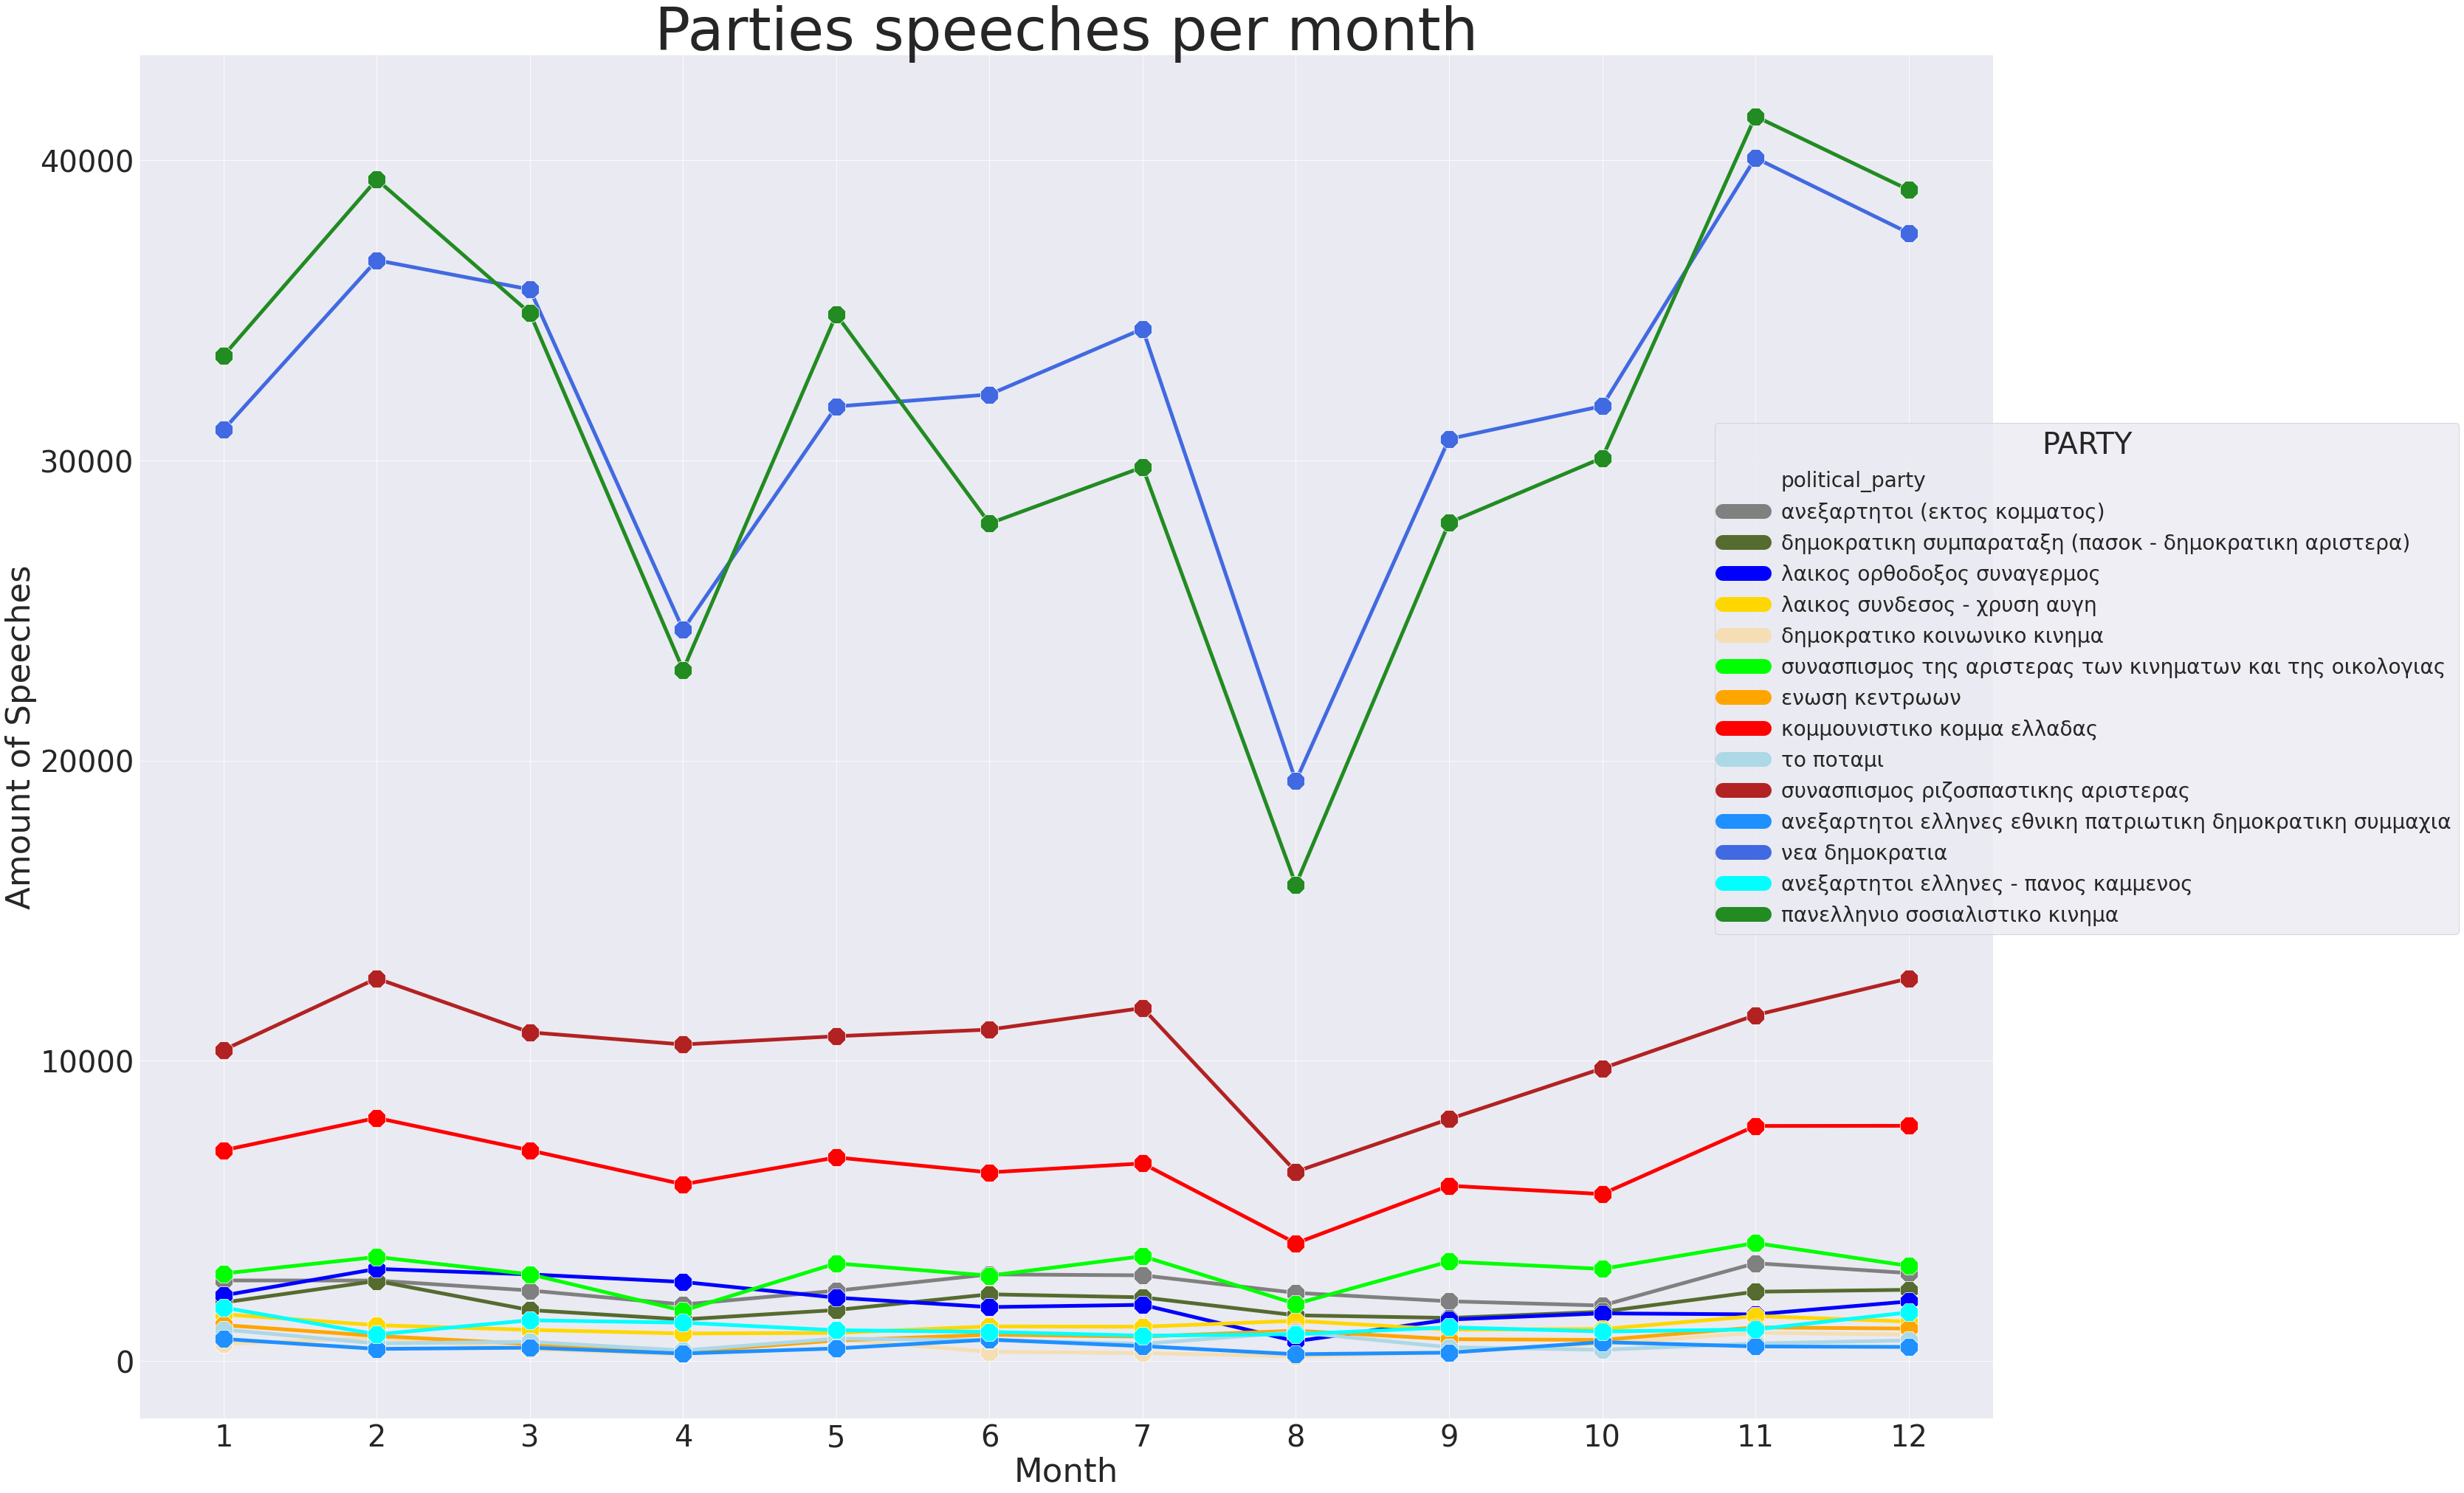

In [46]:
fig, ax = plt.subplots(figsize=(45,34))
sns.lineplot(x = "sitting_date", y = "count", data=proceed_month_party, hue="political_party", 
             palette=colors_parties, marker="8", markersize=25, linewidth=5)
leg = plt.legend(bbox_to_anchor=(0.85, 0.73),borderaxespad=0, prop={'size': 28}, title  ="PARTY", )
for i in range(1,15): #increasing the width of the line inside the legend
    leg.get_lines()[i].set_linewidth(20)
plt.title('Parties speeches per month', fontdict ={'size': 80}, loc='center')
plt.ylabel('Amount of Speeches', fontdict ={'size': 45})
plt.xlabel('Month',fontdict ={'size': 45})
plt.xticks(np.arange(1, 13, step=1))
plt.show()

#### Observations
* For the month of April and August all parties appear to have minimums. That could possibly be explained from the fact that those two months also contain holiday periods e.g. Easter holidays and summer holidays. 
* Very interesting is that the two parties ΠΑΣΟΚ and ΝΔ have very similar line patterns
* Also, local maximums for the two parties ΠΑΣΟΚ and ΝΔ are in February and November
* Similar line shapes are also visible for ΚΚΕ and ΣΥΡΙΖΑ. Both have local maximums in February, July and December 

## CLASSIFIERS NON-NEURAL
Let's predict the speeches' party with non neural-networks. We are going to try different data preparation and classifiers in order to find the best combinations of models. We will discover the best by trying a lot
* Firstly, the necessary libraries are imported

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer,CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn import metrics
from sklearn.dummy import DummyClassifier

* Now the useful columns of the proceedings are copied and a new dataframe `proceed_party` is created 

In [17]:
proceed_party = proceed[['political_party','speech']].copy()
proceed_party

political_party  \
0        πανελληνιο σοσιαλιστικο κινημα   
1        πανελληνιο σοσιαλιστικο κινημα   
2        πανελληνιο σοσιαλιστικο κινημα   
3        πανελληνιο σοσιαλιστικο κινημα   
4        πανελληνιο σοσιαλιστικο κινημα   
...                                 ...   
1184022                  ενωση κεντρωων   
1184023                  ενωση κεντρωων   
1184024                  ενωση κεντρωων   
1184025                  ενωση κεντρωων   
1184026                  ενωση κεντρωων   

                                                    speech  
0         Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...  
1         Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...  
2         Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...  
3         Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...  
4         Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ...  
...                                                    ...  
1184022   Για μερικά δευτερόλεπτα θέλει να συμπληρώσει ...  
1184023             Ορίστε, έχετε τον λόγο, κύριε Υπουργέ.  
1184024   Ευχαριστούμε, κύριε Υπουργέ.\tΟ κ. Καββαδάς έ...  
1184025   Ευχαριστούμε τον κ. Καββαδά.\tΤον λόγο έχει ο...  
1184026   Ευχαριστώ και εγώ τον κ. Συντυχάκη. Τον λόγο ...  

[1138141 rows x 2 columns]

* We separate the target column (party) from the speeches column
* Now let's split the data into training and testing. For the start, we split the data randomly and the 20% of the data is going to be used for testing purposes

In [49]:
target = proceed_party['political_party'].copy() # target column separated
X_train, X_test, y_train, y_test = train_test_split(proceed_party.speech, target, test_size=0.2,  random_state=7)

* Now we want to transform the speeches into tokens and count those tokens. For that process `CountVectorizer` will be used.
* After that, we want to train a classifier based on those counts of tokens and their corresponding party in order to predict the party of the testing speeches afterwards. The classifier used is the multinomial Naive Bayes classifier.
* A pipeline will be used to chain those tasks together and implement them one after the other.

In [50]:
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),
                    ])

* Now the model can be trained with a single command (`fit`)
* Only the training data are used to train the classifier

In [23]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('clf', MultinomialNB())])

It is time to predict the parties for the test data
* We can see the results-metrics on the classification report

In [24]:
clf_predict = text_clf.predict(X_test)
print(classification_report(y_test, clf_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.14      0.00      0.01      6074
                      ανεξαρτητοι ελληνες - πανος καμμενος       0.23      0.09      0.13      2765
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.08      0.00      0.00      1129
    δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)       0.24      0.06      0.09      4589
                              δημοκρατικο κοινωνικο κινημα       0.19      0.00      0.01      1241
                                            ενωση κεντρωων       0.09      0.00      0.00      1941
                               κομμουνιστικο κομμα ελλαδας       0.45      0.40      0.43     15795
                               λαικος ορθοδοξος συναγερμος       0.28      0.20      0.23      4736
                              λαικος συνδεσος - χρυση αυγη       0.49      0.12      0.19      2851

#### Results
We achieve an accuracy of 46%. It is surely possible to increase that.

Some parameters will be used to see if we can increase the accuracy.
* The accents of the greek tokens are removed and all the characters are transformed into lowercase.

In [29]:
text_clf = Pipeline([('vect', CountVectorizer(strip_accents='unicode',lowercase=True)),
                     ('clf', MultinomialNB()),
                    ])
text_clf.fit(X_train, y_train)
clf_predict = text_clf.predict(X_test)
print(classification_report(y_test, clf_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.13      0.00      0.01      6074
                      ανεξαρτητοι ελληνες - πανος καμμενος       0.22      0.10      0.13      2765
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.12      0.00      0.00      1129
    δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)       0.22      0.06      0.09      4589
                              δημοκρατικο κοινωνικο κινημα       0.14      0.00      0.00      1241
                                            ενωση κεντρωων       0.15      0.01      0.01      1941
                               κομμουνιστικο κομμα ελλαδας       0.45      0.40      0.43     15795
                               λαικος ορθοδοξος συναγερμος       0.27      0.20      0.23      4736
                              λαικος συνδεσος - χρυση αυγη       0.49      0.13      0.21      2851

#### Results
Unfortunately, we could not increase the accuracy, so the accents and lowercase do not impact the particular model.

### TFID
Let's try to also include the TfidfTransformer. The tfidf will help us solve the issue with large speeches. Larger speeches will automatically have more words and thus terms in those speeches will have higher counts.
* The TfidfTransformer will ensure that that speeches with similar party-content actually look similar, even though one may be much longer than the other.
* Good thing is that we just have to add the  `TfidfTransformer()` to our pipeline

In [30]:
text_clf = Pipeline([('vect', CountVectorizer(strip_accents='unicode',lowercase=True)),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB()),
                     ])

* Training the classifier

In [31]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer(strip_accents='unicode')),
                ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])

* Predicting the test speeches and showcasing the results

In [32]:
clf_predict = text_clf.predict(X_test)
print(classification_report(y_test, clf_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       1.00      0.00      0.00      6074
                      ανεξαρτητοι ελληνες - πανος καμμενος       1.00      0.00      0.00      2765
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       1.00      0.00      0.00      1129
    δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)       1.00      0.00      0.00      4589
                              δημοκρατικο κοινωνικο κινημα       1.00      0.00      0.00      1241
                                            ενωση κεντρωων       1.00      0.00      0.00      1941
                               κομμουνιστικο κομμα ελλαδας       0.38      0.25      0.30     15795
                               λαικος ορθοδοξος συναγερμος       0.00      0.00      0.00      4736
                              λαικος συνδεσος - χρυση αυγη       1.00      0.00      0.00      2851

#### Results
Looks like this time we get worse results

### HASH VECTORIZER AND SGD
Now we will try to use a different vectorizer and classifier
* Particularly, the `HashingVectorizer` is used because it is ideal for large datasets. It can reduce the time and memory use. We will use set a parameter for n_grams in order to get the one-grams, two-grams and three-grams meaning the single token and the two and three tokens in a row
* Also the SGD classifier is used instead of the Naive Bayes classifier

In [51]:
text_clf = Pipeline([('vect', HashingVectorizer(ngram_range=(1,3))),
                     ('tfidf', TfidfTransformer()),
                     ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                           alpha=1e-3,
                                           random_state=42))
                    ])

* The classifier is trained:

In [43]:
text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect', HashingVectorizer(ngram_range=(1, 3))),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.001, random_state=42))])

* Results are printed:

In [44]:
clf_predict = text_clf.predict(X_test)
print(classification_report(y_test, clf_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.17      0.02      0.04      6074
                      ανεξαρτητοι ελληνες - πανος καμμενος       0.22      0.03      0.05      2765
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.23      0.02      0.04      1129
    δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)       0.33      0.12      0.17      4589
                              δημοκρατικο κοινωνικο κινημα       0.08      0.02      0.03      1241
                                            ενωση κεντρωων       0.47      0.07      0.12      1941
                               κομμουνιστικο κομμα ελλαδας       0.46      0.26      0.33     15795
                               λαικος ορθοδοξος συναγερμος       0.34      0.09      0.14      4736
                              λαικος συνδεσος - χρυση αυγη       0.35      0.34      0.34      2851

#### Results
Again we reach a 46% accuracy

### Cutting short speeches
It is observed that some speeches only include a few words
* Now the words of each speech are calculated. For a faster implementation we consider that a speech with n words has n-1 spaces in it. 
* Thus we only have to count the number of spaces in the word (adding 1), instead of splitting the string between ' ' and counting them, which would take much more time.

In [18]:
proceed['words_count'] = proceed['speech'].str.count(' ') + 1
proceed

member_name sitting_date  \
0        κρητικος νικολαου παναγιωτης   1989-07-03   
1        κρητικος νικολαου παναγιωτης   1989-07-03   
2        κρητικος νικολαου παναγιωτης   1989-07-03   
3        κρητικος νικολαου παναγιωτης   1989-07-03   
4        κρητικος νικολαου παναγιωτης   1989-07-04   
...                               ...          ...   
1184022    γεωργιαδης νικολαου μαριος   2019-02-21   
1184023    γεωργιαδης νικολαου μαριος   2019-02-21   
1184024    γεωργιαδης νικολαου μαριος   2019-02-21   
1184025    γεωργιαδης νικολαου μαριος   2019-02-21   
1184026    γεωργιαδης νικολαου μαριος   2019-02-21   

                              parliamentary_period parliamentary_session  \
0                                         period 5             session 1   
1                                         period 5             session 1   
2                                         period 5             session 1   
3                                         period 5             session 1   
4                                         period 5             session 1   
...                                            ...                   ...   
1184022  period 17 presided parliamentary republic             session 4   
1184023  period 17 presided parliamentary republic             session 4   
1184024  period 17 presided parliamentary republic             session 4   
1184025  period 17 presided parliamentary republic             session 4   
1184026  period 17 presided parliamentary republic             session 4   

        parliamentary_sitting                 political_party speaker_info  \
0                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
1                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
2                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
3                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
4                   sitting 2  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
...                       ...                             ...          ...   
1184022            sitting 81                  ενωση κεντρωων   προεδρευων   
1184023            sitting 81                  ενωση κεντρωων   προεδρευων   
1184024            sitting 81                  ενωση κεντρωων   προεδρευων   
1184025            sitting 81                  ενωση κεντρωων   προεδρευων   
1184026            sitting 81                  ενωση κεντρωων   προεδρευων   

                                                    speech  words_count  
0         Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...           45  
1         Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...           84  
2         Κύριοι συνάδελφοι, παρακαλώ τη Βουλή να εξουσ...           18  
3         Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...           39  
4         Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ...           55  
...                                                    ...          ...  
1184022   Για μερικά δευτερόλεπτα θέλει να συμπληρώσει ...           23  
1184023             Ορίστε, έχετε τον λόγο, κύριε Υπουργέ.            7  
1184024   Ευχαριστούμε, κύριε Υπουργέ.\tΟ κ. Καββαδάς έ...           30  
1184025   Ευχαριστούμε τον κ. Καββαδά.\tΤον λόγο έχει ο...           16  
1184026   Ευχαριστώ και εγώ τον κ. Συντυχάκη. Τον λόγο ...           21  

[1138141 rows x 9 columns]

* Only the speeches with more than 25 words will be used. We do not want to try to predict short answers like `Μάλιστα, μάλιστα.` because there is no information to help us make a solid prediction
* Also, most times those short answers are statements of agreement and not a real speech with solid arguments <br>
NOTE: the longer the speeches that were kept to train and predict, the higher the produced accuracy. However, the 25 words threshold was considered as a fair and moderate option.

In [19]:
proceed_long = proceed.loc[proceed.words_count > 25].copy()
proceed_long

member_name sitting_date  \
0        κρητικος νικολαου παναγιωτης   1989-07-03   
1        κρητικος νικολαου παναγιωτης   1989-07-03   
3        κρητικος νικολαου παναγιωτης   1989-07-03   
4        κρητικος νικολαου παναγιωτης   1989-07-04   
5        κρητικος νικολαου παναγιωτης   1989-07-04   
...                               ...          ...   
1183997    γεωργιαδης νικολαου μαριος   2019-02-21   
1184003    γεωργιαδης νικολαου μαριος   2019-02-21   
1184016    γεωργιαδης νικολαου μαριος   2019-02-21   
1184019    γεωργιαδης νικολαου μαριος   2019-02-21   
1184024    γεωργιαδης νικολαου μαριος   2019-02-21   

                              parliamentary_period parliamentary_session  \
0                                         period 5             session 1   
1                                         period 5             session 1   
3                                         period 5             session 1   
4                                         period 5             session 1   
5                                         period 5             session 1   
...                                            ...                   ...   
1183997  period 17 presided parliamentary republic             session 4   
1184003  period 17 presided parliamentary republic             session 4   
1184016  period 17 presided parliamentary republic             session 4   
1184019  period 17 presided parliamentary republic             session 4   
1184024  period 17 presided parliamentary republic             session 4   

        parliamentary_sitting                 political_party speaker_info  \
0                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
1                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
3                   sitting 1  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
4                   sitting 2  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
5                   sitting 2  πανελληνιο σοσιαλιστικο κινημα   προεδρευων   
...                       ...                             ...          ...   
1183997            sitting 81                  ενωση κεντρωων   προεδρευων   
1184003            sitting 81                  ενωση κεντρωων   προεδρευων   
1184016            sitting 81                  ενωση κεντρωων   προεδρευων   
1184019            sitting 81                  ενωση κεντρωων   προεδρευων   
1184024            sitting 81                  ενωση κεντρωων   προεδρευων   

                                                    speech  words_count  
0         Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...           45  
1         Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...           84  
3         Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...           39  
4         Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ...           55  
5         Κύριοι Βουλευτές, έχω την τιμή να ανακοινώσω ...          229  
...                                                    ...          ...  
1183997   Και εμείς ευχαριστούμε και για την ακρίβεια, ...           58  
1184003   Παρόλα αυτά θα σας δώσω τον λόγο για ένα λεπτ...           26  
1184016   Ευχαριστούμε τον κ. Κεφαλογιάννη.Κυρίες και κ...           83  
1184019   Κύριε Υπουργέ, τι θα θέλατε; Νομίζω ότι έχει ...           33  
1184024   Ευχαριστούμε, κύριε Υπουργέ.\tΟ κ. Καββαδάς έ...           30  

[416790 rows x 9 columns]

Now we separate the training from the testing data. Again we use 20% of the data for testing  

In [55]:
target = proceed_long['political_party'].copy() # target column separated
X_train, X_test, y_train, y_test = train_test_split(proceed_long.speech, target, test_size=0.2,  random_state=7)

* Now the model that was used the previous time, is used again

In [56]:
long_text_clf = Pipeline([('vect', HashingVectorizer(strip_accents='unicode',lowercase=True,
                                    stop_words=None, ngram_range=(1,3))),
                        ('tfidf', TfidfTransformer()),
                        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                    alpha=1e-3,
                                    random_state=42))
                    ])

* Training the classifier

In [78]:
long_text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 HashingVectorizer(ngram_range=(1, 3),
                                   strip_accents='unicode')),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.001, random_state=42))])

* Here are the results

In [80]:
long_clf_predict = long_text_clf.predict(X_test)
print(classification_report(y_test, long_clf_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.33      0.02      0.04      2000
                      ανεξαρτητοι ελληνες - πανος καμμενος       0.62      0.08      0.15       731
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.49      0.07      0.12       304
    δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)       0.56      0.14      0.23      1244
                              δημοκρατικο κοινωνικο κινημα       0.56      0.05      0.09       633
                                            ενωση κεντρωων       0.82      0.22      0.34       457
                               κομμουνιστικο κομμα ελλαδας       0.67      0.61      0.64      4779
                               λαικος ορθοδοξος συναγερμος       0.67      0.25      0.36      1886
                              λαικος συνδεσος - χρυση αυγη       0.75      0.56      0.64       717

#### Results
There is a more than 10% increase in accuracy after not taking into consideration quick speeches. The accuracy now is around 59% and there are also significantly higher precisions for most parties

### Lemmatization
At this point the speeches will be lemmatized in order to convert each word to its base form. We want to see if that preprocessing produces better results
* Importing Spacy & loading the greek package

In [19]:
import spacy
nlp = spacy.load("el_core_news_sm")

* A new column is created called `lemmatized`. That column contains for each proceeding tbe lemmatized speech.
* During the implementation of the assignment, the new dataframe was saved locally. That is done because the lemmatization process took many hours and it was not efficient to make it every time the kernel was restarted.
* Like that, we just have to read the csv file, everytime we restart the kernel or rerun the notebook.
* <b>WARNING: Very long waiting time

In [4]:
proceed_long['lemmatized'] = proceed_long['speech'].apply(lambda x: " ".join([y.lemma_ for y in nlp(x)]))
#proceed_long.to_csv('lemmatized_proceed.csv',index=False)
proceed_long.lemmatized

0           παρακαλείται ο γραμματέας κ. Βουλγαράκης να ...
1           παρακαλείται ο κύριος γραμματέας να συνοδεύσ...
2           η βουλή παρέσχε τη ζητηθείσος εξουσιοδότηση ...
3           υπάρχω κανείς εκ το κυρίος συναδέλφο , ο οπο...
4           κύριοι βουλευτής , έχω την τιμή να ανακοινώσ...
                                ...                        
416785      και εμείς ευχαριστούμε και για την ακρίβεια ...
416786      παρόλα αυτά θα σας δώσω τον λόγο για ένα λεπ...
416787      ευχαριστούμε τον κ. κεφαλογιάννη . κυρία και...
416788      κύριε Υπουργέ , τι θα θέζω ; νομίζω ότι έχει...
416789      ευχαριστούμε , κύριε Υπουργέ . \t ο κ. Καββα...
Name: lemmatized, Length: 416790, dtype: object

* Here we split the data into training and testing again, with the only difference that the training and testing data are the lemmatized speeches

In [5]:
target = proceed_long['political_party'].copy() # target column separated
X_train, X_test, y_train, y_test = train_test_split(proceed_long.lemmatized, target, test_size=0.2,  random_state=7)

* Now the model that was used the previous time (the best one so far), is used again

In [47]:
long_text_clf = Pipeline([('vect', HashingVectorizer(strip_accents='unicode',lowercase=True,
                                    stop_words=None, ngram_range=(1,3))),
                        ('tfidf', TfidfTransformer()),
                        ('clf', SGDClassifier(loss='hinge', penalty='l2',
                                    alpha=1e-3,
                                    random_state=42))
                    ])

* Training the classifier

In [78]:
long_text_clf.fit(X_train, y_train)

Pipeline(steps=[('vect',
                 HashingVectorizer(ngram_range=(1, 3),
                                   strip_accents='unicode')),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(alpha=0.001, random_state=42))])

* Here are the results

In [42]:
long_clf_predict = long_text_clf.predict(X_test)
print(classification_report(y_test, long_clf_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.32      0.02      0.03      2000
                      ανεξαρτητοι ελληνες - πανος καμμενος       0.54      0.07      0.12       731
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια       0.41      0.06      0.11       304
    δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)       0.55      0.15      0.24      1244
                              δημοκρατικο κοινωνικο κινημα       0.57      0.04      0.08       633
                                            ενωση κεντρωων       0.78      0.23      0.35       457
                               κομμουνιστικο κομμα ελλαδας       0.66      0.60      0.63      4779
                               λαικος ορθοδοξος συναγερμος       0.67      0.25      0.37      1886
                              λαικος συνδεσος - χρυση αυγη       0.76      0.57      0.65       717

#### Results
Unfortunately for us, the accuracy stays the same so for the particular model it does not matter if the speeches are lemmatized or not

## Cutting out parties
It is visible that many parties have tiny amounts in the support column. We can also see that for those parties, the recall is close to 0. According to the recall definition which describes it as a ratio of the correctly reported positives over all reported positives, we come to the conclusion that for the minority parties, the classifier is not performing adequate. 
* Checking the different parties long speeches' counts, it is decided to include only the parties with more than 9000 (long) speeches

In [20]:
proceed_long.political_party.value_counts()

πανελληνιο σοσιαλιστικο κινημα                                149022
νεα δημοκρατια                                                145175
συνασπισμος ριζοσπαστικης αριστερας                            42208
κομμουνιστικο κομμα ελλαδας                                    23569
συνασπισμος της αριστερας των κινηματων και της οικολογιας     14818
ανεξαρτητοι (εκτος κομματος)                                   10159
λαικος ορθοδοξος συναγερμος                                     9655
δημοκρατικη συμπαραταξη (πασοκ - δημοκρατικη αριστερα)          6195
λαικος συνδεσος - χρυση αυγη                                    3772
ανεξαρτητοι ελληνες - πανος καμμενος                            3551
δημοκρατικο κοινωνικο κινημα                                    3145
ενωση κεντρωων                                                  2329
ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια      1611
το ποταμι                                                       1581
Name: political_party, dtype: int6

* The parties with over 9000 speeches are selected and saved in a new Dataframe `names_parties`

In [21]:
counts_long_speech = proceed_long.political_party.value_counts()
parties_solid = counts_long_speech.loc[counts_long_speech.values>9000].index
names_parties=pd.DataFrame(data=parties_solid, columns=['political_party'])

* We merge the previous data of long speeches with the party names with enough speeches, to create our new dataframe 

In [22]:
proceed_long = pd.merge(proceed_long, names_parties, on='political_party')
proceed_long

member_name sitting_date  \
0           κρητικος νικολαου παναγιωτης   1989-07-03   
1           κρητικος νικολαου παναγιωτης   1989-07-03   
2           κρητικος νικολαου παναγιωτης   1989-07-03   
3           κρητικος νικολαου παναγιωτης   1989-07-04   
4           κρητικος νικολαου παναγιωτης   1989-07-04   
...                                  ...          ...   
394601  γαβρογλου βασιλειου κωνσταντινος   2019-02-22   
394602  γαβρογλου βασιλειου κωνσταντινος   2019-02-22   
394603  γαβρογλου βασιλειου κωνσταντινος   2019-02-22   
394604  γαβρογλου βασιλειου κωνσταντινος   2019-02-22   
394605  γαβρογλου βασιλειου κωνσταντινος   2019-02-22   

                             parliamentary_period parliamentary_session  \
0                                        period 5             session 1   
1                                        period 5             session 1   
2                                        period 5             session 1   
3                                        period 5             session 1   
4                                        period 5             session 1   
...                                           ...                   ...   
394601  period 17 presided parliamentary republic             session 4   
394602  period 17 presided parliamentary republic             session 4   
394603  period 17 presided parliamentary republic             session 4   
394604  period 17 presided parliamentary republic             session 4   
394605  period 17 presided parliamentary republic             session 4   

       parliamentary_sitting                      political_party  \
0                  sitting 1       πανελληνιο σοσιαλιστικο κινημα   
1                  sitting 1       πανελληνιο σοσιαλιστικο κινημα   
2                  sitting 1       πανελληνιο σοσιαλιστικο κινημα   
3                  sitting 2       πανελληνιο σοσιαλιστικο κινημα   
4                  sitting 2       πανελληνιο σοσιαλιστικο κινημα   
...                      ...                                  ...   
394601            sitting 82  συνασπισμος ριζοσπαστικης αριστερας   
394602            sitting 82  συνασπισμος ριζοσπαστικης αριστερας   
394603            sitting 82  συνασπισμος ριζοσπαστικης αριστερας   
394604            sitting 82  συνασπισμος ριζοσπαστικης αριστερας   
394605            sitting 82  συνασπισμος ριζοσπαστικης αριστερας   

                                       speaker_info  \
0                                        προεδρευων   
1                                        προεδρευων   
2                                        προεδρευων   
3                                        προεδρευων   
4                                        προεδρευων   
...                                             ...   
394601  υπουργος παιδειας, ερευνας και θρησκευματων   
394602  υπουργος παιδειας, ερευνας και θρησκευματων   
394603  υπουργος παιδειας, ερευνας και θρησκευματων   
394604  υπουργος παιδειας, ερευνας και θρησκευματων   
394605  υπουργος παιδειας, ερευνας και θρησκευματων   

                                                   speech  words_count  
0        Παρακαλείται ο Γραμματέας κ. Βουλγαράκης να σ...           45  
1        Παρακαλείται ο κύριος Γραμματέας να συνοδεύσε...           84  
2        Η Βουλή παρέσχε τη ζητηθείσα εξουσιοδότηση. Μ...           39  
3        Υπάρχει κανείς εκ των κυρίων συναδέλφων, ο οπ...           55  
4        Κύριοι Βουλευτές, έχω την τιμή να ανακοινώσω ...          229  
...                                                   ...          ...  
394601   Πρώτα από όλα, να καλωσορίσω το σχολείο. Αν μ...          372  
394602   Κύριε Κατσανιώτη, ξέρετε, πάρα πολλές φορές η...          528  
394603   Αυτό θα σας το πω στη συνέχεια, γιατί πρέπει ...           46  
394604   Κύριε Κατσανιώτη, αυτό το ακούω, είναι πρωτοφ...           30  
394605   Καταλαβαίνετε τι λέτε τώρα; Αυτό είναι το πρώ...          527  

[394606 rows x 9 columns]

* We split again the training and testing data from the new dataframe

In [60]:
target = proceed_long['political_party'].copy() # target column separated
X_train, X_test, y_train, y_test = train_test_split(proceed_long.speech, target, test_size=0.2,  random_state=7)

### GRID SEARCH
At this point it is decided to use `GridSearchCV` in order to find the best parameters for our model. GridSearchCV is an exhaustive search of the best parameters on a grid of possible values.
* Firstly, the same pipeline is created (the one with the best results so far)

In [25]:
long_text_clf = Pipeline([('vect', HashingVectorizer(strip_accents='unicode',lowercase=True,
                                    stop_words=None, ngram_range=(1,3))),
                        ('tfidf', TfidfTransformer()),
                        ('clf', SGDClassifier(random_state=42))
                    ])

* Next up, the library GridSearchCV is imported
* Then the parameters of the search are placed in a dictionary. Each key contains the pipeline element with the parameter name of that element. The values that correspond to the keys are the different values that are going to be tested for the grid.
* Three parameters will be tested: 
 * the n_gram range, if it should be from one to two or from one to three grams.
 * the use the TfidfTransformer
 * the alpha parameter for the SGDClassifier which defines the regularization happening during training

In [27]:
from sklearn.model_selection import GridSearchCV

parameters = {'vect__ngram_range': [(1, 2),(1,3)],
              'tfidf__use_idf': (True, False),
              'clf__alpha': (1e-3, 1e-2)
             }

* Now the GridSearchCV is declared. A 4-fold cross validation stategy is also set.
* Unfortunately due to errors, it was not possible to use all processors and get the results which would be the command `n_jobs = -1`

In [28]:
gs_clf = GridSearchCV(long_text_clf, parameters, cv=4)

* Now the GridSearch model is fitted to the training data

In [29]:
gs_clf = gs_clf.fit(X_train, y_train)

* Here we can see the best parameters found by the model
* Actually they are the same as the ones we used before

In [30]:
gs_clf.best_params_

{'clf__alpha': 0.001, 'tfidf__use_idf': True, 'vect__ngram_range': (1, 3)}

* At this point we can use the model with the best parameters in order to predict the testing data
* Afterwards the classification report is created

In [31]:
gs_clf_predict = gs_clf.predict(X_test)
print(classification_report(y_test, gs_clf_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.28      0.01      0.01      2044
                               κομμουνιστικο κομμα ελλαδας       0.71      0.57      0.64      4707
                               λαικος ορθοδοξος συναγερμος       0.76      0.17      0.28      1895
                                            νεα δημοκρατια       0.59      0.68      0.63     29289
                            πανελληνιο σοσιαλιστικο κινημα       0.59      0.72      0.65     29622
                       συνασπισμος ριζοσπαστικης αριστερας       0.72      0.33      0.45      8418
συνασπισμος της αριστερας των κινηματων και της οικολογιας       0.64      0.05      0.09      2947

                                                  accuracy                           0.60     78922
                                                 macro avg       0.61      0.36      0.39     7892

#### Results
* Despite our efforts, the accuracy only increases by 1%
* In addition, the same low recalls are reported for the current minority groups

### Cross-validation
* Cross-validation is used to check if the above model's accuracy can improve by another training-test split.
* Firstly, a pipeline is created like the one of our previous (best) model

In [23]:
pipeline_clf = Pipeline([('vect', HashingVectorizer(strip_accents='unicode',lowercase=True,
                                    stop_words=None, ngram_range=(1,3))),
                        ('tfidf', TfidfTransformer()),
                        ('clf', SGDClassifier(alpha=1e-3, random_state=42))
                    ])

* Importing the right library
* The data has to be shuffled first
* We create two dataframes, one with the shuffled speech and one with the shuffled parties (targets). Very important is the fact that because we used the same random_state = $1$, the shuffling is identical. Consequently, the correspondences of the speeches to parties is still the same
* Then the validation is implemented as a 5-fold cross validation.
* Because of trying to use all cpus with the parameter n_jobs = $-1$ (for quicker execution due to long waiting times) some errors came up and some results are not visible

In [25]:
from sklearn.model_selection import cross_val_score

rand_speech = proceed_long.sample(frac = 1, random_state=1).speech.copy()
rand_parties = proceed_long.sample(frac = 1, random_state=1).political_party.copy()
scores = cross_val_score(pipeline_clf, rand_speech, rand_parties,
                        cv=5, scoring='accuracy',n_jobs = -1)
scores

C:\Users\stef4\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


array([       nan,        nan, 0.60196906,        nan, 0.60218446])

#### Results
Despite some errors and warnings, it is seen that the accuracy we achieved with the previous prediction model (60% accuracy), is the same to the calculated ones from the cross-validation.
* That means the training-test split we have selected is not a split that produces outlier results (too high or too low result-metrics e.g. accuracy) <br>
In conclusion, we can continue using the same training-testing split

### IMBALANCED TACTICS
It is still clear that the dataset is imbalanced. Let's try to execute strategies for imbalanced datasets to see if the results can better themselves.
* We start with importin the right libraries
* Smote creates synthetic instances for the minority classes

In [61]:
from imblearn.over_sampling import SMOTE

* Instead of executing the Hashing and Tfidf all the time(), we decide to work with specific parameters for the moment.
* Here the terms are 2-grams and the 1-grams of words due to long processing time (no 3-grams). Actually it was seen that 3-grams produce the same accuracy with much longer processing time, thus we decide to use `ngram_range` from 1 to 2
* We create a pipeline and calculate the hashing and  tf-idf representation

In [13]:
pipeline = Pipeline([('vect', HashingVectorizer(strip_accents='unicode',lowercase=True,
                                    stop_words=None, ngram_range=(1,2))),
                        ('tfidf', TfidfTransformer()),
                    ])
training_tokens = pipeline.fit_transform(X_train)

* Now smote will be used. 
* A dictionary is created `oversampl_parties` that contains the parties that are the minorities of the data and the number of instances that we want them to reach (in the training data). That is also the oversampling strategy
* The numbers (counts) are estimates after many executions and experimentation and are also based on the previous model recall score and precision score and their actual counts in the training set. That means that this oversampling strategy produced the best results in the test-executions. Lastly, the recall scores for the minority parties is usually very low so we try to increase it. 

In [26]:
y_train.value_counts()

πανελληνιο σοσιαλιστικο κινημα                                119400
νεα δημοκρατια                                                115886
συνασπισμος ριζοσπαστικης αριστερας                            33790
κομμουνιστικο κομμα ελλαδας                                    18862
συνασπισμος της αριστερας των κινηματων και της οικολογιας     11871
ανεξαρτητοι (εκτος κομματος)                                    8115
λαικος ορθοδοξος συναγερμος                                     7760
Name: political_party, dtype: int64

In [27]:
oversampl_parties= {'συνασπισμος ριζοσπαστικης αριστερας':40000,
                    'κομμουνιστικο κομμα ελλαδας':25000,
                    'λαικος ορθοδοξος συναγερμος':13000,
                    'ανεξαρτητοι (εκτος κομματος)':14000,
                    'συνασπισμος της αριστερας των κινηματων και της οικολογιας':20000,                   
                    
}

* The training data is resampled according to the dictionary and its counts.
* The oversampler Smote is used
* Now we have a new training data sample.

In [28]:
training_tokens, train_labels = SMOTE(sampling_strategy=oversampl_parties,random_state=42, n_jobs=-1)\
                            .fit_resample(training_tokens, y_train)

* The classifier SGD (stochastic gradient descent) is called firstly
* After it is trained with the new training data sample

In [33]:
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, n_jobs= -1)
sgd.fit(training_tokens,train_labels)

SGDClassifier(alpha=0.001, random_state=42)

Now let's see how the classifier performed
* Firstly, we have to transform the testing speeches into the right format (hashing and  tf-idf representation) using the pipeline
* Then we can predict the parties for the test data and get the classification report 

In [34]:
test_tokens = pipeline.transform(X_test)
sgd_predict = sgd.predict(test_tokens)
print(classification_report(y_test, sgd_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.31      0.02      0.04      2044
                               κομμουνιστικο κομμα ελλαδας       0.60      0.63      0.61      4707
                               λαικος ορθοδοξος συναγερμος       0.65      0.39      0.49      1895
                                            νεα δημοκρατια       0.63      0.66      0.64     29289
                            πανελληνιο σοσιαλιστικο κινημα       0.61      0.73      0.66     29622
                       συνασπισμος ριζοσπαστικης αριστερας       0.69      0.45      0.54      8418
συνασπισμος της αριστερας των κινηματων και της οικολογιας       0.60      0.23      0.33      2947

                                                  accuracy                           0.62     78922
                                                 macro avg       0.58      0.44      0.47     7892

### Results
* The accuracy is slightly increased
* The recall scores for the non-majority groups(parties that are not ΝΔ-ΠΑΣΟΚ) also increase increase a bit. On the other hand only the recall score for NΔ decreases.
* Looking at the precision metric, it decreased for most non-majority parties.
* That means that after oversampling the classifier predicts correctly more of the non-majority party speeches but also predicts more speeches falsely as a non-majority party speech. In conclusion, because of the more speeches of non-majority parties, the classifier predicts more instances as a speech of a non-majority party

### SVC
Now another classifier will be used. In detail, the classifier is the Linear Support Vector Classification, `LinearSVC` because it is more suitable for large datasets. In addition, gridsearch will also be used in order to find the best parameters for the model.
* Importing the library firstly

In [29]:
from sklearn.svm import LinearSVC

* The classifier linearSVC is created (random_state is used in order to produce the same results)
* Then the dictionary of the parameters that we want to examine is also created:
 * loss which is the type of loss function.
 * penalty which is  the norm used in the penalization
 * tol that is the tolerance for stopping criteria
 * dual defines if the model solves the dual or primal optimization problem.

In [30]:
svc = LinearSVC(random_state=0, )
parameters = {'loss': ('hinge','squared_hinge'),
              'penalty': ('l1', 'l2'),
              'tol': (1e-4, 1e-3),
              'dual': (True, False)
             }

* The GridSearchCV is declared. A 3-fold cross validation stategy is also set and the parameters created above are used.
* Unfortunately due to errors, it was again not possible to use all processors and get the results which would be the command n_jobs = -1

In [31]:
gs_svc = GridSearchCV(svc, parameters, cv=3)

* Now the GridSearch model is fitted to the training data which means all the combinations of the parameters are used to be train with the training data.
* Some warnings arise because some combinations of parameters are not supported, e.g. penalty='l1' and loss='hinge'

In [32]:
gs_svc = gs_svc.fit(training_tokens,train_labels)

C:\Users\stef4\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\stef4\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stef4\anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 233, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\stef4\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 965, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\stef4\anaconda3\lib\site-packages\sklearn\svm\_base.py", line 821, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalt

* Now  we can check the best parameters calculated

In [33]:
gs_svc.best_params_

{'dual': True, 'loss': 'squared_hinge', 'penalty': 'l2', 'tol': 0.0001}

* Lastly, the model with the best parameters is used to predict the testing data which was transformed to right format (hashed and tf-idf represented) beforehands
* Then the classification report is created

In [35]:
gs_svc_predict = gs_svc.predict(test_tokens)
print(classification_report(y_test, gs_svc_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       0.54      0.10      0.17      2044
                               κομμουνιστικο κομμα ελλαδας       0.81      0.65      0.72      4707
                               λαικος ορθοδοξος συναγερμος       0.79      0.49      0.60      1895
                                            νεα δημοκρατια       0.67      0.73      0.70     29289
                            πανελληνιο σοσιαλιστικο κινημα       0.67      0.74      0.71     29622
                       συνασπισμος ριζοσπαστικης αριστερας       0.70      0.61      0.65      8418
συνασπισμος της αριστερας των κινηματων και της οικολογιας       0.69      0.38      0.49      2947

                                                  accuracy                           0.68     78922
                                                 macro avg       0.70      0.53      0.58     7892

#### Results
Surprisingly this classifier does a much better job and the accuracy is increased to 68%. The recall scores are much higher for the non-majority parties. However, one concern is that the recalls for the current minority classes  are still very low.

#### Dummy classifier
Let's see how the dummy classifier performs for the same data
* We will use the training-test split before the smote oversampling. In our case it does not really matter but in a case where the dummy is trained from the oversampling instances, it could get a wrong perception of the data and perform less accuracy (e.g. if after the oversampling a non-majority class becomes the majority class and the strategy `most_frequent` is used)

In [42]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
y_dummy_pred = dummy_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_dummy_pred, 
                                    zero_division=1)) # silence warning

                                                            precision    recall  f1-score   support

                              ανεξαρτητοι (εκτος κομματος)       1.00      0.00      0.00      2044
                               κομμουνιστικο κομμα ελλαδας       1.00      0.00      0.00      4707
                               λαικος ορθοδοξος συναγερμος       1.00      0.00      0.00      1895
                                            νεα δημοκρατια       1.00      0.00      0.00     29289
                            πανελληνιο σοσιαλιστικο κινημα       0.38      1.00      0.55     29622
                       συνασπισμος ριζοσπαστικης αριστερας       1.00      0.00      0.00      8418
συνασπισμος της αριστερας των κινηματων και της οικολογιας       1.00      0.00      0.00      2947

                                                  accuracy                           0.38     78922
                                                 macro avg       0.91      0.14      0.08     7892

#### Results
The dummy classifier reaches a 38% accuracy by predicting every instance as the most frequent party (ΠΑΣΟΚ)

### Cutting out the minority parties
One last thing that futher increases the accuracy is to cut out the minority parties ` λαικος ορθοδοξος συναγερμος` and `ανεξαρτητοι (εκτος κομματος)`
* The proceedings of the remaining - majority parties are saved in a new Dataframe `proceed_limited`

In [62]:
proceed_limited = proceed_long.loc[(proceed_long.political_party != 'λαικος ορθοδοξος συναγερμος') &
                (proceed_long.political_party != 'ανεξαρτητοι (εκτος κομματος)')][['political_party','speech']].copy()

* Now the data is splitted into training and testing

In [63]:
target = proceed_limited['political_party'].copy() # target column separated
X_train, X_test, y_train, y_test = train_test_split(proceed_limited.speech, target, test_size=0.2,  random_state=7)

* Again the training speeches have to be transformed in hashed and tf-idf represented token occurrences
* That is done again with a pipeline and the command `fit_transform`

In [28]:
pipeline = Pipeline([('vect', HashingVectorizer(strip_accents='unicode',lowercase=True,
                                    stop_words=None, ngram_range=(1,2))),
                        ('tfidf', TfidfTransformer()),
                    ])
training_tokens = pipeline.fit_transform(X_train)

* We define the oversampling Smote strategy (desired instances per party)

In [29]:
oversampl_parties= {'συνασπισμος ριζοσπαστικης αριστερας':40000,
                    'κομμουνιστικο κομμα ελλαδας':25000,
                    'συνασπισμος της αριστερας των κινηματων και της οικολογιας':20000,                    
}

* A new training data sample is created

In [30]:
training_tokens, train_labels = SMOTE(sampling_strategy=oversampl_parties,random_state=42, n_jobs=-1)\
                            .fit_resample(training_tokens, y_train)

* The classifier SGD is trained with the tokens (already hashed and tf-idf represented) and the same parameters that the gridsearch found to be best

In [31]:
sgd = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, n_jobs= -1)
sgd.fit(training_tokens,train_labels)

SGDClassifier(alpha=0.001, n_jobs=-1, random_state=42)

* The test data is transformed  in the right format
* Then the results can be printed

In [32]:
test_tokens = pipeline.transform(X_test)
sgd_predict = sgd.predict(test_tokens)
print(classification_report(y_test, sgd_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.62      0.60      0.61      4578
                                            νεα δημοκρατια       0.63      0.68      0.65     29279
                            πανελληνιο σοσιαλιστικο κινημα       0.63      0.70      0.66     29800
                       συνασπισμος ριζοσπαστικης αριστερας       0.71      0.42      0.53      8362
συνασπισμος της αριστερας των κινηματων και της οικολογιας       0.64      0.19      0.30      2940

                                                  accuracy                           0.64     74959
                                                 macro avg       0.65      0.52      0.55     74959
                                              weighted avg       0.64      0.64      0.63     74959



#### Results
The accuracy is slightly increased to 64% and the recall scores are also increased a bit

* Now the classifier LinearSVC is trained with the tokens (already hashed and tf-idf represented).
* Moreover, the same parameters that the gridsearch found to be best, are used

In [38]:
svc = LinearSVC(random_state=0, tol=1e-4 )
svc.fit(training_tokens,train_labels)

LinearSVC(random_state=0)

* Then the results can be printed

In [39]:
svc_predict = svc.predict(test_tokens)
print(classification_report(y_test, svc_predict, zero_division=1))

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       0.84      0.65      0.73      4578
                                            νεα δημοκρατια       0.69      0.73      0.71     29279
                            πανελληνιο σοσιαλιστικο κινημα       0.69      0.75      0.72     29800
                       συνασπισμος ριζοσπαστικης αριστερας       0.74      0.61      0.67      8362
συνασπισμος της αριστερας των κινηματων και της οικολογιας       0.73      0.37      0.49      2940

                                                  accuracy                           0.71     74959
                                                 macro avg       0.74      0.62      0.67     74959
                                              weighted avg       0.71      0.71      0.70     74959



#### Results
As expected the accuracy increases one more time and it reaches $71$%, the highest so far. It is also clear that the recalls have finally reached an acceptable percentage.

#### DUMMY CLASSIFIER
Now, a dummy classifier will be used again to validate the efficacy of the last model
* This is the dummy classifier that describes the training and testing data for the model without minority parties `λαικος ορθοδοξος συναγερμος` and `ανεξαρτητοι (εκτος κομματος)`

In [40]:
dummy_classifier = DummyClassifier(strategy='most_frequent')
dummy_classifier.fit(X_train, y_train)
y_dummy_pred = dummy_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_dummy_pred, 
                                    zero_division=1)) # silence warning

                                                            precision    recall  f1-score   support

                               κομμουνιστικο κομμα ελλαδας       1.00      0.00      0.00      4578
                                            νεα δημοκρατια       1.00      0.00      0.00     29279
                            πανελληνιο σοσιαλιστικο κινημα       0.40      1.00      0.57     29800
                       συνασπισμος ριζοσπαστικης αριστερας       1.00      0.00      0.00      8362
συνασπισμος της αριστερας των κινηματων και της οικολογιας       1.00      0.00      0.00      2940

                                                  accuracy                           0.40     74959
                                                 macro avg       0.88      0.20      0.11     74959
                                              weighted avg       0.76      0.40      0.23     74959



#### Results
The dummy classifier reaches a 40% accuracy by predicting every instance as the most frequent party (ΠΑΣΟΚ).

## NON-NEURAL CLASSIFIER CONCLUSIONS
<p>Because of the many different models generated, the most significant ones will be described again. The process of making the top prediction models was to try different vectorizers and classifiers with various parameters in order to find the best results. Also, the data was furthermore cleared in that process.</p>

The final prediction models concern speeches consisting of more than $25$ words and corresponding to the top $7$ parties (meaning the parties with the most longer speeches). In detail, those parties are `πανελληνιο σοσιαλιστικο κινημα`, `νεα δημοκρατια`, `συνασπισμος ριζοσπαστικης αριστερας`, `κομμουνιστικο κομμα ελλαδας`, `συνασπισμος της αριστερας των κινηματων και της οικολογιας`, `ανεξαρτητοι (εκτος κομματος)` and `λαικος ορθοδοξος συναγερμος`. The sum amount of those speeches are $394$ thousands. Also, the data was splitted into training and testing, with 20% being the data for testing purposes.
<p>
For both models, the Hashing Vectorizer was used because it is suitable for large datasets. In addition to that, the stop words and the accents were removed, the speeches were transformed in lowercase and the one-grams and two-grams were calculated and used. In addition, a TfidfTransformer was used after the Hashing Vectorizer. Those choices were made from previous executions and also doing a gridsearch for the one classifier.<br>
Due to the dataset being imbalanced, we increased the training sample of the minority parties with Smote which creates new synthetic instances. After trying different numbers of new instances for the different minority parties, we concluded to our final strategy.</p>

* The first classifier used was the Stochastic Gradient Descent which led to a total accuracy of $62$%. However, the minority parties had still low recalls.
* The second classifier used was the Linear Support Vector Classifier (with the help of a gridsearch we found the best parameters) which produced predictions of accuracy of $68$% Even though the recalls of the minorities increased a bit, they were still low.<br>
* A dummy classifier was used to validate the efficacy of the models. The dummy classifier produced an accuracy of $38$% with the strategy of the most frequent class, which was also the highest accuracy it could produce.</p>

In the attempt to further increase the accuracy of the model, the minority parties' speeches `ανεξαρτητοι (εκτος κομματος)` and `λαικος ορθοδοξος συναγερμος` were cut out of the dataset. That resulted to almost $375$ thousand remaining speeches and five different parties that they belonged to. After that, the same steps of the Hashing Vectorizer, TfidfTransformer and Smote were used to transform the data in the right form to be trained and predicted. Firstly, the classifier Stochastic Gradient Descent was used with the same parameters as before. The accuracy was slightly increased to $64$%. Then, the classifier of Linear Support Vector Classifier (which produced the best results) was used. The same parameters were used for the SVC as beforehands because the gridsearch had characterized them as the best. In conclusion, the accuracy achieved from that alteration is $71$%, with the recall scores having the most acceptable values (no too low scores). On the other side, the dummy classifier produced an accuracy of $40$% with the strategy of `most_frequent`
 

## NEURAL NETWORKS
At this point, the classification will be executed with the use of a neural network.
* The necessary libraries are imported firstly from tensorflow

In [65]:
import tensorflow as tf

from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Activation, Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

After some tries, it is decided to use the lemmatized speeches as inputs for the network. For us, that means to load the csv file that contains the lemmatized speeches (we saved it due to very high waiting times). Also, the file was updated to include only the 7 political parties with the most longer speeches.
* The data will contain speeches with more than 25 words which belong to the 5 parties with the most speeches: `πανελληνιο σοσιαλιστικο κινημα`, `νεα δημοκρατια`, `συνασπισμος ριζοσπαστικης αριστερας`, `κομμουνιστικο κομμα ελλαδας`, `συνασπισμος της αριστερας των κινηματων και της οικολογιας`

In [66]:
#proceed_lemma = pd.read_csv('lemmatized_proceed_UPD.csv')
proceed_lemma = proceed_long[['political_party','lemmatized']].copy()
proceed_lemma = proceed_lemma.loc[(proceed_lemma.political_party != 'ανεξαρτητοι (εκτος κομματος)')\
                                  & (proceed_lemma.political_party != 'λαικος ορθοδοξος συναγερμος')]
proceed_lemma

political_party  \
0            πανελληνιο σοσιαλιστικο κινημα   
1            πανελληνιο σοσιαλιστικο κινημα   
2            πανελληνιο σοσιαλιστικο κινημα   
3            πανελληνιο σοσιαλιστικο κινημα   
4            πανελληνιο σοσιαλιστικο κινημα   
...                                     ...   
394601  συνασπισμος ριζοσπαστικης αριστερας   
394602  συνασπισμος ριζοσπαστικης αριστερας   
394603  συνασπισμος ριζοσπαστικης αριστερας   
394604  συνασπισμος ριζοσπαστικης αριστερας   
394605  συνασπισμος ριζοσπαστικης αριστερας   

                                               lemmatized  
0         παρακαλείται ο γραμματέας κ. Βουλγαράκης να ...  
1         παρακαλείται ο κύριος γραμματέας να συνοδεύσ...  
2         η βουλή παρέσχε τη ζητηθείσος εξουσιοδότηση ...  
3         υπάρχω κανείς εκ το κυρίος συναδέλφο , ο οπο...  
4         κύριοι βουλευτής , έχω την τιμή να ανακοινώσ...  
...                                                   ...  
394601    πρώτα από όλος , να καλωσορίσω το σχολείο . ...  
394602    κύριε κατσανιώτη , ξέρω , πάρα πολλός φορά η...  
394603    αυτό θα σας το λέω στη συνέχεια , γιατί πρέπ...  
394604    κύριε κατσανιώτη , αυτό το ακούω , είναι πρω...  
394605    καταλαβαίνω τι λέτε τώρα ; αυτό είναι το πρώ...  

[374792 rows x 2 columns]

Now a map is created so that each political party corresponds to one unique code. This is necessary to do because the neural networks can not predict string classes but only integers.
* That is achieved by using the index as a new column because it is unique
* The mapping is called `parties` and is saved as a new dataframe

In [67]:
parties = proceed_lemma.political_party.drop_duplicates().reset_index(drop=True)
parties = parties.reset_index(drop=False)
parties = parties.rename(columns={'index':'party_code'})
parties

party_code                                    political_party
0           0                     πανελληνιο σοσιαλιστικο κινημα
1           1                                     νεα δημοκρατια
2           2                        κομμουνιστικο κομμα ελλαδας
3           3  συνασπισμος της αριστερας των κινηματων και τη...
4           4                συνασπισμος ριζοσπαστικης αριστερας

* The two dataframes `proceed_lemma` and `parties` are joined. That means that a new column is created in the dataframe `proceed_lemma` which includes the unique code of each party that the speaker belongs/belonged to.

In [68]:
proceed_lemma = pd.merge(proceed_lemma , parties, on='political_party')

* Now the data can be splitted into training and testing. 20% is used for testing purposes.
* The target dataframe contains the party codes of each speech

In [70]:
target = proceed_lemma['party_code'] # target column separated
X_train, X_test, y_train, y_test = train_test_split(proceed_lemma.lemmatized, target, test_size=0.2,  random_state=7)

### NO OVERSAMPLING
The first model will not use any imbalanced dataset techniques.
* In order to normalize, split and map strings to integers the `TextVectorization` is called.
* As a vocabulary the $100000$ most frequent terms (onegrams and twograms) are used 
* Also, for each speech there is a  maximum sequence length, which means the layer will pad or truncate sequences to exactly `output_sequence_length values`. There is a relatively high sequence length because onegrams and twograms are used and thus more information is stored
* The punctuation is stripped and lowercase is used too.

In [71]:
vocab_size = 100000
sequence_length = 600

# Use the text vectorization layer to normalize, split, and map strings to 
# integers. Note that the layer uses the custom standardization defined above. 
# Set maximum_sequence length as all samples are not of the same length.
vectorize_layer = TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=vocab_size,
    input_shape=(1,),
    output_mode='int',
    output_sequence_length=sequence_length,
    ngrams=(1,2))

Now the vectorization layer is adapted so that we can use it to transform our data afterwards in the training.

In [8]:
vectorize_layer.adapt(X_train.values)

* It is possible to see how a speech looks like after the use of the layer
* Let's see the speech and its new form

In [12]:
def vectorize_text(text):
    # text is a string tensor
    # we add one dimension so that it is an one-dimensional tensor
    # containing a string
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text)
print(X_train.iloc[14])
vectorize_text(X_train.iloc[14])

  ευχαριστώ πολύ . κυρία και κύριοι συνάδελφοι , αποτελώ παράδοση ο προϋπολογισμό της βουλή να ψηφίζομαι ομόφωνα από το σώμα . η υπερψήφιση αυτή δεν οφείλομαι μόνο στο ότι συντάσσομαι με διαπαραταξιακός συναίνεση , ούτε βεβαίως επειδή λειτουργώ η βουλή ως ένα συντεχνιακό σύνολο και ως εκ τούτου υπερασπίζομαι το δικαιώματας ή το συμφέροντά της . πρέπει να διευκρινισθώ , κατηγορηματικά , αυτό ακριβώς , γιατί πολλά έχουν καταλογισθώ κατά καιρού στο κοινοβούλιο από αυτόκλητους κριτής το πάντος , η οποίοι με περίσσι λαϊκισμός στην ουσία βάλω εναντίον το κορυφαίος θεσμός της δημοκρατία . αποτελώ αυτή η συναίνεση την αυτονόητη υποχρέωση όλος το μελός το κοινοβουλίο να υπερασπισθώ τον κορυφαίος θεσμό που αποτελώ την καρδιά της δημοκρατία . ο βουλευτής φέρω το ανώτατος αιρετό αξίωμα . στα πλαίσια της λειτουργία το πολιτεύμα της αντιπροσωπευτικός κοινοβουλευτικός δημοκρατία που υπάρχω στη χώρα μας , η βουλευτής έχω τη μεγάλη τιμή και ευθύνη να αντιπροσωπεύω το συμπολίτα τους για προσδιορισμένος 

<tf.Tensor: shape=(1, 600), dtype=int64, numpy=
array([[  148,    58,    96,     3,    83,    69,   345,  4571,    18,
          408,     6,   111,     4,  8266,  6060,    16,     2,   307,
            5, 27752,    44,    13,  2138,    88,    21,    15, 18932,
           12,     1,  1913,   150,   200,   233,   518,     5,   111,
           71,    29,     1,   684,     3,    71,   533,  4733,  6958,
            2,   876,    47,     2, 17370,     6,    33,     4, 46617,
        11110,    20,   296,    36,   351,   119,     1,    62,  4651,
           21,   893,    16,     1, 30116,     2,  7997,     5,   355,
           12,     1,  8971,    22,   504,   838,  2000,     2,  7134,
          993,     6,   112,   345,    44,     5,  1913,     7, 18540,
         1036,    48,     2,  2657,     2,  1602,     4, 66271,    23,
         7134,  3252,     8,   345,     7,  6829,     6,   112,    18,
          185,   493,     2,  5095, 78309, 16293,    55,  1212,     6,
          242,     2, 10947, 

Our model will be built

* Firstly, the vectorization layer is used

* Then we add an embedding layer. The output of the embedding layer has dimensions `samples, sequence_length, embedding_dimensions`, because it contains samples, each one of which contains `sequence_length` embeddings of `embedding dimensions`.

* Therefore each sample is represented by a two-dimensional vector `sequence_length, embedding_dimensions`.

* We want each sample (proceeding) to be represented by a one-dimensional embedding so we add a `GlobalAveragePooling1D` layer. That layer averages all word embeddings of a speech to produce a single average embedding, which could be considered the  "summarizing" of the speech
* Lastly, the final layer is a dense one, containing 5 neurons, one for each different political party. We can see the architecture below

In [13]:
embedding_dim = 75

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=vocab_size, 
                              output_dim=embedding_dim,
                              name='embedding'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(5)])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization (TextVect (None, 600)               0         
_________________________________________________________________
embedding (Embedding)        (None, 600, 75)           7500000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 75)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 380       
Total params: 7,500,380
Trainable params: 7,500,380
Non-trainable params: 0
_________________________________________________________________


Now the optimizer, the loss and the metrics are declared
* First of all we'll use the Adam optimizer that is an improvement of the standard Stochastic Gradient Descent algorithm
* The loss function used is SparseCategoricalCrossentropy because it is ideal for cases where the target is an integer value (the label for the party). Moreover, the parameter `from_logits=True` informs the loss function that the output values generated by the model are not normalized (between 0 and 1). That also means that softmax function has not been applied on them to produce a probability distribution. We are not going to use softmax because we are not interested in the probabilities of a speech corresponding to different parties.
* Finally, the accuracy will be the metric function.

In [14]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

Now the model is fitted. 
* 15 epochs are used and a batch size of 650 items
* At each epoch we will perform a validation, keeping 15% of the epoch data for the validation.
* Lastly, we'll use an EarlyStopping callback that tests the validation loss for every epoch. If a set amount of epochs elapses without improvement of the validation loss, then the training will stop automatically. That is done as a precaution of overfitting.

In [15]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
batch_size = 650
epochs = 12 
history = model.fit(
    X_train.values, y_train.values,
    batch_size= batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=[early_stop],
    use_multiprocessing=True)

Epoch 1/12
393/393 [==============================] - 173s 425ms/step - loss: 1.3874 - accuracy: 0.3862 - val_loss: 1.2449 - val_accuracy: 0.4764
Epoch 2/12
393/393 [==============================] - 149s 379ms/step - loss: 1.2285 - accuracy: 0.4812 - val_loss: 1.1606 - val_accuracy: 0.5183
Epoch 3/12
393/393 [==============================] - 151s 384ms/step - loss: 1.1281 - accuracy: 0.5339 - val_loss: 1.0682 - val_accuracy: 0.5543
Epoch 4/12
393/393 [==============================] - 155s 394ms/step - loss: 1.0336 - accuracy: 0.5778 - val_loss: 1.0006 - val_accuracy: 0.5810
Epoch 5/12
393/393 [==============================] - 151s 384ms/step - loss: 0.9589 - accuracy: 0.6102 - val_loss: 0.9506 - val_accuracy: 0.6032
Epoch 6/12
393/393 [==============================] - 153s 388ms/step - loss: 0.9013 - accuracy: 0.6360 - val_loss: 0.9147 - val_accuracy: 0.6175
Epoch 7/12
393/393 [==============================] - 150s 381ms/step - loss: 0.8518 - accuracy: 0.6585 - val_loss: 0.8889 -

And now we can see the results with a classification report
* Firstly, the predictions are made. Actually, each prediction comes in an array form of real numbers.
* With the use of `argmax` we get the the index of the maximum value along each prediction. That index corresponds to a political party code that the speech is predicted to be connected to.

In [18]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68     29800
           1       0.66      0.64      0.65     29279
           2       0.79      0.52      0.63      4578
           3       0.61      0.23      0.33      2940
           4       0.68      0.53      0.59      8362

    accuracy                           0.65     74959
   macro avg       0.67      0.53      0.58     74959
weighted avg       0.65      0.65      0.64     74959



#### Results
An accuracy of $65$% is achieved, with great recall scores for the majority parties. However, the recalls of the non-majority parties is kinda low, meaning that the network predict correctly only a small portion from the sum amount of speeches for each different minority party

Let's plot the evolution of the training error and the validation error in order to check for the possibility of an overfit
* Both metrics are still reducing, so everything is fine
* However ,the validation metric slowly begins to stagnate which means that we are close to an overfit and thus training should not be continued

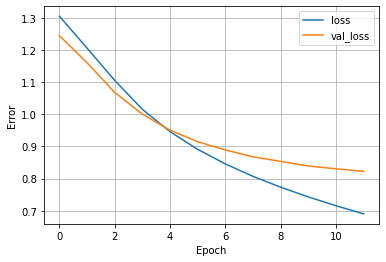

In [17]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
plot_loss(history)

### OVERSAMPLING & DROPOUT
We will try to improve the model by using some imbalanced dataset techniques. In detail, the `RandomOverSampler` will be used to over-sample the minority parties by picking existant samples at random.
* The library is imported

In [72]:
from imblearn.over_sampling import RandomOverSampler

The oversampling strategy is defined. In detail, we set the sum number of instances we want for each different party in the training data

In [73]:
oversampl_parties= {4:43000, #συνασπισμος ριζοσπαστικης αριστερας
                    2:30000,#κομμουνιστικο κομμα ελλαδας
                    3:18000,#συνασπισμος της αριστερας των κινηματων και της οικολογιας              
                    }

* Now the `RandomOverSampler` is declared with the sampling strategy and a random state in order to be able to reproduce the results.
* The model is fitted afterwards. The training values had to be reshaped in a 2D array because the RandomOverSampler needs the input in a 2D array to work.

In [74]:
ros = RandomOverSampler(random_state=14, sampling_strategy=oversampl_parties)
X_resampled, y_resampled = ros.fit_resample(X_train.values.reshape(-1, 1), y_train.values)

* The resampled data are saved in two different dataframes
* We change column name and we also shuffle the data so that the instances are placed completely randomly.

In [75]:
X_resampled = pd.DataFrame(X_resampled)
y_resampled = pd.DataFrame(y_resampled)
X_resampled = X_resampled.rename(columns={0:'val'})
y_resampled = y_resampled.rename(columns={0:'val'})
X_resampled = X_resampled.sample(frac=1, random_state=9)
y_resampled = y_resampled.sample(frac=1, random_state=9)

Again we use the same text vectorizer

In [76]:
vocab_size = 100000
sequence_length = 600

vectorize_layer = TextVectorization(
    standardize="lower_and_strip_punctuation",
    max_tokens=vocab_size,
    input_shape=(1,),
    output_mode='int',
    output_sequence_length=sequence_length,
    ngrams=(1,2))

The text vectorizer is adapted to the new training data (including the new oversampling instances)

In [77]:
vectorize_layer.adapt(X_resampled.val.values)

Our model is built again

* Firstly, the new vectorization layer is used

* Then we add an embedding layer. The output of the embedding layer has dimensions `samples, sequence_length, embedding_dimensions`, because it contains samples, each one of which contains `sequence_length` embeddings of `embedding dimensions`.

* Therefore each sample is represented by a two-dimensional vector `sequence_length, embedding_dimensions`.
* Then a dropout layer is inserted. In detail, that means that at this training stage, any individual node could be "dropped out" of the network with a probability $20$% or  could be kept with probability $80$%. After that, only the reduced network is trained.That will reduce the network and as a result prevent overfit. Lastly, the dropped nodes return with their original weights to the network by the next epoch

* We want each sample (proceeding) to be represented by a one-dimensional embedding so we add a `GlobalAveragePooling1D` layer. That layer averages all word embeddings of a speech to produce a single average embedding, which could be considered the  "summarizing" of the speech
* After that another dropout layer is inserted with the probability of a dropout at $20$%
* Lastly, the final layer is a dense one, containing 5 neurons, one for each different political party. We can see the architecture below

In [78]:
embedding_dim = 75

model = tf.keras.Sequential([
    vectorize_layer,
    tf.keras.layers.Embedding(input_dim=vocab_size, 
                              output_dim=embedding_dim,
                              name='embedding'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5)])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
text_vectorization_1 (TextVe (None, 600)               0         
_________________________________________________________________
embedding (Embedding)        (None, 600, 75)           7500000   
_________________________________________________________________
dropout (Dropout)            (None, 600, 75)           0         
_________________________________________________________________
global_average_pooling1d (Gl (None, 75)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense (Dense)                (None, 5)                 380       
Total params: 7,500,380
Trainable params: 7,500,380
Non-trainable params: 0
______________________________________________

* The model is compiled by using the same parameters as before

In [79]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

* Now we fit the model as executed before

In [20]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
batch_size = 650
epochs = 15
history = model.fit(
    X_resampled.val.values, y_resampled.val.values,
    batch_size= batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=[early_stop],
    use_multiprocessing=True)

Epoch 1/15
427/427 [==============================] - 292s 675ms/step - loss: 1.4331 - accuracy: 0.3692 - val_loss: 1.3273 - val_accuracy: 0.4264
Epoch 2/15
427/427 [==============================] - 275s 644ms/step - loss: 1.3008 - accuracy: 0.4336 - val_loss: 1.2051 - val_accuracy: 0.4873
Epoch 3/15
427/427 [==============================] - 270s 633ms/step - loss: 1.1699 - accuracy: 0.5068 - val_loss: 1.1009 - val_accuracy: 0.5311
Epoch 4/15
427/427 [==============================] - 275s 643ms/step - loss: 1.0645 - accuracy: 0.5557 - val_loss: 1.0248 - val_accuracy: 0.5689
Epoch 5/15
427/427 [==============================] - 264s 619ms/step - loss: 0.9842 - accuracy: 0.5946 - val_loss: 0.9701 - val_accuracy: 0.5932
Epoch 6/15
427/427 [==============================] - 284s 666ms/step - loss: 0.9264 - accuracy: 0.6218 - val_loss: 0.9295 - val_accuracy: 0.6140
Epoch 7/15
427/427 [==============================] - 273s 639ms/step - loss: 0.8727 - accuracy: 0.6450 - val_loss: 0.8978 -

* And now we can see the results

In [22]:
y_pred = model.predict(X_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.65      0.69      0.67     29800
           1       0.65      0.68      0.66     29279
           2       0.75      0.60      0.67      4578
           3       0.59      0.34      0.43      2940
           4       0.65      0.59      0.61      8362

    accuracy                           0.66     74959
   macro avg       0.66      0.58      0.61     74959
weighted avg       0.66      0.66      0.65     74959



#### Results
We achieve to increase the accuracy by 1% and also take precautions of an overfit with the use of the dropout layers. Also the recall scores of the non majority parties are more higher, meaning that the network achieves to predict correctly more non-majority parties speeches. However, the precision for those parties are lower, meaning that the network falsely predicts more speeches to belong to the non-majority parties.

Also the plot of validation loss and training loss confirms that there is no overfit as the training is stopped right before the validation loss stabilizes. It is also visible that the validation loss stabilizes very slowly because the dropout technique was used as a counter-measure for overfitting.

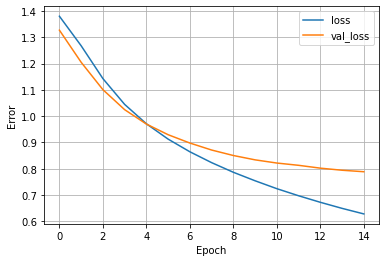

In [23]:
import matplotlib.pyplot as plt
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
plot_loss(history)

### Conclusion
The neural network model achieves a $66$% accuracy in predicting the speeches with more than 25 words of the top five parties (with the most speeches). Those are almost  375  thousand speeches in total. The RandomOversampler was used to create new instances for the minority groups. Then a text vectorizer was used with a vocabulary of 100,000 words and a sequence size of 600. That means that for each proceeding the 600 most frequent one and two-grams were used and transformed in the right format. Next up, the model was build with the vectorize layer, an embedding layer of 75 dimensions, a dropout layer, a GlobalAveragePooling1D, another dropout layer and finally a dense layer of 5 neurons (one for each party to be predicted). Furthermore, the optimizer adam was used and the loss function SparseCategoricalCrossentropy. Lastly, the model was trained in 15 epochs with validation data the 15% of the training data. As calculated before, the dummy classifier achieved an accuracy of 40% for the same data.

## BONUS
A text generator that produces speeches like the proceedings will be created now
* Starting with the import of the libraries

In [9]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

import re
import os
import time
import pprint

A string variable is created that contains a sample of the long proceedings (speeches with more than 25 words).
* The proceedings are joined one after the other
* The proceedings are shuffled and a random state is used in order to get the same shuffle everytime <br>
Note: we could not use all the proceedings for the training because that would create a huge string which exceeded the capabilities of RAM in Collab

In [10]:
proceed_text = ' '.join(proceed_long.sample(frac=1, random_state=1).speech.values[:50000])

Now we can check the vocabulary

In [11]:
vocab = sorted(set(proceed_text))
vocab

['\t',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '~',
 '\xa0',
 '§',
 '¨',
 '«',
 '°',
 '±',
 '²',
 '³',
 '´',
 'µ',
 '¶',
 '·',
 '»',
 '¼',
 '½',
 '¾',
 'Ç',
 'Ö',
 'à',
 'ç',
 'é',
 'ï',
 'ʺ',
 'ʼ',
 ';',
 '΄',
 '΅',
 'Ά',
 'Έ',
 'Ή',
 'Ί',
 'Ό',
 'Ύ',
 'Ώ',
 'ΐ',
 'Α',
 'Β',
 'Γ',
 'Δ',
 'Ε',
 'Ζ',
 'Η',
 'Θ',
 'Ι',
 'Κ',
 'Λ',
 'Μ',
 'Ν',
 'Ξ',
 'Ο',
 'Π',
 'Ρ',
 'Σ',
 'Τ',
 'Υ',
 'Φ',
 'Χ',
 'Ψ',
 'Ω',
 'Ϊ',
 'Ϋ',
 'ά',
 'έ',
 'ή',
 'ί',
 'ΰ',
 'α',
 'β',
 'γ',
 'δ',
 'ε',
 'ζ',

Only the significant greek characters are kept. This step was done because there were many different characters in our vocabulary
* That means that the english letters are stripped as well as the rare symbols. 
* The rare symbols are found in the vocaubulary and then are stripped by using a regual expression

In [12]:
characters_excl = ''.join(vocab[0:1]+vocab[4:13] + vocab[30:117] + vocab[-10:]) #symbols not needed 
proceed_text = re.sub(r'[%s]' %characters_excl, ' ', proceed_text)

* By using a set, we can count the unique characters in the string


In [13]:
vocab = sorted(set(proceed_text))
print('{} unique characters'.format(len(vocab)))

116 unique characters


* Now the `preprocessing.StringLookup` layer is created
* It converts character tokens to character IDs. This is a necessary step as the neural networks do not accept strings in characters format.
* The character ID 0 maps to the empty string '' used for padding

In [14]:
ids_from_chars = preprocessing.StringLookup(vocabulary=list(vocab))

* `preprocessing.StringLookup(..., invert=True)` is used in order to transform back the character IDs so that we can read the produced proceedings as characters and not numbers in the end

In [15]:
chars_from_ids = tf.keras.layers.experimental.preprocessing.StringLookup(
    vocabulary=ids_from_chars.get_vocabulary(), invert=True)

 * Now a helper function is made to join the characters back into strings

In [16]:
def text_from_ids(ids):
    return tf.strings.reduce_join(chars_from_ids(ids), axis=-1)

* All text is splitted into a tensor of integer IDs. That is done because the text will be devided into sequences of specific length

In [17]:
all_ids = ids_from_chars(tf.strings.unicode_split(proceed_text, 'UTF-8'))
all_ids

<tf.Tensor: shape=(116205103,), dtype=int64, numpy=array([ 2, 44, 94, ..., 90, 78, 20])>

* Now the `tf.data.Dataset.from_tensor_slices` function is used to convert the text vector into a stream of character indices.

In [18]:
ids_dataset = tf.data.Dataset.from_tensor_slices(all_ids)

* We can check the first 10 of the items from ids_dataset. Also, those items are converted with `chars_from_ids()`

In [19]:
for ids in ids_dataset.take(10):
    print(chars_from_ids(ids).numpy().decode('utf-8'))

 
Κ
ύ
ρ
ι
ε
 
Π
ρ
ό


* Sequences of 100 characters will be used. Because we want to predict the next character for each character, we'll actually break the text in batches of 100+1 characters. Therefore for the 100th character we'll want to predict the 101th.

In [20]:
seq_length = 100
examples_per_epoch = len(proceed_text)//(seq_length+1)

* The `batch()` method is used to convert the individual characters to sequences of the desired size

In [21]:
sequences = ids_dataset.batch(seq_length+1, drop_remainder=True)

for seq in sequences.take(1):
    print(chars_from_ids(seq))

tf.Tensor(
[b' ' b'\xce\x9a' b'\xcf\x8d' b'\xcf\x81' b'\xce\xb9' b'\xce\xb5' b' '
 b'\xce\xa0' b'\xcf\x81' b'\xcf\x8c' b'\xce\xb5' b'\xce\xb4' b'\xcf\x81'
 b'\xce\xb5' b',' b' ' b'\xce\xbd' b'\xce\xb1' b' ' b'\xce\xb5'
 b'\xcf\x85' b'\xcf\x87' b'\xce\xb1' b'\xcf\x81' b'\xce\xb9' b'\xcf\x83'
 b'\xcf\x84' b'\xce\xae' b'\xcf\x83' b'\xcf\x89' b' ' b'\xce\xba'
 b'\xce\xb1' b'\xce\xb9' b' ' b'\xce\xb5' b'\xce\xb3' b'\xcf\x8e' b' '
 b'\xce\xb3' b'\xce\xb9' b' ' b' ' b'\xce\xb1' b'\xcf\x85' b'\xcf\x84'
 b'\xce\xae' b'\xce\xbd' b' ' b'\xcf\x84' b'\xce\xb7' b'\xce\xbd' b' '
 b'\xce\xb1' b'\xce\xbb' b'\xce\xbb' b'\xce\xb1' b'\xce\xb3' b'\xce\xae'
 b' ' b'\xcf\x80' b'\xce\xbf' b'\xcf\x85' b' ' b'\xce\xba' b'\xce\xac'
 b'\xce\xbd' b'\xce\xb5' b'\xcf\x84' b'\xce\xb5' b' ' b'\xce\xb3'
 b'\xce\xb9' b'\xce\xb1' b'\xcf\x84' b'\xce\xaf' b' ' b'\xcf\x80'
 b'\xcf\x81' b'\xce\xb1' b'\xce\xb3' b'\xce\xbc' b'\xce\xb1' b'\xcf\x84'
 b'\xce\xb9' b'\xce\xba' b'\xce\xac' b' ' b'\xce\xb1' b'\xce\xba'
 b'\xce\xbf' b

* We can see what this is doing by joining the tokens together.

In [22]:
for seq in sequences.take(5):
    print(text_from_ids(seq).numpy().decode('utf-8'))

 Κύριε Πρόεδρε, να ευχαριστήσω και εγώ γι  αυτήν την αλλαγή που κάνετε γιατί πραγματικά ακούγοντας το
ν κύριο Υφυπουργό δεν καταλάβαινα τι ακριβώς έχει γίνει.Θα ήθελα να πω ως γενική τοποθέτηση γι  αυτήν
 την ενότητα των άρθρων ότι η υποκρισία της Κυβέρνησης αλλά και η προσπάθεια παραπλάνησης του ελληνικ
ου λαού βρίσκεται ακριβώς σ  αυτά τα δύο άρθρα, εκ των οποίων το ένα βέβαια το μεταθέσαμε για αύριο.Ε
νώ, λοιπόν, η Κυβέρνηση έλεγε ότι θα καταργήσει τα φορολογικά τεκμήρια, όταν θα έρθει ο κατάλληλος χρ


Here's a function that takes a sequence as input, duplicates, and shifts it to align the input and label for each timestep. That is needed because each time the input is the current character and the label is the next character.

In [23]:
def split_input_target(sequence):
    input_text = sequence[:-1]
    target_text = sequence[1:]
    return input_text, target_text

* The dataset of inputs and targets is created here

In [33]:
dataset = sequences.map(split_input_target)

* We can check the first input and target here

In [34]:
for input_example, target_example in  dataset.take(1):
    print("Input :", text_from_ids(input_example).numpy().decode('utf-8'))
    print("Target:", text_from_ids(target_example).numpy().decode('utf-8'))

Input :  Κύριε Πρόεδρε, να ευχαριστήσω και εγώ γι  αυτήν την αλλαγή που κάνετε γιατί πραγματικά ακούγοντας τ
Target: Κύριε Πρόεδρε, να ευχαριστήσω και εγώ γι  αυτήν την αλλαγή που κάνετε γιατί πραγματικά ακούγοντας το


* The data is shuffled and pack it into batches, while prefetch is used to reduce waiting times during training

In [35]:
# Batch size
BATCH_SIZE = 900

# Buffer size to shuffle the dataset
# (TF data is designed to work with possibly infinite sequences,
# so it doesn't attempt to shuffle the entire sequence in memory. Instead,
# it maintains a buffer in which it shuffles elements).
BUFFER_SIZE = 10000

dataset = (
    dataset
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.experimental.AUTOTUNE))

dataset

<PrefetchDataset shapes: ((900, 100), (900, 100)), types: (tf.int64, tf.int64)>

The model has 3 layers:
* `tf.keras.layers.Embedding`: The input layer. A trainable lookup table that will map each character-ID to a vector with embedding_dim dimensions;
* `tf.keras.layers.GRU`: A type of RNN with size units=rnn_units
* `tf.keras.layers.Dense`: The output layer, with vocab_size outputs. It outpts one logit for each character in the vocabulary. These are the log-liklihood of each character according to the model.

In [36]:
# Length of the vocabulary in chars
vocab_size = len(vocab)

# The embedding dimension
embedding_dim = 192

# Number of RNN units
rnn_units = 768

Now the model is created. 
* RNNs have an internal state that acts as their memory. That means after every training, we'll be feeding our model with a character and its previous state to produce a new character.

In [37]:
class MyModel(tf.keras.Model):
      def __init__(self, vocab_size, embedding_dim, rnn_units):
        super().__init__(self)
        self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
        self.gru = tf.keras.layers.GRU(rnn_units,
                                   return_sequences=True, 
                                   return_state=True)
        self.dense = tf.keras.layers.Dense(vocab_size)
    
      def call(self, inputs, states=None, return_state=False, training=False):
        x = inputs
        x = self.embedding(x, training=training)
        if states is None:
            states = self.gru.get_initial_state(x)
        x, states = self.gru(x, initial_state=states, training=training)
        x = self.dense(x, training=training)

        if return_state:
            return x, states
        else: 
            return x

* The model is declared here

In [38]:
model = MyModel(
    vocab_size=len(ids_from_chars.get_vocabulary()),
    embedding_dim=embedding_dim,
    rnn_units=rnn_units)

* The `SparseCategoricalCrossentropy` loss function is used because like the classification of parties above, we are interested to predict only one class (character in this case)

In [39]:
loss = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam', loss=loss)

* The model is trained now

In [40]:
EPOCHS = 30
history = model.fit(dataset, epochs=EPOCHS,)

Epoch 1/30
1278/1278 [==============================] - 713s 556ms/step - loss: 2.2221
Epoch 2/30
1278/1278 [==============================] - 711s 556ms/step - loss: 1.0760
Epoch 3/30
1278/1278 [==============================] - 711s 556ms/step - loss: 1.0092
Epoch 4/30
1278/1278 [==============================] - 711s 555ms/step - loss: 0.9799
Epoch 5/30
1278/1278 [==============================] - 711s 556ms/step - loss: 0.9624
Epoch 6/30
1278/1278 [==============================] - 711s 556ms/step - loss: 0.9510
Epoch 7/30
1278/1278 [==============================] - 711s 556ms/step - loss: 0.9425
Epoch 8/30
1278/1278 [==============================] - 711s 556ms/step - loss: 0.9364
Epoch 9/30
1278/1278 [==============================] - 711s 556ms/step - loss: 0.9316
Epoch 10/30
1278/1278 [==============================] - 711s 556ms/step - loss: 0.9277
Epoch 11/30
1278/1278 [==============================] - 711s 555ms/step - loss: 0.9245
Epoch 12/30
1278/1278 [==================

* We just have to run the model in a loop, and keep track of the model's internal state as we execute it. A single step prediction is made with the following code:

In [41]:
class OneStep(tf.keras.Model):
      def __init__(self, model, chars_from_ids, ids_from_chars, temperature=1.0):
        super().__init__()
        self.temperature=temperature
        self.model = model
        self.chars_from_ids = chars_from_ids
        self.ids_from_chars = ids_from_chars

        # Create a mask to prevent "" or "[UNK]" from being generated.
        skip_ids = self.ids_from_chars(['','[UNK]'])[:, None]
        sparse_mask = tf.SparseTensor(
            # Put a -inf at each bad index.
            values=[-float('inf')]*len(skip_ids),
            indices = skip_ids,
            # Match the shape to the vocabulary
            dense_shape=[len(ids_from_chars.get_vocabulary())]) 
        self.prediction_mask = tf.sparse.to_dense(sparse_mask)

      @tf.function
      def generate_one_step(self, inputs, states=None):
        # Convert strings to token IDs.
        input_chars = tf.strings.unicode_split(inputs, 'UTF-8')
        input_ids = self.ids_from_chars(input_chars).to_tensor()

        # Run the model.
        # predicted_logits.shape is [batch, char, next_char_logits] 
        predicted_logits, states =  self.model(inputs=input_ids, states=states, 
                                              return_state=True)
        # Only use the last prediction.
        predicted_logits = predicted_logits[:, -1, :]
        predicted_logits = predicted_logits/self.temperature
        # Apply the prediction mask: prevent "" or "[UNK]" from being generated.
        predicted_logits = predicted_logits + self.prediction_mask

        # Sample the output logits to generate token IDs.
        predicted_ids = tf.random.categorical(predicted_logits, num_samples=1)
        predicted_ids = tf.squeeze(predicted_ids, axis=-1)

        # Convert from token ids to characters
        predicted_chars = self.chars_from_ids(predicted_ids)

        # Return the characters and model state.
        return predicted_chars, states

* Now we can create an instance of the class `OneStep`

In [42]:
one_step_model = OneStep(model, chars_from_ids, ids_from_chars)

* Now we run it in a loop to generate text. We can see the produced speech when starting with the text `Καλησπέρα`:
* `pprint` is used for a clearer output


In [44]:
start = time.time()
states = None
next_char = tf.constant(['Καλησπέρα'])
result = [next_char]

for n in range(1000):
    next_char, states = one_step_model.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()

pprint.pprint(result[0].numpy().decode('utf-8'), )
print('\n\n' + '_'*80)

print(f"\nRun time: {end - start}")

('Καλησπέρα των Ανώτατων Επιμελητηρίων.Σας έχουμε καταθέσει, κύριε Υπουργέ και '
 'κύριε Πρόεδρε. Γιατί είναι κορυφαίο σφεδόν ζητούσα. Τι σημαίνει ένας '
 'εργαζόμενος να το χαριστεί. Αλλά η αναζήτηση εξ αιτίας των υφιστάμενων '
 'χρημάτων είναι αδιάκλιτη η διακοπή μας. Δεν είναι αλήθεια ότι οι διοικητικές '
 'κανονισμοί πρέπει να ανακοινωθούν με την παράταση, η διαδικασία του  90 θα '
 'τα προσεγγίσεις μονοπώλια. Πράγματι, με τον ίδιο νόμο είναι άδικος. '
 'Επανέρχομαι, λοιπόν, είναι εδώ, για να πείτε στους Αιτωνίους από τη δεκαετία '
 'του ’ αυτούς που έχουν 201.000.000. Μαζεύεστε. Είχε γίνει ποινές. όλο '
 'ανίκανικα και οικονομικά πολιτικά.Πιστεύουμε: 1.Για κάθε γραφείο δίκαιη '
 'ανατροπή δεν υπάρχει, ο Υπουργός πήρε σύλληψη. Γιατί έχετε χρέος για τους '
 'συνταξιούχους που την πληρώναμε με κεντρικά εξαιρετικά ασφαλιστικά ταμεία; '
 'Διότι δεν θέλετε να είναι η Χριστιανοδηπογική ιστορία, ότι η κάλυψη των '
 'εφοριακών συνθηκών που έχει υλοποιηθεί από την προηγούμενη κυβέρνηση για 

* Now let's see the produced speech when starting with the word `Συμφέροντα` 

In [53]:
start = time.time()
states = None
next_char = tf.constant(['Συμφέροντα '])
result = [next_char]

for n in range(1000):
    next_char, states = one_step_model.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()

pprint.pprint(result[0].numpy().decode('utf-8'), )
print('\n\n' + '_'*80)
print(f"\nRun time: {end - start}")

('Συμφέροντα Αττικής θα συγκρίνετε τα ψηφίζουμε, έχουν εκεί να διδάσκονται και '
 'στο ν.1316/88, για το θέμα του κρατισμού, από την ιστορική στιγμή για τις '
 'ένδειξη, όπως γίνεται στην πραγματικότητα. Διότι στις οικονομικές του δομές, '
 'κάποιες προσπάθειες- είναι κοινή λιμενική πολιτική, δεν έγινε, με μη, '
 'τουλάχιστον να την απολαθήκατε στο νούμερο. Δεν αναφέρομαι σε ό,τι άνθρωπο '
 'είναι πάνω από όσους κρατήσαμε να πούμε σαν μέχρι τώρα τα αναντίμετα κατά '
 'τούτο εδώ για προκαταρκτική άποψη, με το ζήτημα των 60.000 το μήνα, μαθητές '
 'όπως πολλές φορές ως μέγα προς τις χώρες της Ευρωπαϊκής Ένωσης της χώρας. '
 'Και για να σας πω και κάτι άλλο παρά μια πολύ ευκολότερη: Το σύνολο των '
 'επιχορηγήσεων είναι λίγο, φαίνεται και άλλοι συζητούν. Και όχι μόνο από '
 'πλευράς Υπουργείου Ητανικών Βραξέλης-Πρώτης περιπτώσεως εσείς τους βλέπω, αν '
 'δεν έχετε εφαρμόσει εδώ που έχω αναπτύξει και διατάξεις.  Τώρα σας '
 'περιεχομένου είναι μια ενότητα, θα ήθελα σε σοβαρότατο κοινωνικά 

* Lastly, the produced proceeding when starting with `ΑΣΟΕΕ`

In [49]:
start = time.time()
states = None
next_char = tf.constant(['ΑΣΟΕΕ '])
result = [next_char]

for n in range(1000):
    next_char, states = one_step_model.generate_one_step(next_char, states=states)
    result.append(next_char)

result = tf.strings.join(result)
end = time.time()

pprint.pprint(result[0].numpy().decode('utf-8'), )
print('\n\n' + '_'*80)
print(f"\nRun time: {end - start}")

('ΑΣΟΕΕ επιτραπεί νόμο του κράτους δικαίου, ρότα από αστυνομικούς και '
 'καλύτερες ανάπτυξης; Ξέχασε αυτό που πρέπει να απαλλάξει τον ελληνικό αλλά '
 'συντριβή ανάμεσα στα παιδιά και τις πολιτικές σκοπιμότητες και τους '
 'χρήσιμους. Το λέω αυτό, κύριε Πρόεδρε, δε δεχόμων παραγόντων πια, γιατί έτσι '
 'θα ήταν η επιδότηση. Η ρύθμιση αυτή ήταν τελικώς αποδεικτικό. Εξελίχθηκε μία '
 'ταχυδρομεία για συγκρότηση για τις άθλιες ευθύνες. Είναι  τουλάχιστον '
 '800.000 δρχ. το κράτος; Το παρόν στοιχείο καυσάς έκθεση για το δεύτερο '
 'εδάφιο τώρα για τέρμα στη Νέα Δημοκρατία.Πιστεύουμε ότι με πιο μονοπώλια '
 'πιστεύουμε ότι δεν ενδιαφέρεστε. Κλείνω θάπαρα σκόπιμο, θέλω να το '
 'επαναλάβω. Όμως πρέπει το πρόβλημα, διότι δεν έχει διαπιστωθεί δύο μέτρα. '
 'Αντί όμως του απλής προσφορά, ζητώντας ένταση χαμηλής αντιδραστικής ομηρίας. '
 'Γιατί όλα σας ζητάω, για να τους κάνουμε έρχεσθε για μονάδο- δεν κάνουμε για '
 'να πάμε εμείς, τα είχε αποφασίσει για τους ΧΑνους, όταν ο αγρότης ψαράξαμε '

#### Conclusions
The produced proceedings do not make actual sense most of the times. However, most of the words are correct and  sentences often make sense on their own. Also, the style of the produced speeches is very similar to the parliament proceedings because they include many words that describe the state e.g. `πολιτική` `κράτος` `νόμος` and words used in speeches e.g. `κύριε Πρόεδρε` `κύριε Υπουργέ`  etc.